
# **1. Xác định bài toán**
- 🎯 Chủ đề: Tài chính – Tín dụng
- 🔍 Mục tiêu:
Dự đoán liệu một khách hàng vay tín dụng có khả năng vỡ nợ hay không, dựa trên các thông tin:
  - Lịch sử tín dụng
  - Số tiền vay
  - Số ngày trễ hạn
  - Giới tính, độ tuổi, học vấn, tình trạng hôn nhân
  ...
- 🧠 Loại bài toán: Classification (Phân loại nhị phân)
  - Nhãn mục tiêu (target): default (1 = vỡ nợ, 0 = không vỡ nợ)

Mục tiêu: xây dựng một mô hình học máy có thể phân loại khách hàng có rủi ro vỡ nợ cao → Hỗ trợ tổ chức tín dụng trong việc đánh giá hồ sơ vay.

- ❓Câu hỏi chính đặt ra:
  - Khách hàng này có khả năng vỡ nợ hay không?
  - Những đặc điểm nào đóng vai trò lớn trong việc dự đoán vỡ nợ?
  - Mức độ chính xác của mô hình trong thực tế?



#**2.Tìm kiếm và thu thập dữ liệu**
- 📦 Bộ dữ liệu sử dụng: Default of Credit Card Clients Dataset
  - Nguồn: Data-Science-Projects-with-Python/Data
/default_of_credit_card_clients__courseware_version_1_21_19.xls
- 📊 Kích thước: 30.000 dòng, 25 features




- Mô tả đặc trưng:

| Cột | Mô tả |
|:----|:-----|
| **ID** | Mã định danh duy nhất cho mỗi khách hàng. |
| **LIMIT_BAL** | Hạn mức tín dụng được cấp cho khách hàng (đơn vị: TWD). |
| **SEX** | Giới tính của khách hàng (1 = Nam, 2 = Nữ). |
| **EDUCATION** | Trình độ học vấn (1 = Sau đại học, 2 = Đại học, 3 = Trung học, 4 = Khác). |
| **MARRIAGE** | Tình trạng hôn nhân (1 = Độc thân, 2 = Đã kết hôn, 3 = Khác). |
| **AGE** | Tuổi của khách hàng. |
| **PAY_1** đến **PAY_6** | Tình trạng thanh toán nợ trong 6 tháng gần nhất (giá trị -2: không có hồ sơ tín dụng (không có thẻ, chưa sử dụng )giá trị -1 = trả sớm/đúng hạn, 0 = đúng hạn, >0 (x) = trễ hạn x tháng). Tình trạng thanh toán từ tháng 4 đến tháng 9. Với PAY_1: tháng 9, PAY_2: tháng 8, PAY_6: tháng 4|
| **BILL_AMT1** đến **BILL_AMT6** | Số tiền hóa đơn chưa thanh toán của 6 tháng gần nhất. |
| **PAY_AMT1** đến **PAY_AMT6** | Số tiền khách hàng đã thanh toán trong 6 tháng gần nhất. |
| **default payment next month** | Biến mục tiêu: 1 = Khách hàng vỡ nợ trong tháng tới, 0 = Không vỡ nợ. |

## **Đọc file dữ liệu, import thư viện**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
working_path = "/content/drive/MyDrive/MiniProject/"

In [ ]:
df_raw = pd.read_excel(working_path + 'default_of_credit_card_clients.xls', engine='xlrd')

#**3. Tiền xử lý và khám phá dữ liệu (EDA)**


##**3.1 Kiểm tra dữ liệu ban đầu**

In [ ]:
df = df_raw.copy()

In [ ]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (30000, 25)


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24     2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2  85698822-43f5      90000    2          2         2   34     0      0   
3  0737c11b-be42      50000    2          2         1   37     0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57    -1      0   

   PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1     -1  ...          0          0          0         0       689   
1      0      0  ...       3272       3455       3261         0      1000   
2      0      0  ...      14331      14948      15549      1518      1500   
3      0      0  ...      28314      28959      29547      2000      2019   
4     -1      0  ...      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0         0                           1  
1      1000      1000         0      2000                           1  
2      1000      1000      1000      5000                           0  
3      1200      1100      1069      1000                           0  
4     10000      9000       689       679                           0  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

##**3.2 Phát hiện và xóa bỏ trùng lặp**


In [ ]:
#Phát hiện ID trùng
df['ID'].nunique()

29687

In [ ]:
#đếm số lần xuất hiện các giá trị duy nhất của ID
id_counts = df['ID'].value_counts()
id_counts.head()

ID
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
75938fec-e5ec    2
2a793ecf-05c6    2
Name: count, dtype: int64

In [ ]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

Có:
- 29687 ID duy nhất
- 313 ID trùng

In [ ]:
#Tạo Boolean mask và kiểm tra một vài ID trùng
dupe_mask = id_counts == 2
id_counts.index[0:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

In [ ]:
#Lọc các ID xuất hiện 2 lần
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [ ]:
# Tạo danh sách dupe_ids gồm ID bị trùng
df.loc[df['ID'].isin(dupe_ids[0:5]),:]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
5033   89f8f447-fca8     320000    2          2         1   32     0      0   
5133   89f8f447-fca8          0    0          0         0    0     0      0   
9782   75938fec-e5ec     240000    2          2         1   42    -1     -1   
9882   75938fec-e5ec          0    0          0         0    0     0      0   
15879  7c9b7473-cc2f      90000    2          1         1   29     0      0   
15979  7c9b7473-cc2f          0    0          0         0    0     0      0   
17661  2a793ecf-05c6     290000    2          2         1   49    -2     -2   
17761  2a793ecf-05c6          0    0          0         0    0     0      0   
29646  90330d02-82d9      70000    1          2         1   29     0      0   
29746  90330d02-82d9          0    0          0         0    0     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
5033       0      0  ...     169371     172868     150827      8000      8000   
5133       0      0  ...          0          0          0         0         0   
9782      -1     -1  ...        632          0        316         0       316   
9882       0      0  ...          0          0          0         0         0   
15879      0      0  ...      27751      20292      14937      2967      2007   
15979      0      0  ...          0          0          0         0         0   
17661     -1      2  ...      11186       6863       6179         0     12000   
17761      0      0  ...          0          0          0         0         0   
29646      0      0  ...      10694      27908      11192      2009      1404   
29746      0      0  ...          0          0          0         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
5033       5500      6100      6000      5000                           0  
5133          0         0         0         0                           0  
9782        632         0       316       948                           0  
9882          0         0         0         0                           0  
15879      1429      1092       412       263                           0  
15979         0         0         0         0                           0  
17661         0         0         0         0                           0  
17761         0         0         0         0                           0  
29646      3016     20001      2000      5002                           0  
29746         0         0         0         0                           0  

[10 rows x 25 columns]

Mỗi ID trùng đều có 1 dòng đầy đủ dữ liệu và 1 dòng toàn số 0

In [ ]:
#Tìm và đếm các dòng toàn số 0 (trừ ID)
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

Có 315 dòng toàn số 0 nhiều hơn số dùng bị trùng là 313. Vậy ta sẽ loại luôn các dòng "rác" không trùng ID

In [ ]:
#Xóa các dòng toàn số 0
df = df.loc[~feature_zero_mask,:].copy()

In [ ]:
#Data frame mới đã xóa các dòng rác
df.shape
df['ID'].nunique()

29685

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Không còn id trùng, tiếp tục xử lý

**Nhận xét:**
* Đã xử lý các dòng "rác" gồm toàn giá trị 0, dữ liệu còn lại 29685 dòng "đầy đủ".
* LIMIT_BAL, AGE, BILL_AMT, PAY_AMT, PAY_2…PAY_6: đều int64 ⟶ khớp với định nghĩa.**Tuy nhiên** Cột PAY_1 có kiểu object cần kiểm tra và xử lý.
* SEX, EDUCATION, MARRIAGE: có kiểu int64 ⟶ về mặt “định nghĩa biến” **vẫn hợp lệ** (mã 1 / 2 / 3 / 4 là số).
  > Sau này để tiện cho EDA thì ta có thể ép sang kiểu Categorical.
* ID: phù hợp với định nghĩa “mã định danh duy nhất” (ở dạng chuỗi bao gồm cả chữ và số). Tuy nhiên cần phải xem xét bỏ đi khi EDA và modeling vì:
  > Chỉ mang tính định danh

  > ID không chứa thông tin về hành vi tín dụng hay rủi ro vỡ nợ, nó chỉ giúp phân biệt bản ghi.

  > Không giúp mô hình dự đoán

  > Thuật toán sẽ đối xử ID như một biến số ngẫu nhiên (nhiều giá trị duy nhất).
  
  Điều này làm:

  > Tăng chiều dữ liệu, nặng tính toán.

  > Gây “overfitting” (mô hình nhớ từng ID).

  > Nguy cơ rò rỉ (data leakage)

  > Nếu tập train & test chứa cùng một khách hàng (trùng ID) nhưng ta dùng ID làm feature, mô hình có thể dự đoán “đúng” chỉ vì thấy ID quen, không phải vì học được quy luật thực.

  >Tiện thao tác thống kê

  >Bỏ ID giúp describe(), corr() không phải hiển thị thêm một cột vô nghĩa, bảng gọn hơn.

PAY_1: dtype object nhưng định nghĩa yêu cầu giá trị −2…9 dạng số nguyên ⇒ chưa hợp lý, cần chuyển về int64.

In [ ]:
#Xử lý cột PAY_1
df['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

- Cột PAY_1 có 3021 dòng dữ liệu **Not availibale** ~ 10% bộ dữ liệu. Được xem là giá trị thiếu vì không mang ý nghĩa.
- Cách xử lý:
1. **Loại bỏ 3.021 bản ghi**

>**Ưu điểm:**
- Đơn giản, nhanh chóng; không làm sai lệch dữ liệu; bảo toàn tính toàn vẹn biến.

>**Nhược điểm:**
- Mất khoảng 10% dữ liệu, có thể làm giảm tính đại diện của tập dữ liệu.
- Nếu nhóm bị loại có tỷ lệ khách hàng vỡ nợ khác biệt, việc loại bỏ này sẽ làm lệch phân bố lớp, gây thiên lệch mô hình.

2. **Giữ lại nhưng gán giá trị NaN rồi thay thế bằng giá trị cố định (mode hoặc 0)**

>**Ưu điểm:**
- Giữ đủ số dòng; gán 0 thể hiện trạng thái "đúng hạn" trung tính, phù hợp khi dữ liệu thiếu ngẫu nhiên.

>**Nhược điểm:**
- Nếu giá trị thiếu ngầm chứa hành vi rủi ro (ví dụ nợ treo), gán 0 có thể làm mất mối quan hệ thực sự, giảm chất lượng dự đoán.

3. **Điền giá trị thiếu bằng cách dự đoán từ các biến tương quan (K-NN Imputation hoặc các phương pháp học máy khác)**

>**Ưu điểm:**
- Giữ toàn bộ dữ liệu; kết quả đa dạng, phản ánh đúng thói quen thanh toán của từng nhóm khách hàng; không dồn hết giá trị thiếu vào một số cố định.

>**Nhược điểm:**
- Tính toán phức tạp, chậm hơn; giá trị dự đoán thường là số thực, cần làm tròn; có thể phát sinh sai số nhỏ.

4. **Gán thành nhóm riêng (category "Unknown")**

>**Ưu điểm:**
- Giữ nguyên thông tin rằng đây là nhóm đặc biệt, cho phép mô hình học cách xử lý riêng biệt.

>**Nhược điểm:**
- Thay đổi định nghĩa biến PAY_1 từ số nguyên sang phân loại, có thể không phù hợp với một số thuật toán yêu cầu biến số; làm tăng độ phức tạp khi mã hóa.

⟹ Lựa chọn cuối cùng: Cách 3 (Điền giá trị thiếu bằng K-NN Imputation)

- Cách 3 cung cấp giải pháp an toàn, cân bằng giữa tránh mất dữ liệu và đảm bảo chính xác. Xử dụng các cột tương quan cao (có thể PAY_2 đến PAY_6) để dự đoán PAY_1. Dù tính toán chậm, nhưng ưu tiên chất lượng dữ liệu và độ chính xác trong dự đoán. Đặc biệt khi dữ liệu thiếu không ngẫu nhiên và có thể liên quan đến rủi ro.


##**3.3 Xử lý dữ liệu thiếu**

In [ ]:
# Bước 1: Tạo bản sao cột PAY_1
df['PAY1_temp'] = df['PAY_1']

# Bước 2: Chuyển PAY_1 sang kiểu số, giá trị sẽ không chuyển được thì thành nan
df['PAY1_temp'] = pd.to_numeric(
    df['PAY1_temp'].astype(str).str.strip(), # Bỏ khoảng trắng
    errors='coerce'
)

# Bước 3: Kiểm tra tương quan Spearman giữa PAY_1 và PAY_2 đến PAY_6 (Phù hợp biến rời rạc có thứ tự)
pay_columns = ['PAY1_temp'] + [f'PAY_{i}' for i in range(2,7)]
correlation_matrix = df[pay_columns].corr(method='spearman')
print("\nTương quan Spearman giữa PAY1_temp và PAY_2 đến PAY_6:")
print(correlation_matrix.loc['PAY1_temp', 'PAY_2':'PAY_6'].round(3))


Tương quan Spearman giữa PAY1_temp và PAY_2 đến PAY_6:
PAY_2    0.630
PAY_3    0.549
PAY_4    0.516
PAY_5    0.487
PAY_6    0.465
Name: PAY1_temp, dtype: float64



⟹ Kết quả cho thấy PAY_1 có tương quan dương mạnh với PAY_2 đến PAY_6 (giảm dần từ 0.630 → 0.465).

**Ý nghĩa:** Nếu khách hàng trễ hạn hoặc không dùng thẻ ở tháng gần nhất (PAY_1), thì rất có khả năng họ cũng có lịch sử tương tự trong các tháng trước đó.

In [ ]:
# Bước 4: Kiểm định chi bình phương để đánh giá tính phụ thuộc giữa PAY1_temp và từng PAY_i
print("\nKiểm định chi bình phương giữa PAY1_temp và từng PAY_i:")
for col in pay_columns[1:]:  # Bỏ PAY1_temp khi kiểm định
    mask = df['PAY1_temp'].notna() & df[col].notna()  # Chỉ lấy các dòng không có NaN
    chi2, p_value, _, _ = chi2_contingency(
        pd.crosstab(df.loc[mask, 'PAY1_temp'], df.loc[mask, col])
    )
    print(f"PAY1_temp vs {col}: p-value = {p_value:.3e}")
    # p-value << 0.001 => không độc lập


Kiểm định chi bình phương giữa PAY1_temp và từng PAY_i:
PAY1_temp vs PAY_2: p-value = 0.000e+00
PAY1_temp vs PAY_3: p-value = 0.000e+00
PAY1_temp vs PAY_4: p-value = 0.000e+00
PAY1_temp vs PAY_5: p-value = 0.000e+00
PAY1_temp vs PAY_6: p-value = 0.000e+00


Tất cả p-value ≈ 0 (< 0.05) → PAY_1 phụ thuộc vào PAY_2 đến PAY_6, với độ tin cậy 95%

Kết luận: Có thể sử dụng các cột này để dự đoán giá trị thiếu của PAY_1.

In [ ]:
# Bước 5: Chuẩn bị dữ liệu để điền giá trị thiếu bằng K-NN Imputation
# Chọn các đặc trưng số liên quan để dự đoán giá trị thiếu của PAY1_temp
numerical_features = (
    [f'PAY_{i}' for i in range(2, 7)] +  # PAY_2 đến PAY_6
    ['LIMIT_BAL', 'AGE'] +                # Hạn mức tín dụng và tuổi
    [f'{prefix}{i}' for prefix in ('BILL_AMT', 'PAY_AMT') for i in range(1, 7)]  # BILL_AMT, PAY_AMT
)
# Chuyển các đặc trưng sang kiểu số
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')
# Chuẩn hóa dữ liệu trước khi áp dụng K-NN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['PAY1_temp'] + numerical_features])

# Bước 6. Áp dụng KNN Imputer để điền missing cho PAY1_temp (cột đầu tiên)
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_data = imputer.fit_transform(scaled_features)

# Bước 7. Lấy lại cột PAY1_temp đã điền missing, chuyển ngược chuẩn hóa
pay1_imputed_scaled = imputed_data[:, 0]

# Để inverse transform, cần tạo mảng đủ chiều như input ban đầu,
# gán giá trị 0 cho các cột đặc trưng khác khi chuyển ngược
pay1_imputed = scaler.inverse_transform(
    np.column_stack([pay1_imputed_scaled, np.zeros((len(pay1_imputed_scaled), len(numerical_features)))])
)[:, 0]

# Bước 8. Gán kết quả đã điền vào cột mới, làm tròn và chuyển kiểu int
df['PAY1_imputed'] = np.rint(pay1_imputed).astype(int)

# Bước 9. Có thể kiểm tra kết quả
print("Các giá trị duy nhất trong PAY1_imputed:")
print(df['PAY1_imputed'].unique())

# Thay thế giá trị missing trong PAY_1 bằng PAY1_imputed:
df['PAY1_temp'] = df['PAY1_temp'].fillna(df['PAY1_imputed'])
df['PAY1_temp'] = df['PAY1_temp'].astype(np.int64)
df['PAY_1'] = df['PAY1_temp']
# Xóa các cột thừa
df.drop(columns=['PAY1_temp', 'PAY1_imputed'], inplace=True)
# Hiển thị thông tin
print("\nThông tin DataFrame sau khi xử lý:")
print(df.info())
print("Các giá trị duy nhất trong PAY_1 sau khi xử lý:")
print(df['PAY_1'].unique())

Các giá trị duy nhất trong PAY1_imputed:
[ 2 -1  0 -2  1  3  4  8  7  5  6]

Thông tin DataFrame sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  int64 
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 


In [ ]:
#Ép category
for col in ['SEX','EDUCATION','MARRIAGE']:
    df[col] = df[col].astype('category')

##**3.4 Phân tích thống kê mô tả các đặc trưng**

### **3.4.1 Thống kê các biến số (Numeric features)**

In [ ]:
df.head()

ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0  798fc410-45c1      20000   2         2        1   24      2      2     -1   
1  8a8c8f3b-8eb4     120000   2         2        2   26     -1      2      0   
2  85698822-43f5      90000   2         2        2   34      0      0      0   
3  0737c11b-be42      50000   2         2        1   37      0      0      0   
4  3b7f77cc-dbc0      50000   1         2        1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [ ]:
df.describe().T

count           mean            std       min  \
LIMIT_BAL                   29685.0  167519.948796  129716.478534   10000.0   
AGE                         29685.0      35.481354       9.212199      21.0   
PAY_1                       29685.0      -0.017281       1.107942      -2.0   
PAY_2                       29685.0      -0.134277       1.197440      -2.0   
PAY_3                       29685.0      -0.166077       1.197278      -2.0   
PAY_4                       29685.0      -0.221627       1.168278      -2.0   
PAY_5                       29685.0      -0.266700       1.133156      -2.0   
PAY_6                       29685.0      -0.291090       1.150653      -2.0   
BILL_AMT1                   29685.0   51184.178103   73578.295929 -165580.0   
BILL_AMT2                   29685.0   49140.322553   71091.014997  -69777.0   
BILL_AMT3                   29685.0   46990.760081   69301.108430 -157264.0   
BILL_AMT4                   29685.0   43245.439279   64276.899483 -170000.0   
BILL_AMT5                   29685.0   40307.628263   60787.204536  -81334.0   
BILL_AMT6                   29685.0   38888.682095   59588.111810 -339603.0   
PAY_AMT1                    29685.0    5672.886812   16616.452239       0.0   
PAY_AMT2                    29685.0    5917.544517   23106.282658       0.0   
PAY_AMT3                    29685.0    5229.295570   17650.360969       0.0   
PAY_AMT4                    29685.0    4826.770827   15607.256127       0.0   
PAY_AMT5                    29685.0    4805.203840   15311.798994       0.0   
PAY_AMT6                    29685.0    5219.023008   17798.365183       0.0   
default payment next month  29685.0       0.221054       0.414964       0.0   

                                25%       50%       75%        max  
LIMIT_BAL                   50000.0  140000.0  240000.0  1000000.0  
AGE                            28.0      34.0      41.0       79.0  
PAY_1                          -1.0       0.0       0.0        8.0  
PAY_2                          -1.0       0.0       0.0        8.0  
PAY_3                          -1.0       0.0       0.0        8.0  
PAY_4                          -1.0       0.0       0.0        8.0  
PAY_5                          -1.0       0.0       0.0        8.0  
PAY_6                          -1.0       0.0       0.0        8.0  
BILL_AMT1                    3560.0   22381.0   67028.0   964511.0  
BILL_AMT2                    2984.0   21197.0   63992.0   983931.0  
BILL_AMT3                    2663.0   20107.0   60167.0  1664089.0  
BILL_AMT4                    2329.0   19040.0   54515.0   891586.0  
BILL_AMT5                    1760.0   18106.0   50244.0   927171.0  
BILL_AMT6                    1257.0   17067.0   49252.0   961664.0  
PAY_AMT1                     1000.0    2100.0    5007.0   873552.0  
PAY_AMT2                      832.0    2008.0    5000.0  1684259.0  
PAY_AMT3                      390.0    1800.0    4508.0   896040.0  
PAY_AMT4                      296.0    1500.0    4015.0   621000.0  
PAY_AMT5                      250.0    1500.0    4041.0   426529.0  
PAY_AMT6                      115.0    1500.0    4000.0   528666.0  
default payment next month      0.0       0.0       0.0        1.0

In [ ]:
# Chọn các cột số cần kiểm tra skew
numeric_cols = df.select_dtypes(include=np.number).columns

# Loại bỏ cột ID
cols_to_check_skew = [col for col in numeric_cols if col not in ['ID']]

# Tính skewness cho các cột đã chọn
skewness = df[cols_to_check_skew].skew().sort_values(ascending=False)

print("\nĐộ lệch (Skewness) của các cột số:")
print(skewness)


Độ lệch (Skewness) của các cột số:
PAY_AMT2                      30.495617
PAY_AMT3                      17.238959
PAY_AMT1                      14.664234
PAY_AMT4                      12.868859
PAY_AMT5                      11.132480
PAY_AMT6                      10.653476
BILL_AMT3                      3.090734
BILL_AMT5                      2.877416
BILL_AMT6                      2.848194
BILL_AMT4                      2.822660
BILL_AMT2                      2.704198
BILL_AMT1                      2.663227
default payment next month     1.344523
PAY_5                          1.004595
PAY_4                          0.995653
LIMIT_BAL                      0.992708
PAY_6                          0.944594
PAY_3                          0.841823
PAY_2                          0.792486
PAY_1                          0.764908
AGE                            0.733374
dtype: float64


In [ ]:
# Tính độ lệch chuẩn cho các cột kiểu số, ngoại trừ cột 'ID'
numeric_cols = df.select_dtypes(include=np.number).columns
cols_for_std = [col for col in numeric_cols if col not in ['ID']]

std_dev = df[cols_for_std].std().sort_values(ascending=False)

print("\nĐộ lệch chuẩn (Standard Deviation) của các cột số (trừ ID):")
print(std_dev)


Độ lệch chuẩn (Standard Deviation) của các cột số (trừ ID):
LIMIT_BAL                     129716.478534
BILL_AMT1                      73578.295929
BILL_AMT2                      71091.014997
BILL_AMT3                      69301.108430
BILL_AMT4                      64276.899483
BILL_AMT5                      60787.204536
BILL_AMT6                      59588.111810
PAY_AMT2                       23106.282658
PAY_AMT6                       17798.365183
PAY_AMT3                       17650.360969
PAY_AMT1                       16616.452239
PAY_AMT4                       15607.256127
PAY_AMT5                       15311.798994
AGE                                9.212199
PAY_2                              1.197440
PAY_3                              1.197278
PAY_4                              1.168278
PAY_6                              1.150653
PAY_5                              1.133156
PAY_1                              1.107942
default payment next month         0.414964
dtype: float64


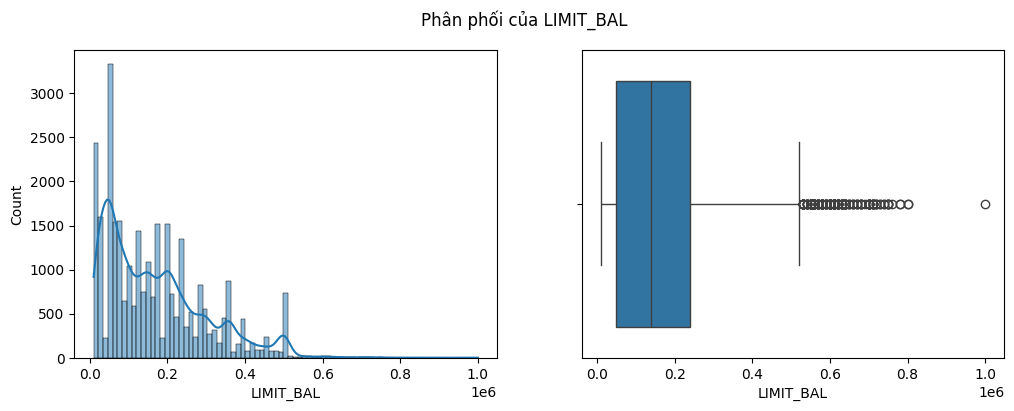

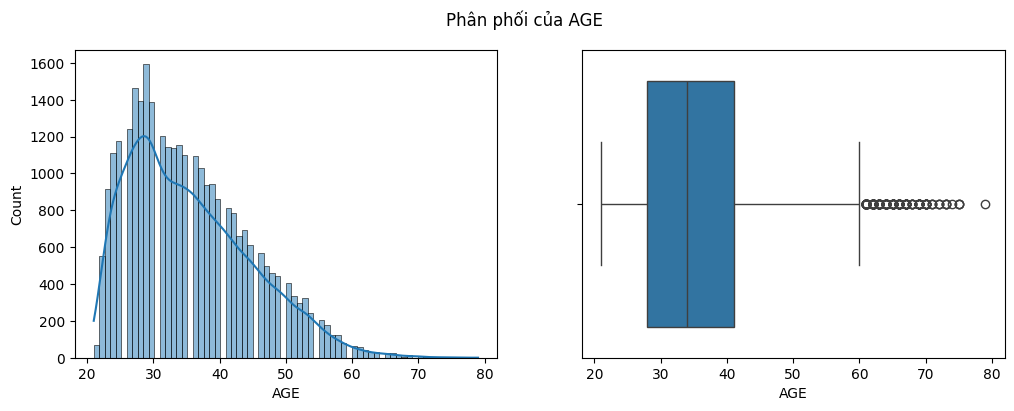

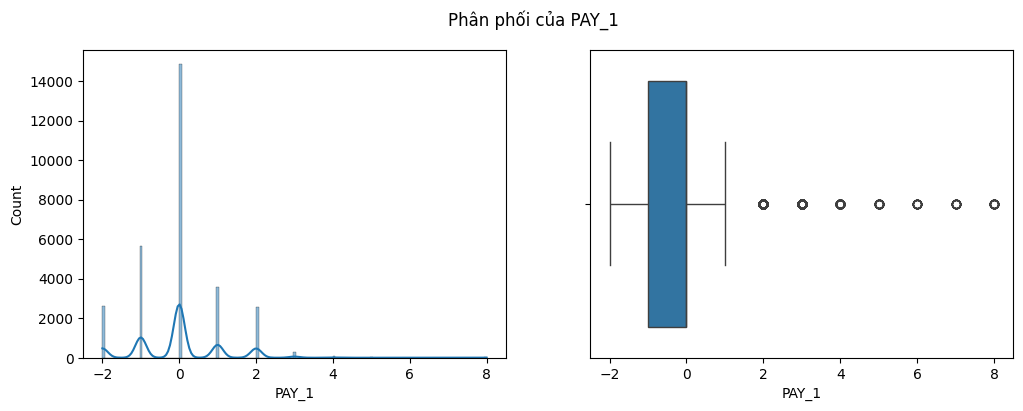

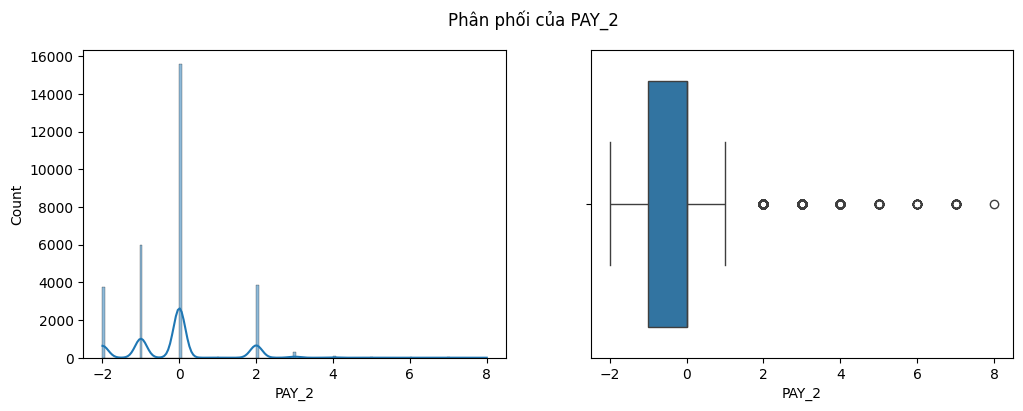

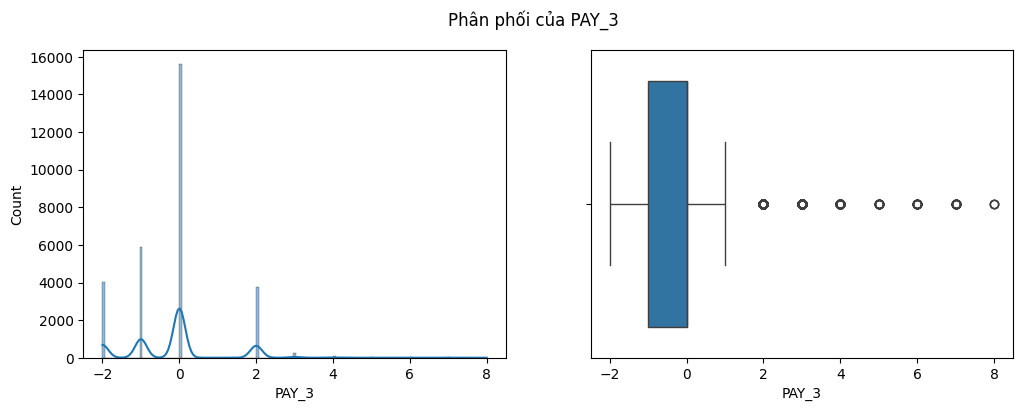

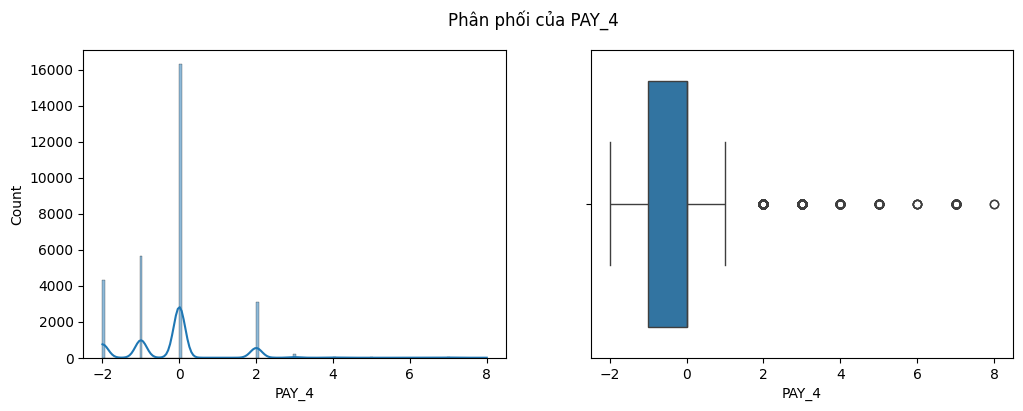

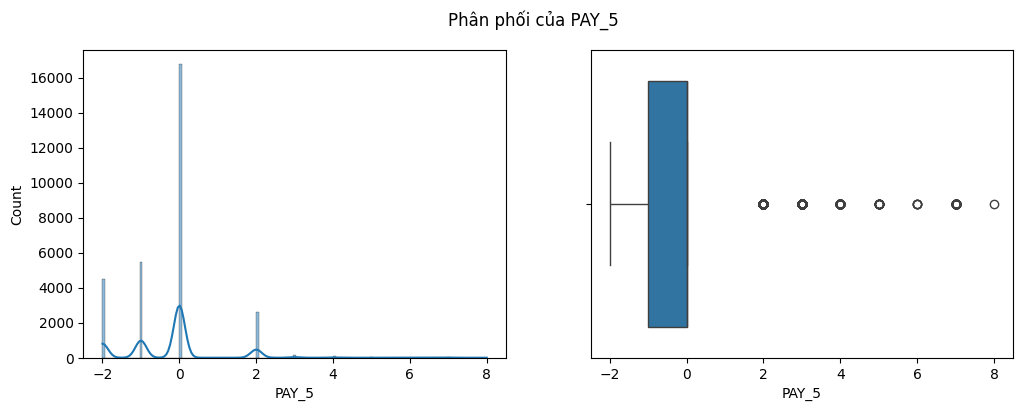

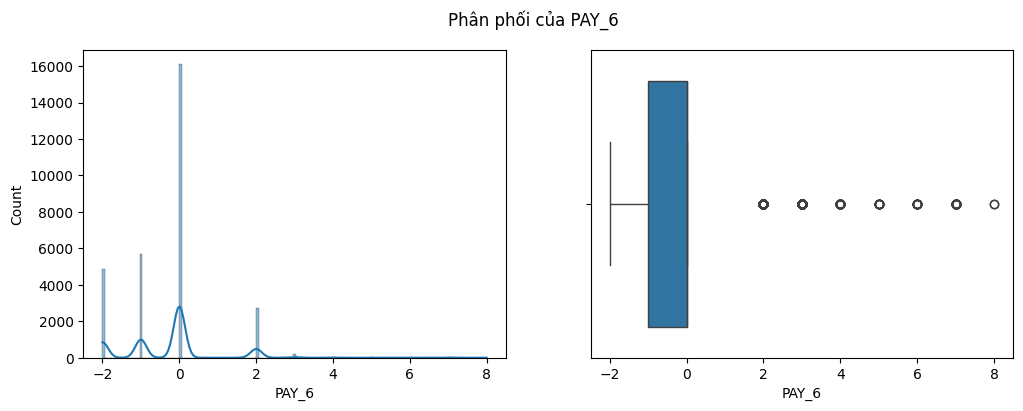

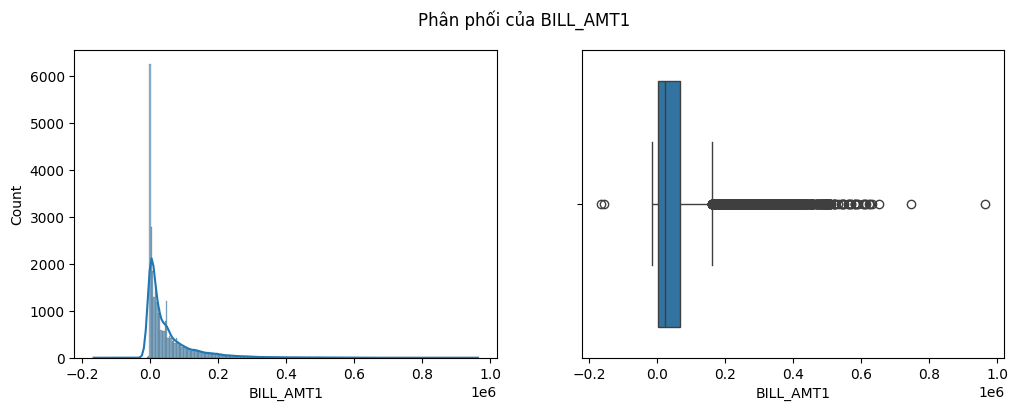

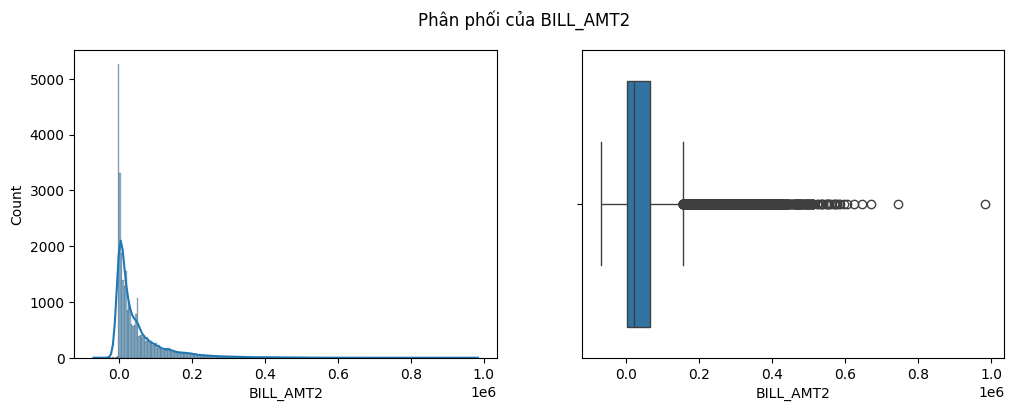

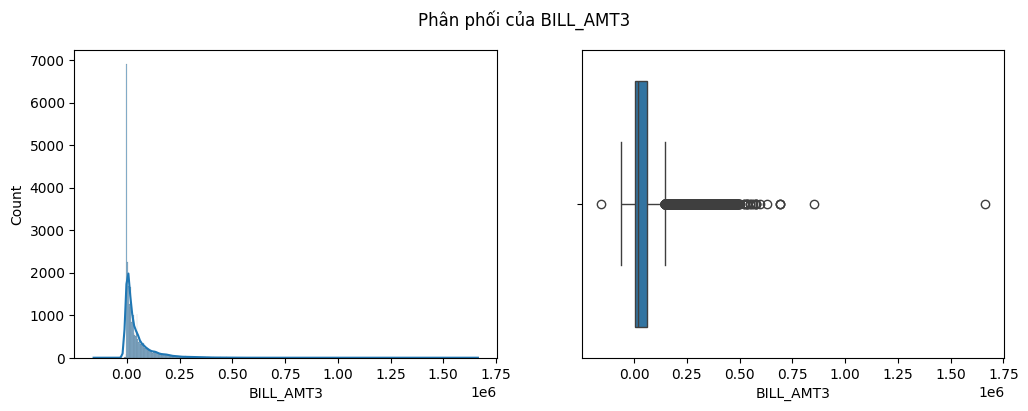

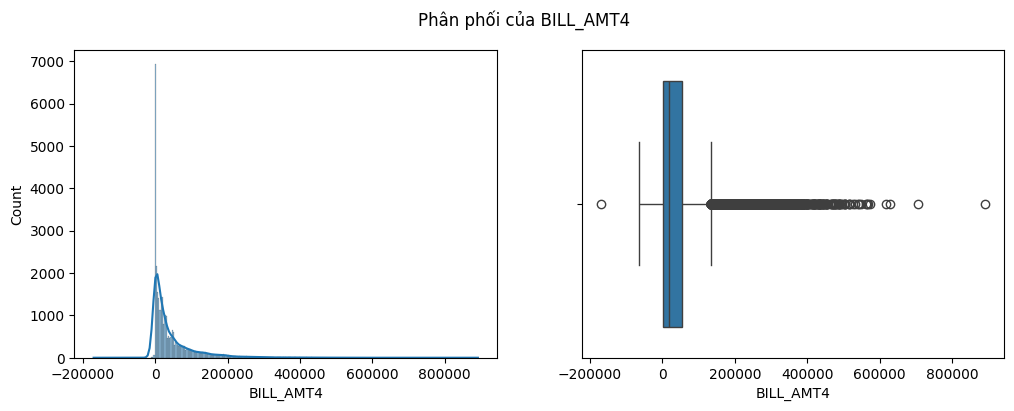

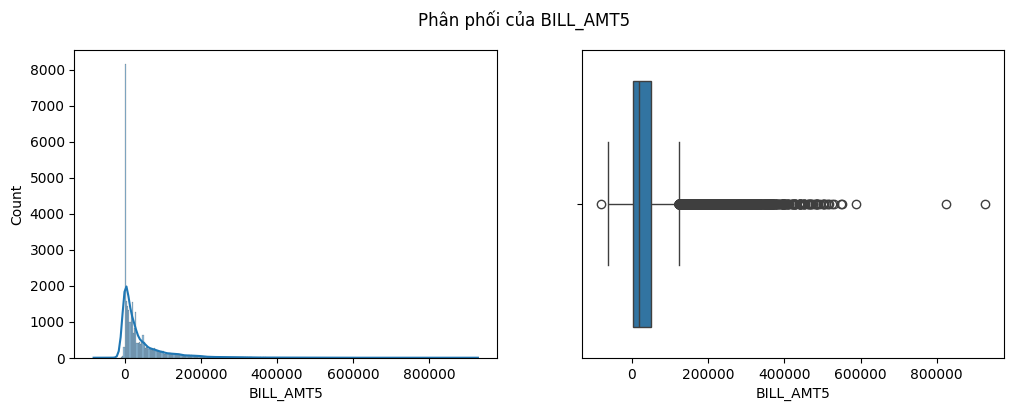

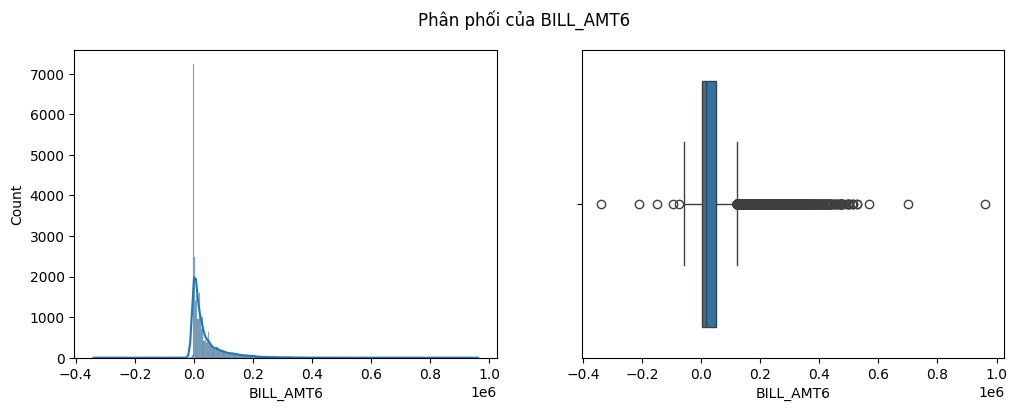

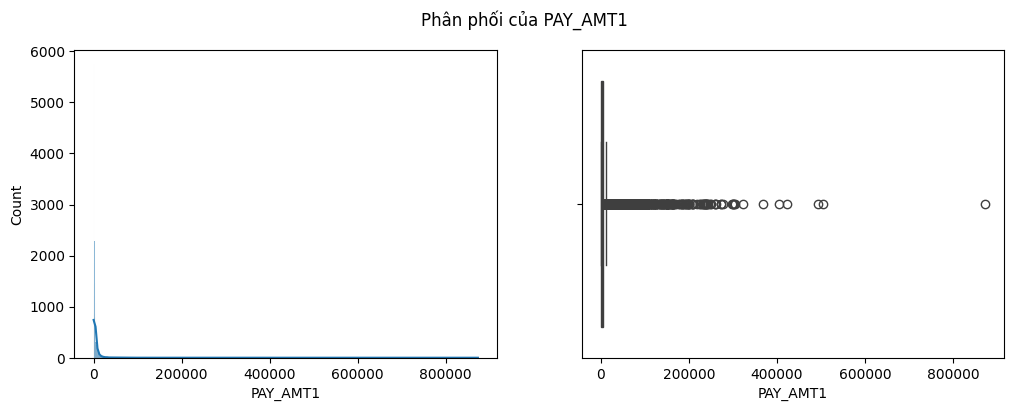

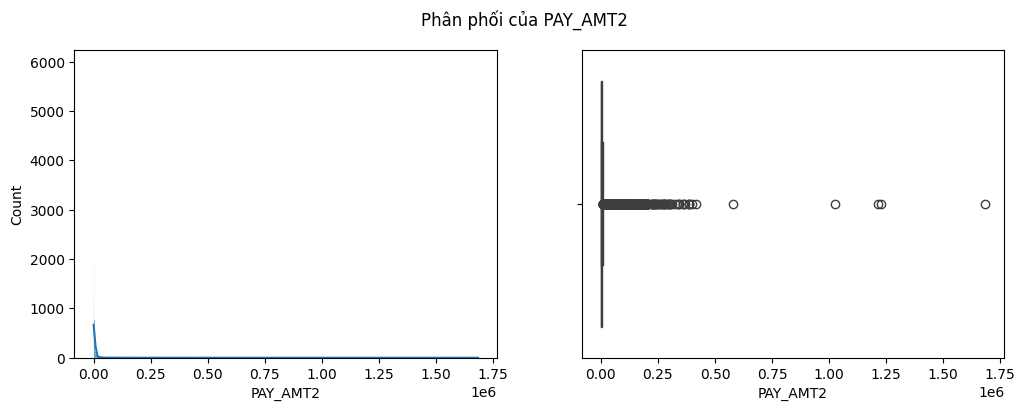

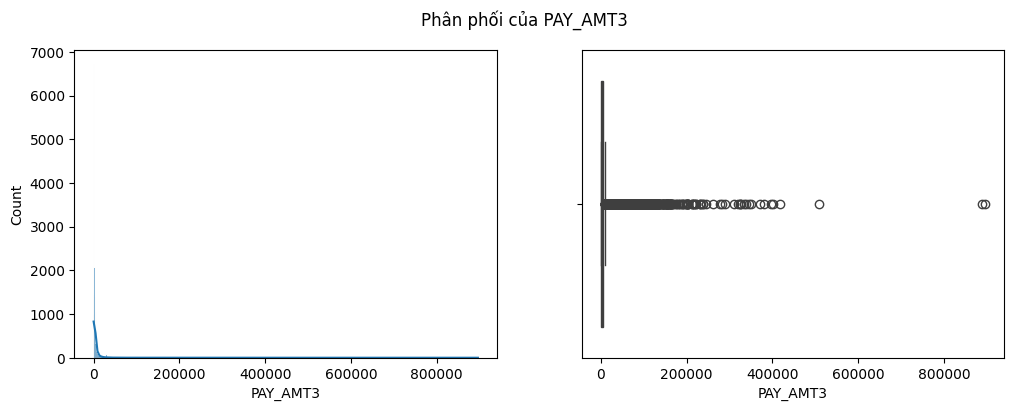

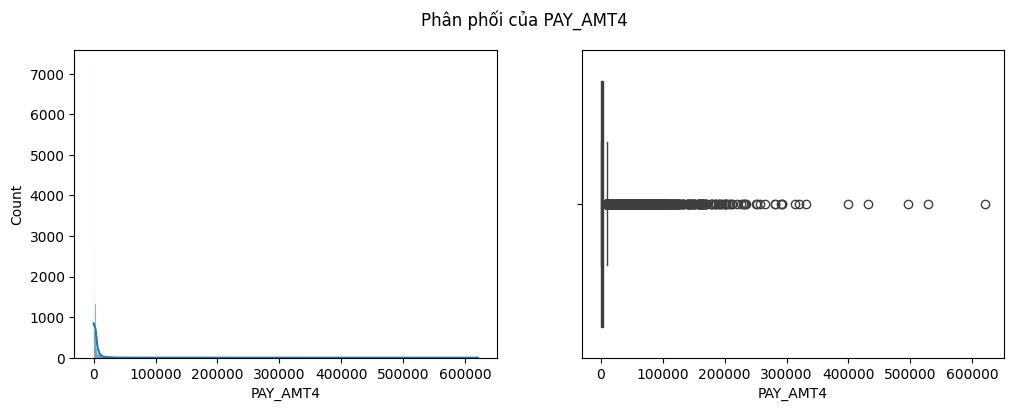

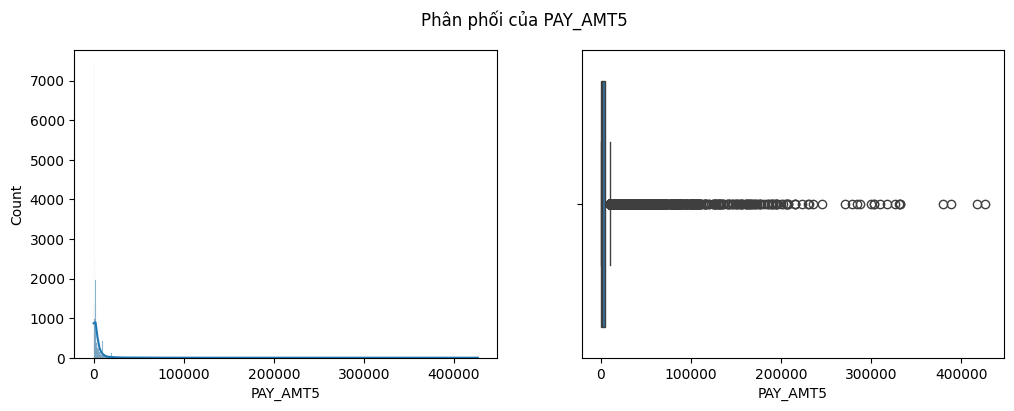

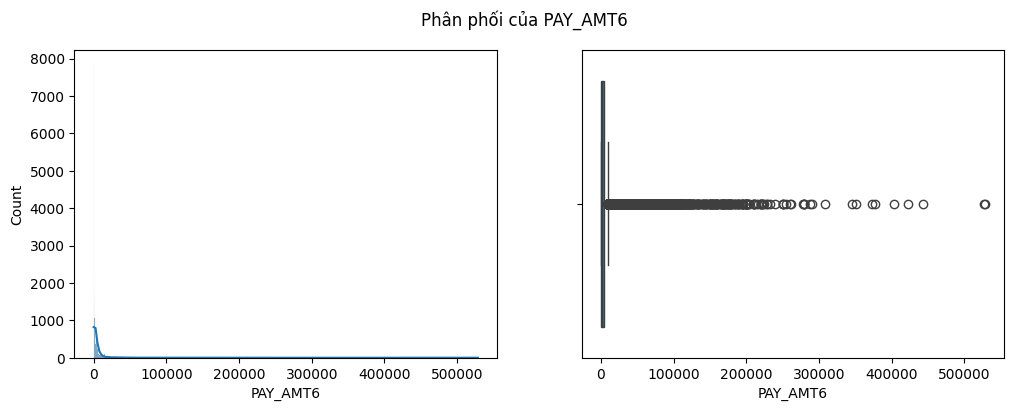

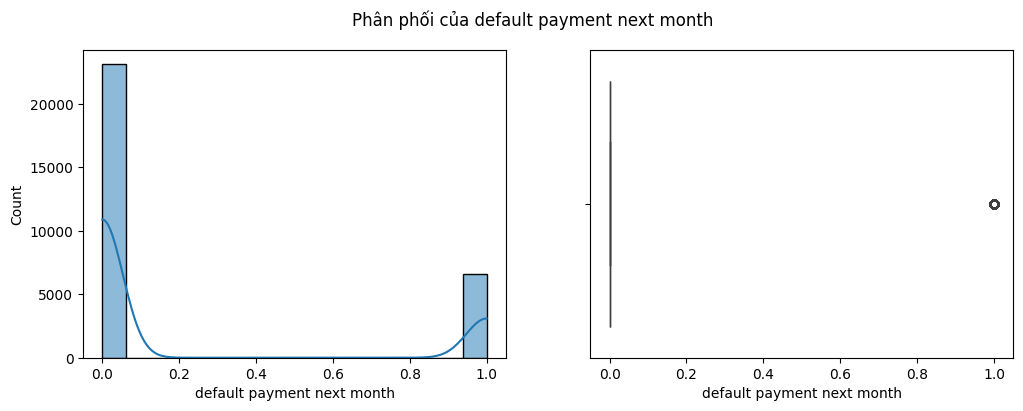

In [ ]:
# Hàm vẽ kết hợp histogram + boxplot
def plot_dist_box(df, var):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[var], kde=True, ax=ax1)
    sns.boxplot(x=df[var], ax=ax2)
    plt.suptitle(f'Phân phối của {var}')
    plt.show()

for col in cols_for_std:
    plot_dist_box(df, col)

**1.LIMIT_BAL - hạn mức tín dụng**
- **Trung vị** = 140 000 TWD, nhưng giá trị lớn nhất tới 1 000 000 TWD.  
  → Phân bố **lệch về bên phải** (skew > 0, có một số người (ít) có hạn mức tín dụng rất cao lên tới 1 triệu).  

- Tính năng nên tạo thêm: **Tỉ lệ nợ so với hạn mức**  
  `DEBT_TO_LIMIT_RATIO = (tổng BILL_AMT1…6) / LIMIT_BAL`: Đo lường mức độ sử dụng tín dụng của khách hàng so với hạn mức được cấp. Tỷ lệ cao cho thấy khách hàng đang dùng gần hết hoặc vượt quá hạn mức, báo hiệu rủi ro vỡ nợ cao - hệ số quan trọng trong logistic.
  
    > Ví dụ:
    Khách hàng A: LIMIT_BAL = 100,000 TWD, tổng BILL_AMT1…6 = 480,000 TWD.
    → DEBT_TO_LIMIT_RATIO = 480,000 / 100,000 = 4.8 (dùng vượt quá hạn mức, rất rủi ro).

    > Khách hàng B: LIMIT_BAL = 100,000 TWD, tổng BILL_AMT1…6 = 50,000 TWD.
    → DEBT_TO_LIMIT_RATIO = 50,000 / 100,000 = 0.5 (dùng ít tín dụng, rủi ro thấp).
    Tác dụng: Giúp mô hình xác định khách hàng có nguy cơ vỡ nợ cao do sử dụng tín dụng quá mức.

---

**2. AGE - tuổi khách hàng**
- Phân bố **không đối xứng** (skew=0.73, mean=35.5 > median=34) → lệch phải nhẹ.
- Không có giá trị ≤ 18 (min=21) → không cần xử lý missing
- **Đề xuất:** tạo cờ `is_senior = 1` nếu tuổi > 65, vì nhóm lớn tuổi có hành vi tín dụng riêng.  
---
**3. PAY_1 … PAY_6 – lịch sử trả nợ 6 tháng**
- Mean PAY_i tăng dần từ PAY_6 (- 0.29) đến PAY_1 (~0) nên **Khách trả nợ xấu đi theo thời gian**
- Phân bố **lệch phải** (nhiều −1, −2, 0, ít giá trị dương) nhưng phần dương sẽ quyết định khả năng vỡ nợ.  
- Phân tích nhỏ cho thấy chỉ cần trễ **≥ 3 tháng** là rủi ro đã gần “đỉnh”, nên gộp mọi giá trị 3→8 vào một nhóm **“rất trễ”**.   
  - Tác dụng cụ thể:
      > • Từ thực nghiệm (đếm tỉ lệ vỡ nợ) của khách trễ 3, 4, … 8 tháng đều có xác suất vỡ nợ gần như nhau (≈ 90 %).
       
      > • Giảm số mức của biến
  - Lợi ích cho mô hình dự đoán vỡ nợ:
      > Thống kê ổn định hơn, tránh hệ số dao động mạnh do vài chục bản ghi hiếm.

      > Với mô hình linear/logistic: giảm nguy cơ over-fitting.
      
      > Với cây quyết định: chia nhánh gọn hơn, sâu ít hơn.

- Biến gợi ý:  
  - `MAX_DELAY` = tháng trễ nhiều nhất.  
    - Tác dụng cụ thể:
      > Thu gọn 6 cột PAY_i thành một “chỉ số tồi tệ nhất” – trực quan cho ngân hàng: “khách đã từng chậm tối đa bao nhiêu tháng?”
   - Lợi ích cho mô hình dự đoán vỡ nợ:
      > Đặc trưng đơn giản, mạnh, rất hay được chọn trong feature-importance của Random Forest / XGBoost.
  - `COUNT_LATE` = số tháng trễ (> 0).  
      - Tác dụng cụ thể:
      > Đo “tần suất” chậm trả thay vì mức độ, phân biệt khách trễ ít tháng với khách trễ nhiều tháng dù cùng mức độ trễ tối đa.
   - Lợi ích cho mô hình dự đoán vỡ nợ:
      > Bổ sung thêm thông tin cho mô hình
  - `RECENCY_WEIGHTED_DELAY` = PAY_1·1 + PAY_2·0.8 + … PAY_6·0.3 (tháng gần nhất có trọng số cao hơn).

---

**4. BILL_AMT1 … BILL_AMT6 - dư nợ**
- Có **giá trị âm** (ví dụ -170 000) → nghĩa là khách đang dư tiền, chứ không phải lỗi.  
  → Giữ nguyên, nhưng đánh dấu `credit_balance_flag = 1`.
    >Ví dụ BILL_AMT = -20 000. Nếu ta chỉ đưa con số -20 000 vào hồi quy logistic, mô hình chỉ thấy “một số nhỏ hơn 0”.

    >Khi ta thêm cột credit_flag = 1 (khách đang dư tiền), mô hình có thêm một tín hiệu rạch ròi “khách này không phải đang nợ, mà đang thừa”.
- Lệch phải rõ (skew ≈ 2.7-3.1).
---

**5. PAY_AMT1 … PAY_AMT6 - số tiền khách đã thanh toán**
- Lệch phải **rất mạnh** (skew cực cao từ 14-31): đa số thanh toán vài nghìn, nhưng có người trả một lúc hơn 1,6 triệu.  
- Mục tiêu:
  - Giảm bớt độ chênh khổng lồ giữa người nộp 0 đ và người nộp 1 600 000 đ.
  - Vẫn giữ lại thông tin ai trả đều, ai trả ít, ai trả dư - điều rất quan trọng khi dự đoán vỡ nợ.
- Đề xuất:
1. **Thu nhỏ thang số**  
    • Áp dụng log(x + 1)_ cho mỗi PAY_AMT → các khoản cực lớn giảm xuống phạm vi hai chữ số, nhưng 0 vẫn là 0.  
    • Điều này làm mô hình hồi quy ổn định hơn nhiều.

2. **Tạo ba biến tổng hợp**  
    **TOTAL_PAYMENT**   : tổng tiền đã trả trong 6 tháng (sau khi log).  
    **AVG_PAYMENT_RATIO**: (tổng tiền trả) / (tổng dư nợ).  
     - < 0.5 ⇒ khách thường chỉ trả < 50 % hóa đơn → rủi ro cao.  
     - > 1   ⇒ khách hay trả dư → nhóm an toàn hơn.  
    **no_payment_flag**   : 1 nếu suốt 6 tháng không trả đồng nào – dấu hiệu bỏ mặc nợ.

3. **Cờ “trả dư”**  
    **overpay_flag = 1** nếu bất kỳ tháng nào PAY_AMT > BILL_AMT.  
    Khách từng trả dư thường có tính kỷ luật tốt, mô hình sẽ ghi nhận điểm tín nhiệm này.
---
**6. Biến mục tiêu (default payment next month)**
- Chỉ ~22 % quan sát mang nhãn **vỡ nợ** ⇒ dữ liệu **mất cân bằng**.  
- Khi chia train/test nên “giữ tỷ lệ lớp” (stratified split)→ bảo đảm tập huấn luyện và kiểm tra đều giữ tỉ lệ 22 : 78 và gán trọng số lớp (`class_weight='balanced'`).
- Đánh giá bằng F1, AUC-PR, Recall chứ không bằng Accuracy thuần.
- Tỉ lệ 22 : 78 là bình thường cho dữ liệu tín dụng, nhưng nếu ta không điều chỉnh thì mô hình dễ “làm biếng” chọn lớp đông. Vì vậy cần các kỹ thuật trên để buộc mô hình chú ý tới khách hàng có rủi ro vỡ nợ.
---
**7. Kiểm lỗi logic chéo**
- Giúp phát hiện bản ghi sai vê logic
- **Trễ hạn-PAY_X > 0 nhưng dư nợ tháng đó-BILL_AMT = 0** → đáng nghi (trễ nhưng không có tiền phải trả).  
  → Cờ `late_but_no_balance_flag`.  
- **BILL_AMT âm lớn + PAY_AMT = 0** → có thể đang chờ hoàn tiền / huỷ giao dịch; dòng này không nên coi là 0 thanh toán” bình thường : cờ `refund_pending_flag`.
> Hai cờ trên giúp mô hình nhận biết và xử lý riêng các bản ghi “bất thường nghiệp vụ” thay vì coi chúng giống hệt khách nợ thật.

---

**8. Ngoại lệ (outlier) & xử lý**

1. Đánh dấu điểm dị biệt bằng Isolation Forest (thuật toán “tìm phần tử lạc loài”).  
2. Tạo cờ outlier_flag để phân biệt điểm ngoại lai và điểm bình thường.

---


In [ ]:
# Cột LIMIT_BAL - hạn mức tín dụng
# Áp dụng log1p để nén thang số
df['LIMIT_BAL_LOG'] = np.log1p(df['LIMIT_BAL'])
print(df[['LIMIT_BAL','LIMIT_BAL_LOG']].head())

# Tạo biến DEBT_TO_LIMIT_RATIO
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['DEBT_TO_LIMIT_RATIO'] = df[bill_amt_cols].sum(axis=1) / (df['LIMIT_BAL'] + 1e-6)
print("   DEBT_TO_LIMIT_RATIO (5 dòng đầu):")
print(df['DEBT_TO_LIMIT_RATIO'].head())

   LIMIT_BAL  LIMIT_BAL_LOG
0      20000       9.903538
1     120000      11.695255
2      90000      11.407576
3      50000      10.819798
4      50000      10.819798
   DEBT_TO_LIMIT_RATIO (5 dòng đầu):
0    0.385200
1    0.142308
2    1.129478
3    4.626680
4    2.186780
Name: DEBT_TO_LIMIT_RATIO, dtype: float64


In [ ]:
# 2. Xử lý AGE – tuổi khách hàng
print("\n2. Xử lý AGE")

# Tạo cờ is_senior (> 65 tuổi)
df['AGE'] = df['AGE'].astype(int)
df['is_senior'] = (df['AGE'] > 65).astype(int)

# Hiển thị kết quả
df['is_senior'].value_counts()


2. Xử lý AGE


is_senior
0    29599
1       86
Name: count, dtype: int64

In [ ]:
# 3. Xử lý PAY_1 … PAY_6 – lịch sử trả nợ 6 tháng
print("\n3. Xử lý PAY_1 … PAY_6")
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
#for col in pay_cols:
    # Gộp giá trị 3 đến 8 thành "rất trễ" (giá trị 3)
#    df[col] = df[col].apply(lambda x: 3 if x >= 3 and x <= 8 else x)

# Tạo biến MAX_DELAY
df['MAX_DELAY'] = df[pay_cols].max(axis=1)

# Tạo biến COUNT_LATE
df['COUNT_LATE'] = (df[pay_cols] > 0).sum(axis=1)

# Tạo biến RECENCY_WEIGHTED_DELAY
weights = np.array([1.0, 0.8, 0.6, 0.4, 0.3, 0.2])
df['RECENCY_WEIGHTED_DELAY'] = df[pay_cols].values @ weights
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','MAX_DELAY','COUNT_LATE','RECENCY_WEIGHTED_DELAY']].head(5)


3. Xử lý PAY_1 … PAY_6


PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  MAX_DELAY  COUNT_LATE  \
0      2      2     -1     -1     -2     -2          2           2   
1     -1      2      0      0      0      2          2           2   
2      0      0      0      0      0      0          0           0   
3      0      0      0      0      0      0          0           0   
4     -1      0     -1      0      0      0          0           0   

   RECENCY_WEIGHTED_DELAY  
0                     1.6  
1                     1.0  
2                     0.0  
3                     0.0  
4                    -1.6

In [ ]:
# 4. Xử lý BILL_AMT1 … BILL_AMT6 – dư nợ
print("\n4. Xử lý BILL_AMT1 … BILL_AMT6")

# Tạo cờ credit_balance_flag
df['credit_balance_flag'] = (df[bill_amt_cols] < 0).any(axis=1).astype(int)
print("   credit_balance_flag (5 dòng đầu):")
print(df['credit_balance_flag'].value_counts())
print(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','credit_balance_flag']].head())


4. Xử lý BILL_AMT1 … BILL_AMT6
   credit_balance_flag (5 dòng đầu):
credit_balance_flag
0    27769
1     1916
Name: count, dtype: int64
   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0       3913       3102        689          0          0          0   
1       2682       1725       2682       3272       3455       3261   
2      29239      14027      13559      14331      14948      15549   
3      46990      48233      49291      28314      28959      29547   
4       8617       5670      35835      20940      19146      19131   

   credit_balance_flag  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [ ]:
# 5. Xử lý PAY_AMT1 … PAY_AMT6 – số tiền khách đã thanh toán
print("\n5. Xử lý PAY_AMT1 … PAY_AMT6")
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Áp dụng log1p
for col in pay_amt_cols:
    df[col] = np.log1p(df[col])

# Tạo biến TOTAL_PAYMENT
df['TOTAL_PAYMENT'] = df[pay_amt_cols].sum(axis=1)

# Tạo biến AVG_PAYMENT_RATIO
df['AVG_PAYMENT_RATIO'] = df[pay_amt_cols].sum(axis=1) / df[bill_amt_cols].sum(axis=1)
df['AVG_PAYMENT_RATIO'] = df['AVG_PAYMENT_RATIO'].replace([np.inf, -np.inf], 0).fillna(0)

# Tạo cờ no_payment_flag
df['no_payment_flag'] = (df[pay_amt_cols].sum(axis=1) == 0).astype(int)

# Tạo cờ overpay_flag
df['overpay_flag'] = 0
for pay_col, bill_col in zip(pay_amt_cols, bill_amt_cols):
    df['overpay_flag'] = df['overpay_flag'] | (df[pay_col] > df[bill_col])
df['overpay_flag'] = df['overpay_flag'].astype(int)

print(df[['TOTAL_PAYMENT','AVG_PAYMENT_RATIO','no_payment_flag','overpay_flag']].head())


5. Xử lý PAY_AMT1 … PAY_AMT6
   TOTAL_PAYMENT  AVG_PAYMENT_RATIO  no_payment_flag  overpay_flag
0       6.536692           0.000848                0             0
1      28.327667           0.001659                0             0
2      43.883352           0.000432                0             0
3      43.191308           0.000187                0             0
4      49.485760           0.000453                0             0


In [ ]:
# 6. Kiểm lỗi logic chéo
print("\n6. Kiểm lỗi logic chéo")
# Tạo cờ late_but_no_balance_flag
df['late_but_no_balance_flag'] = 0
for pay_col, bill_col in zip(pay_cols, bill_amt_cols):
    df['late_but_no_balance_flag'] = df['late_but_no_balance_flag'] | ((df[pay_col] > 0) & (df[bill_col] == 0))
df['late_but_no_balance_flag'] = df['late_but_no_balance_flag'].astype(int)

# Tạo cờ refund_pending_flag
df['refund_pending_flag'] = 0
for bill_col, pay_col in zip(bill_amt_cols, pay_amt_cols):
    df['refund_pending_flag'] = df['refund_pending_flag'] | ((df[bill_col] < 0) & (df[pay_col] == 0))
df['refund_pending_flag'] = df['refund_pending_flag'].astype(int)

print(df[['late_but_no_balance_flag','refund_pending_flag']].value_counts())


6. Kiểm lỗi logic chéo
late_but_no_balance_flag  refund_pending_flag
0                         0                      27385
1                         0                       1422
0                         1                        842
1                         1                         36
Name: count, dtype: int64


In [ ]:
#Ép category
for col in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
   df[col] = df[col].astype('category')

###**3.4.2 Thống kê các biến phân loại (Categorical features)**


In [ ]:
# Chọn các cột kiểu 'category'
categorical_cols = df.select_dtypes(include='category').columns

# Hiển thị thống kê mô tả cho các cột category
print("Thống kê mô tả cho các biến category:")
display(df[categorical_cols].describe().T)

Thống kê mô tả cho các biến category:


count  unique  top   freq
SEX        29685       2    2  17910
EDUCATION  29685       7    2  13884
MARRIAGE   29685       4    2  15810
PAY_1      29685      11    0  14852
PAY_2      29685      11    0  15563
PAY_3      29685      11    0  15599
PAY_4      29685      11    0  16285
PAY_5      29685      10    0  16754
PAY_6      29685      10    0  16093

In [ ]:
# Đếm số lượng giá trị duy nhất trong mỗi cột
unique_counts=df[categorical_cols].nunique()

for index,i in enumerate(range(9),start=0):
    print(index,"{a} has {b} unique values".format(a=categorical_cols[i],b=unique_counts[i]))

0 SEX has 2 unique values
1 EDUCATION has 7 unique values
2 MARRIAGE has 4 unique values
3 PAY_1 has 11 unique values
4 PAY_2 has 11 unique values
5 PAY_3 has 11 unique values
6 PAY_4 has 11 unique values
7 PAY_5 has 10 unique values
8 PAY_6 has 10 unique values


/tmp/ipython-input-4244119191.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(index,"{a} has {b} unique values".format(a=categorical_cols[i],b=unique_counts[i]))


In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: SEX
SEX
2    17910
1    11775
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: EDUCATION
EDUCATION
2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: MARRIAGE
MARRIAGE
2    15810
1    13503
3      318
0       54
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: PAY_1
PAY_1
 0    14852
-1     5645
 1     3581
-2     2596
 2     2572
 3      311
 4       64
 5       23
 8       19
 6       11
 7       11
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: PAY_2
PAY_2
 0    15563
-1     5989
 2     3878
-2     3746
 3      325
 4       99
 1       28
 5       24
 7       20
 6       12
 8        1
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: PAY_3
PAY_3
 0    15599
-1     5869
-2     4046
 2     3782
 3      237
 4    

In [ ]:
#1: SEX
print("\nThống kê giá trị SEX (Tần suất và Tỷ lệ phần trăm):")

# Lấy số lượng theo tần suất
sex_counts = df['SEX'].value_counts().rename('Tần suất')

# Lấy tỷ lệ phần trăm
sex_percentages = df['SEX'].value_counts(normalize=True).mul(100).round(2).rename('Tỷ lệ %')

# Kết hợp thành một DataFrame
sex_summary = pd.concat([sex_counts, sex_percentages], axis=1)

# Hiển thị bảng kết quả
display(sex_summary)


Thống kê giá trị SEX (Tần suất và Tỷ lệ phần trăm):


Tần suất  Tỷ lệ %
SEX                   
2       17910    60.33
1       11775    39.67

In [ ]:
#2 EDUCATION:
print("\nEDUCATION value counts (Frequency and Percentage):")

# Lấy số lượng đếm tần suất
education_counts = df['EDUCATION'].value_counts().rename('Frequency')

# Lấy số lượng đếm phần trăm (đã chuẩn hóa)
education_percentages = df['EDUCATION'].value_counts(normalize=True).mul(100).round(2).rename('Percentage')

# Kết hợp vào một DataFrame duy nhất
education_summary = pd.concat([education_counts, education_percentages], axis=1)

# Hiển thị bảng kết hợp
display(education_summary)


EDUCATION value counts (Frequency and Percentage):


Frequency  Percentage
EDUCATION                       
2              13884       46.77
1              10474       35.28
3               4867       16.40
5                275        0.93
4                122        0.41
6                 49        0.17
0                 14        0.05

- Nhận xét

  - Xuất hiện ba mã không định nghĩa (0, 5, 6).

  - Phân bố khá lệch về Đại học + Sau đại học (> 80 %).

- Đề xuất

  - Gộp 0, 5, 6 vào 4 = Khác 🡪 biến còn 4 nhóm.

  - Thử gộp Trung học & Khác thành “≤THPT” nếu tần suất quá nhỏ cho mô hình tuyến tính.



In [ ]:
# Mapping mới cho EDUCATION
education_mapping = {
    1: 1, # Sau đại học vẫn là 1
    2: 2, # Đại học vẫn là 2
    3: 3, # Trung học vẫn là 3
    4: 4, # Khác vẫn là 4
    0: 4, # Gộp 0 vào 4
    5: 4, # Gộp 5 vào 4
    6: 4  # Gộp 6 vào 4
}

# Áp dụng mapping mới
df['EDUCATION'] = df['EDUCATION'].map(education_mapping).astype('category')

# Hiển thị thống kê sau khi gộp
print("\nSố lượng theo giá trị (Tần suất và Tỷ lệ phần trăm) của EDUCATION sau khi gộp:")

# Lấy số lượng đếm tần suất
EDUCATION_counts = df['EDUCATION'].value_counts().rename('Frequency')

# Lấy số lượng đếm phần trăm (đã chuẩn hóa)
EDUCATION_percentages = df['EDUCATION'].value_counts(normalize=True).mul(100).round(2).rename('Percentage')

# Kết hợp vào một DataFrame duy nhất
EDUCATION_summary = pd.concat([EDUCATION_counts, EDUCATION_percentages], axis=1)

# Hiển thị bảng kết hợp
display(EDUCATION_summary)

# (Tùy chọn) Thử gộp Trung học (3) và Khác (4) nếu cần
# Ví dụ: gộp 3 và 4 thành nhóm 3 (đại diện cho từ THPT trở xuống)
# education_further_grouped_mapping = {
#     1: 1, # Sau đại học
#     2: 2, # Đại học
#     3: 3, # <= THPT (gộp 3 và 4 từ nhóm trước)
#     4: 3
# }
# df['EDUCATION_further_grouped'] = df['EDUCATION'].map(education_further_grouped_mapping).astype('category')
# print("\nSố lượng theo giá trị của EDUCATION_further_grouped:")
# display(df['EDUCATION_further_grouped'].value_counts(dropna=False))

# Kiểm tra tỷ lệ vỡ nợ theo nhóm EDUCATION mới
print("\nTỷ lệ vỡ nợ (mặc định) theo từng nhóm EDUCATION:")
ct_edu = pd.crosstab(df['EDUCATION'], df['default payment next month'], margins=True)
ct_edu['Default Rate (%)'] = (ct_edu[1] / (ct_edu[0] + ct_edu[1]) * 100).round(2)
display(ct_edu)

# Kiểm định chi bình phương
contingency_edu = pd.crosstab(df['EDUCATION'], df['default payment next month'])
chi2_edu, p_edu, dof_edu, exp_edu = chi2_contingency(contingency_edu)
print(f"\nChi-squared (EDUCATION) = {chi2_edu:.4f}, p-value = {p_edu:.4f}")
if p_edu < 0.05:
    print("Học vấn (nhóm) có ý nghĩa thống kê với tỷ lệ vỡ nợ (nên giữ biến EDUCATION).")
else:
    print("Học vấn (nhóm) không có ý nghĩa thống kê rõ rệt.")


Số lượng theo giá trị (Tần suất và Tỷ lệ phần trăm) của EDUCATION sau khi gộp:


Frequency  Percentage
EDUCATION                       
2              13884       46.77
1              10474       35.28
3               4867       16.40
4                460        1.55


Tỷ lệ vỡ nợ (mặc định) theo từng nhóm EDUCATION:


default payment next month      0     1    All  Default Rate (%)
EDUCATION                                                       
1                            8459  2015  10474             19.24
2                           10596  3288  13884             23.68
3                            3641  1226   4867             25.19
4                             427    33    460              7.17
All                         23123  6562  29685             22.11


Chi-squared (EDUCATION) = 156.5051, p-value = 0.0000
Học vấn (nhóm) có ý nghĩa thống kê với tỷ lệ vỡ nợ (nên giữ biến EDUCATION).


In [ ]:
#3 MARRIAGE:
print("\nSố lượng giá trị MARRIAGE (Tần suất và Tỷ lệ phần trăm):")

# Lấy số lượng theo tần suất
marriage_counts = df['MARRIAGE'].value_counts().rename('Tần suất')

# Lấy tỷ lệ phần trăm
marriage_percentages = df['MARRIAGE'].value_counts(normalize=True).mul(100).round(2).rename('Tỷ lệ %')

# Kết hợp thành một DataFrame duy nhất
marriage_summary = pd.concat([marriage_counts, marriage_percentages], axis=1)

# Hiển thị bảng kết quả
display(marriage_summary)


Số lượng giá trị MARRIAGE (Tần suất và Tỷ lệ phần trăm):


Tần suất  Tỷ lệ %
MARRIAGE                   
2            15810    53.26
1            13503    45.49
3              318     1.07
0               54     0.18

- Nhận xét

  - Mã 0 hiếm – không có trong định nghĩa

  - Độc thân hơi nhiều hơn đã kết hôn (~53 % vs 45 %).

  - Một số nghiên cứu cho thấy độc thân có tỷ lệ vỡ nợ cao hơn
- Đề xuất

  - Gộp 0 → 3 (“Khác”).

  - Có thể gom 3 vào 2 nếu muốn giảm chiều: “độc thân/khác” vs “đã kết hôn”.

In [ ]:
# Gộp mã 0 vào 3 ('Khác')
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3).astype('category')

print("\nSố lượng giá trị MARRIAGE (Tần suất và Tỷ lệ %) sau khi gộp:")

# Lấy số lượng theo tần suất
marriage_grouped_counts = df['MARRIAGE'].value_counts().rename('Tần suất')

# Lấy tỷ lệ phần trăm
marriage_grouped_percentages = df['MARRIAGE'].value_counts(normalize=True).mul(100).round(2).rename('Tỷ lệ %')

# Kết hợp thành một DataFrame
marriage_grouped_summary = pd.concat([marriage_grouped_counts, marriage_grouped_percentages], axis=1)

# Hiển thị bảng kết quả
display(marriage_grouped_summary)

# Phân tích tỷ lệ vỡ nợ theo nhóm MARRIAGE mới
print("\nTỷ lệ vỡ nợ (default) theo từng nhóm MARRIAGE:")
ct_marriage = pd.crosstab(df['MARRIAGE'], df['default payment next month'], margins=True)
ct_marriage['Tỷ lệ vỡ nợ (%)'] = (ct_marriage[1] / (ct_marriage[0] + ct_marriage[1]) * 100).round(2)
display(ct_marriage)

# Thực hiện kiểm định chi bình phương
contingency_marriage = pd.crosstab(df['MARRIAGE'], df['default payment next month'])
chi2_marriage, p_marriage, dof_marriage, exp_marriage = chi2_contingency(contingency_marriage)
print(f"\nChi-squared (MARRIAGE) = {chi2_marriage:.4f}, p-value = {p_marriage:.4f}")
if p_marriage < 0.05:
    print("Tình trạng hôn nhân (nhóm) có ảnh hưởng đáng kể đến tỷ lệ vỡ nợ (nên giữ biến MARRIAGE_grouped).")
else:
    print("Tình trạng hôn nhân (nhóm) không có ảnh hưởng đáng kể đến tỷ lệ vỡ nợ.")

# (Tùy chọn) Gom nhóm 3 vào 2 nếu cần (Độc thân/Khác vs Đã kết hôn)
# marriage_binary_mapping = {
#     1: 0, # Độc thân
#     2: 1, # Đã kết hôn
#     3: 0  # Khác (gộp vào Độc thân)
# }
# df['MARRIAGE_binary'] = df['MARRIAGE_grouped'].map(marriage_binary_mapping).astype('category')
# print("\nSố lượng giá trị MARRIAGE_binary:")
# display(df['MARRIAGE_binary'].value_counts(dropna=False))

/tmp/ipython-input-3506399067.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3).astype('category')



Số lượng giá trị MARRIAGE (Tần suất và Tỷ lệ %) sau khi gộp:


Tần suất  Tỷ lệ %
MARRIAGE                   
2            15810    53.26
1            13503    45.49
3              372     1.25


Tỷ lệ vỡ nợ (default) theo từng nhóm MARRIAGE:


default payment next month      0     1    All  Tỷ lệ vỡ nợ (%)
MARRIAGE                                                       
1                           10333  3170  13503            23.48
2                           12505  3305  15810            20.90
3                             285    87    372            23.39
All                         23123  6562  29685            22.11


Chi-squared (MARRIAGE) = 28.3338, p-value = 0.0000
Tình trạng hôn nhân (nhóm) có ảnh hưởng đáng kể đến tỷ lệ vỡ nợ (nên giữ biến MARRIAGE_grouped).


##**3.5 Xử lý ngoại lai**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29685 non-null  object  
 1   LIMIT_BAL                   29685 non-null  int64   
 2   SEX                         29685 non-null  category
 3   EDUCATION                   29685 non-null  category
 4   MARRIAGE                    29685 non-null  category
 5   AGE                         29685 non-null  int64   
 6   PAY_1                       29685 non-null  category
 7   PAY_2                       29685 non-null  category
 8   PAY_3                       29685 non-null  category
 9   PAY_4                       29685 non-null  category
 10  PAY_5                       29685 non-null  category
 11  PAY_6                       29685 non-null  category
 12  BILL_AMT1                   29685 non-null  int64   
 13  BILL_AMT2            

In [ ]:
# Xử lý ngoại lai bằng Isolation Forest
print("\n Xử lý ngoại lai")

# Import mô hình IsolationForest từ thư viện sklearn
from sklearn.ensemble import IsolationForest

# Khởi tạo mô hình Isolation Forest để phát hiện ngoại lai
# contamination=0.01: giả định 1% dữ liệu là ngoại lai
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Danh sách các cột sẽ dùng để phát hiện ngoại lai
outlier_cols = ['LIMIT_BAL'] + bill_amt_cols + pay_amt_cols

# Lọc danh sách các cột, chỉ giữ những cột thực sự có trong DataFrame
outlier_cols_present = [col for col in outlier_cols if col in df.columns]

# Kiểm tra xem có cột nào hợp lệ để áp dụng Isolation Forest hay không
if outlier_cols_present:

    # Dùng Isolation Forest để đánh dấu điểm ngoại lai
    df['outlier_flag'] = iso_forest.fit_predict(df[outlier_cols_present])

    # Chuyển kết quả từ (-1: ngoại lai, 1: bình thường) thành (1: ngoại lai, 0: bình thường)
    df['outlier_flag'] = (df['outlier_flag'] == -1).astype(int)

    # In ra số lượng điểm bị đánh dấu là ngoại lai (1) và bình thường (0)
    print("   outlier_flag unique:")
    print(df['outlier_flag'].value_counts())

else:
    # Nếu không có cột hợp lệ
    print("No relevant columns found for IsolationForest.")
    # Gán mặc định outlier_flag = 0 cho toàn bộ dữ liệu
    df['outlier_flag'] = 0

# Lọc ra dữ liệu sạch (chỉ giữ lại các dòng không phải ngoại lai)
df_clean = df[df['outlier_flag'] == 0]


 Xử lý ngoại lai
   outlier_flag unique:
outlier_flag
0    29388
1      297
Name: count, dtype: int64


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29388 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29388 non-null  object  
 1   LIMIT_BAL                   29388 non-null  int64   
 2   SEX                         29388 non-null  category
 3   EDUCATION                   29388 non-null  category
 4   MARRIAGE                    29388 non-null  category
 5   AGE                         29388 non-null  int64   
 6   PAY_1                       29388 non-null  category
 7   PAY_2                       29388 non-null  category
 8   PAY_3                       29388 non-null  category
 9   PAY_4                       29388 non-null  category
 10  PAY_5                       29388 non-null  category
 11  PAY_6                       29388 non-null  category
 12  BILL_AMT1                   29388 non-null  int64   
 13  BILL_AMT2            

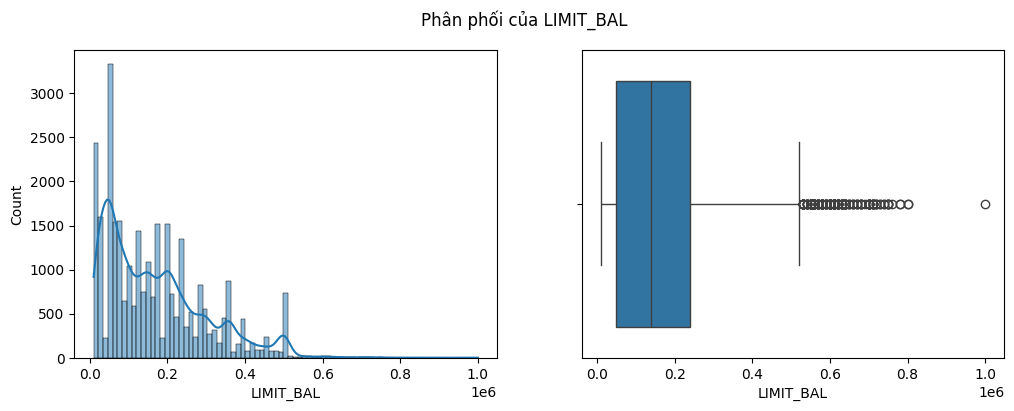

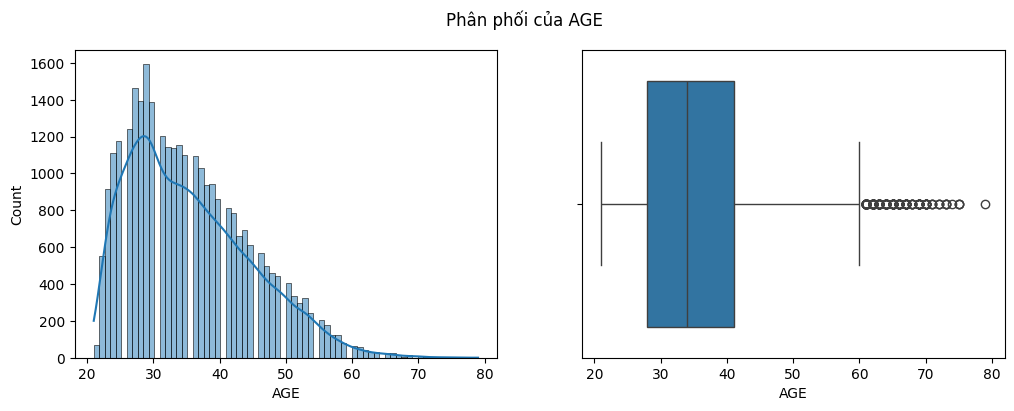

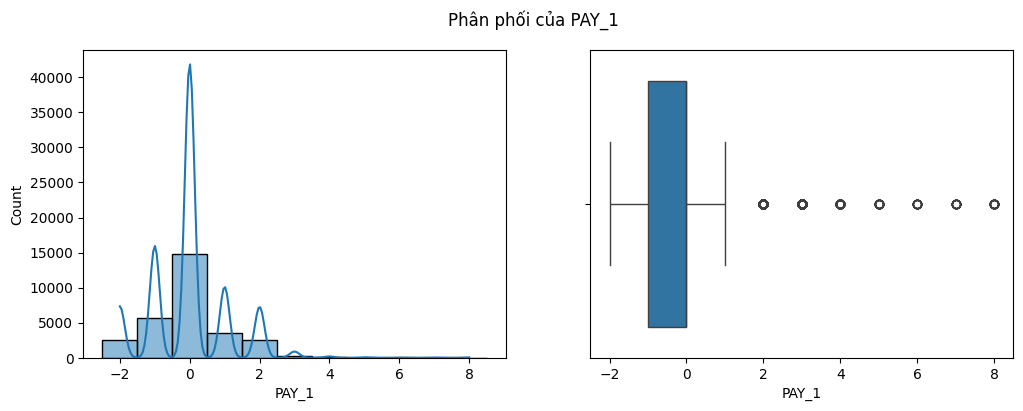

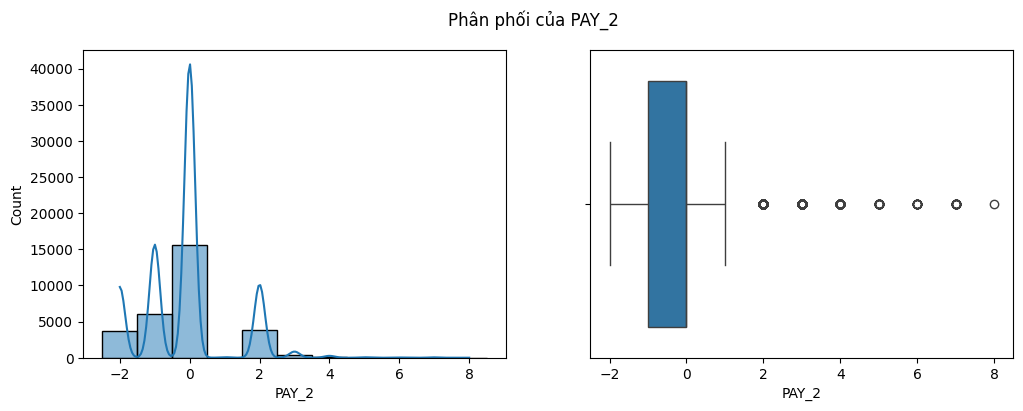

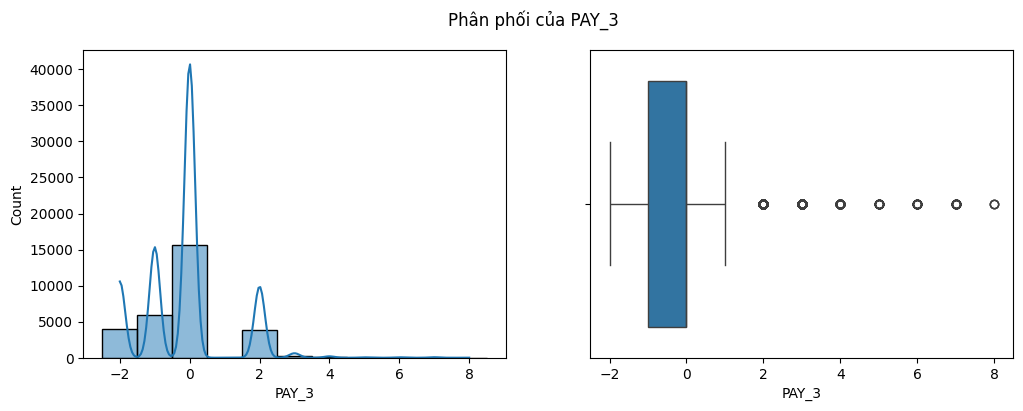

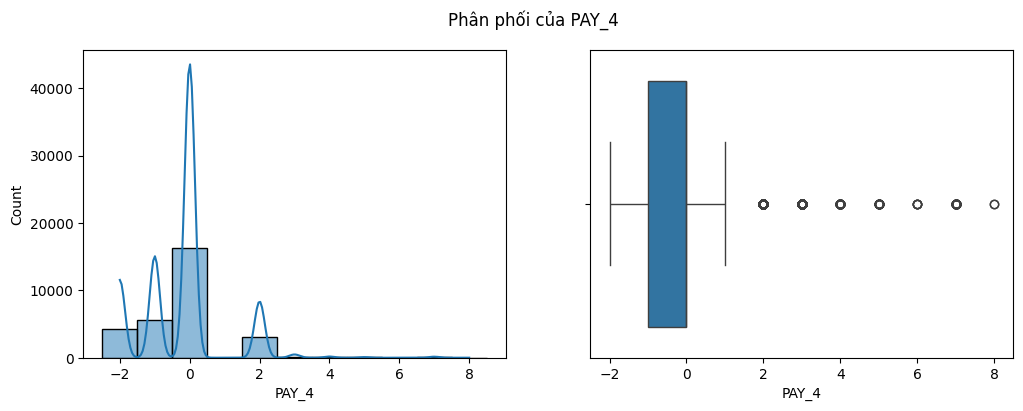

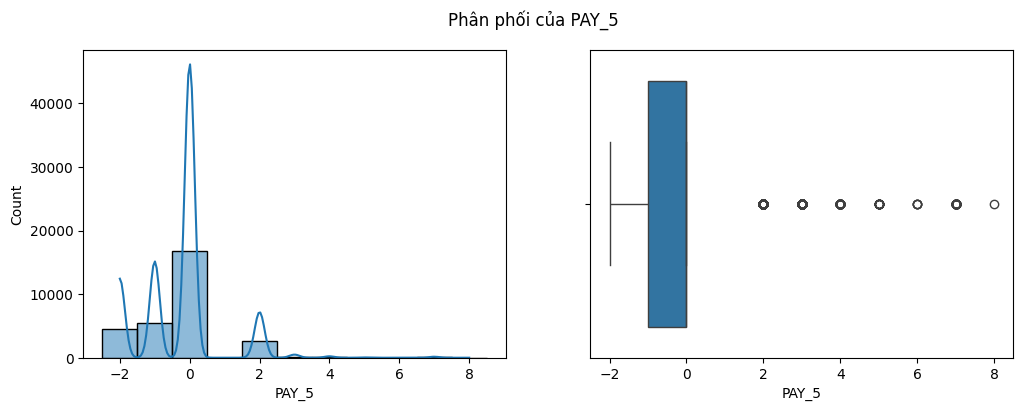

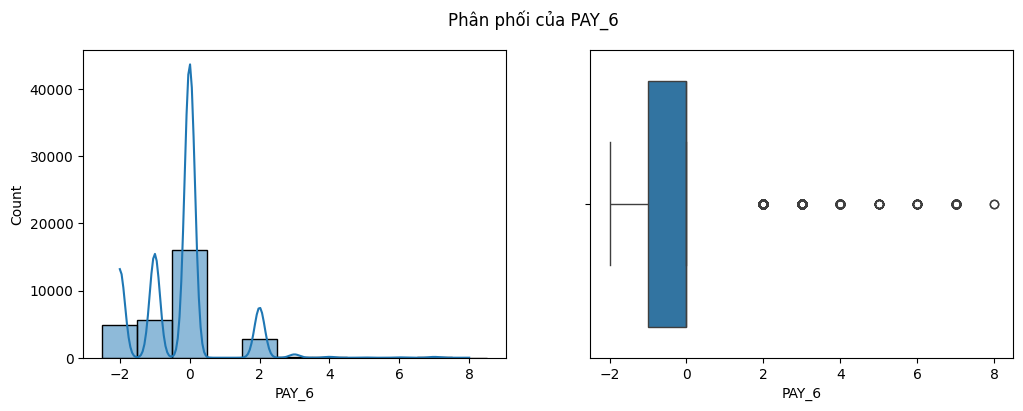

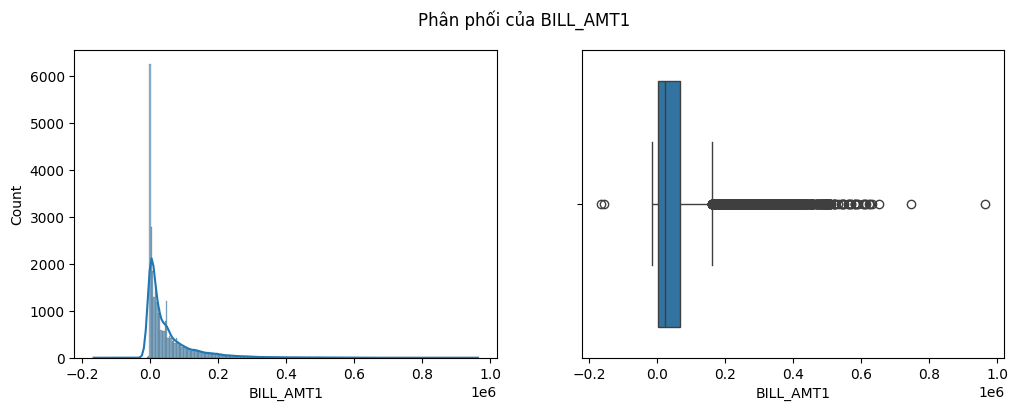

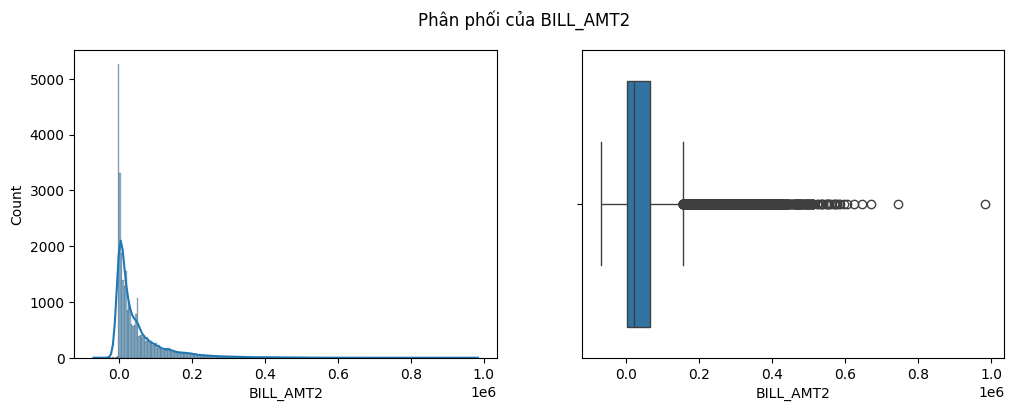

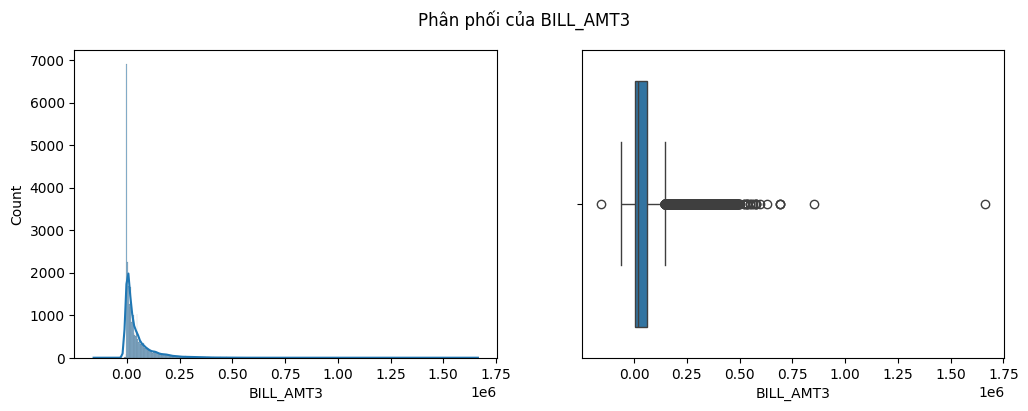

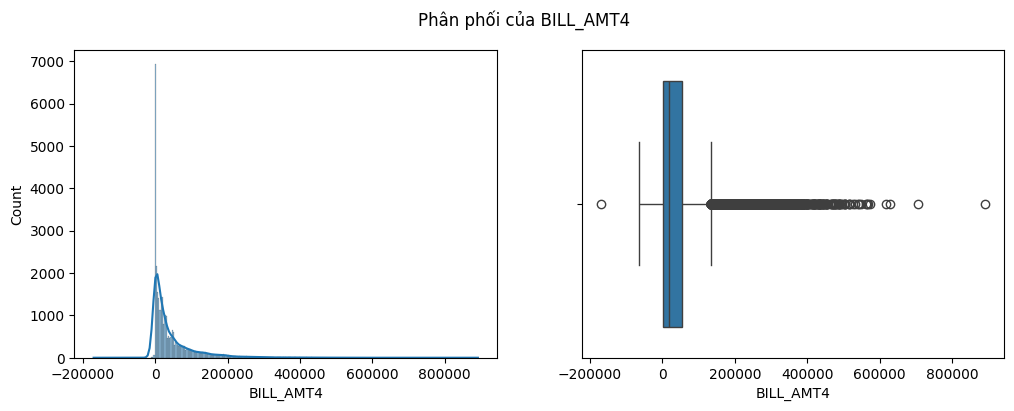

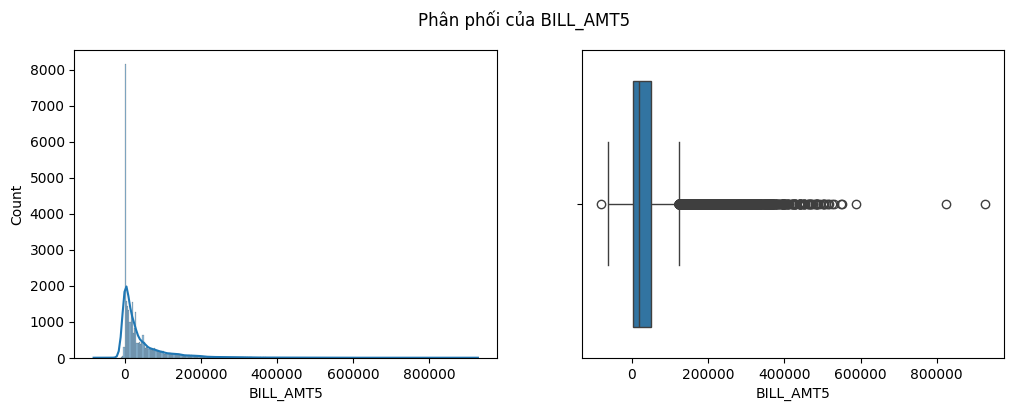

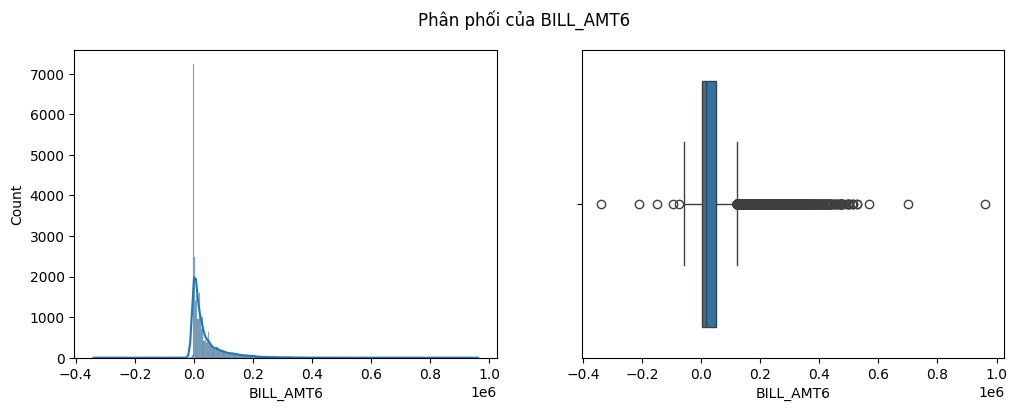

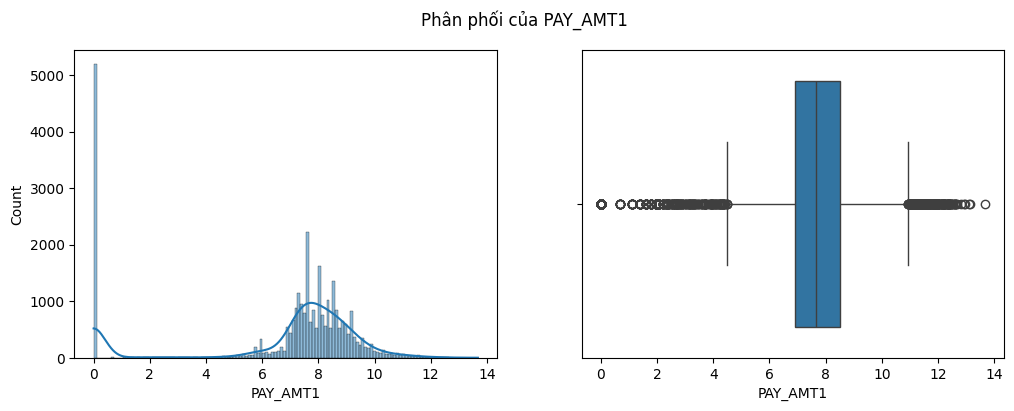

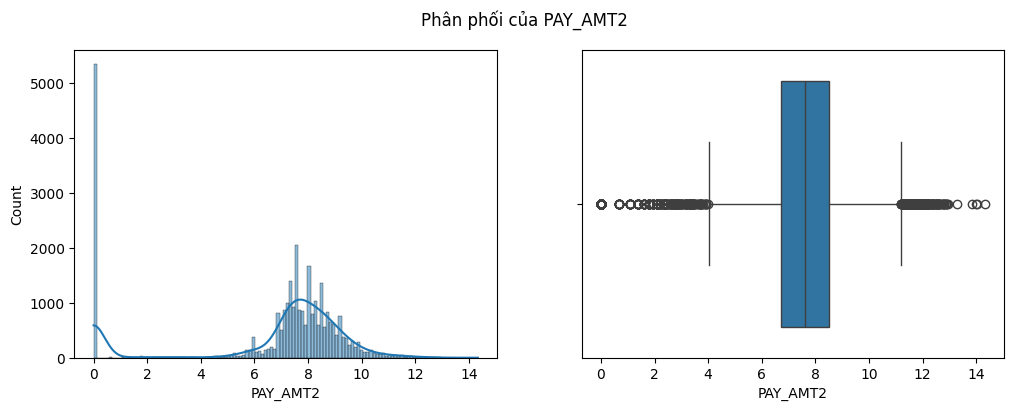

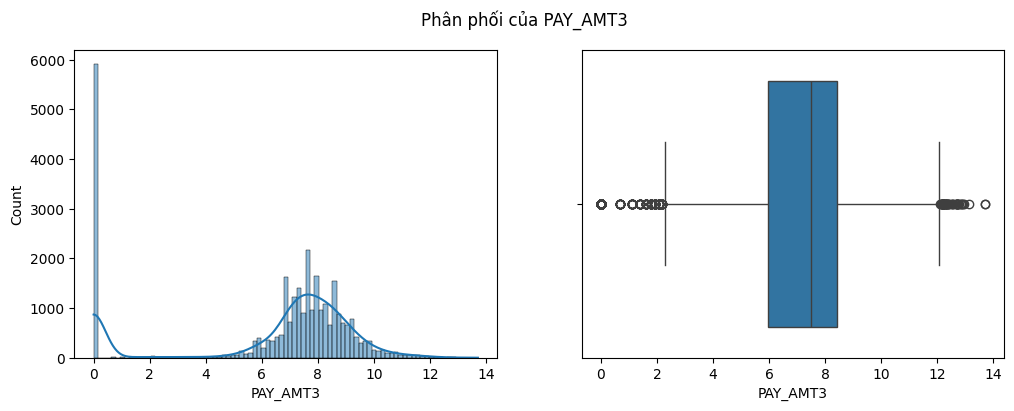

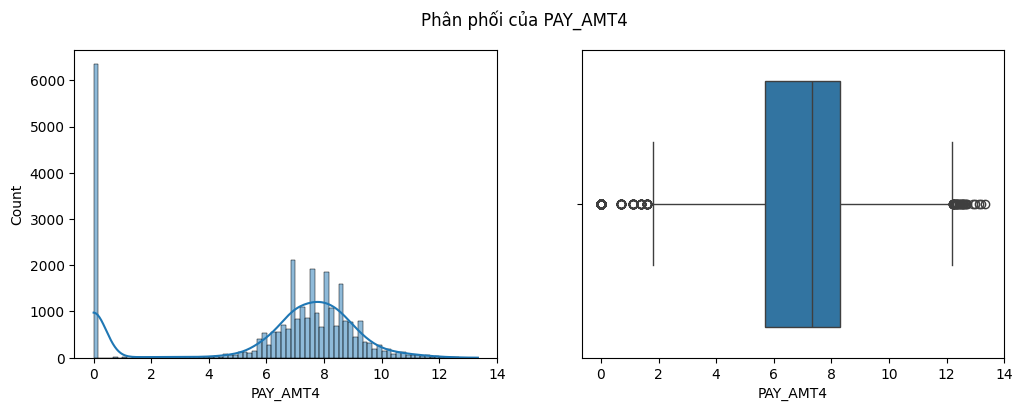

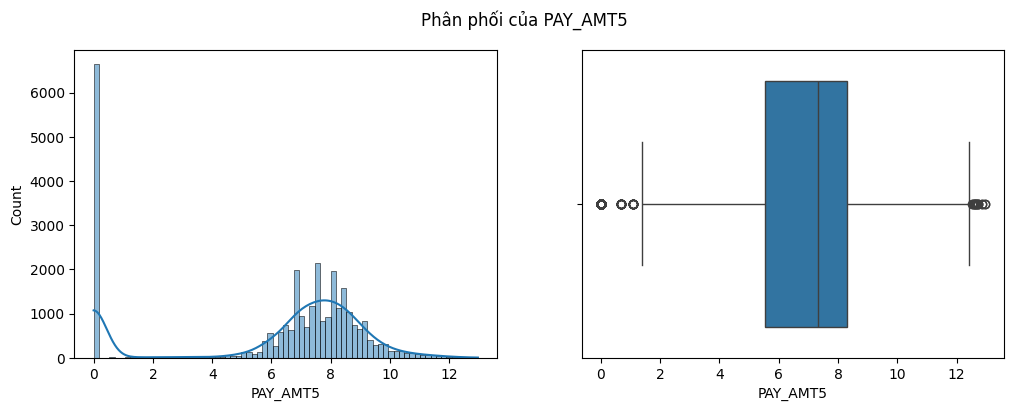

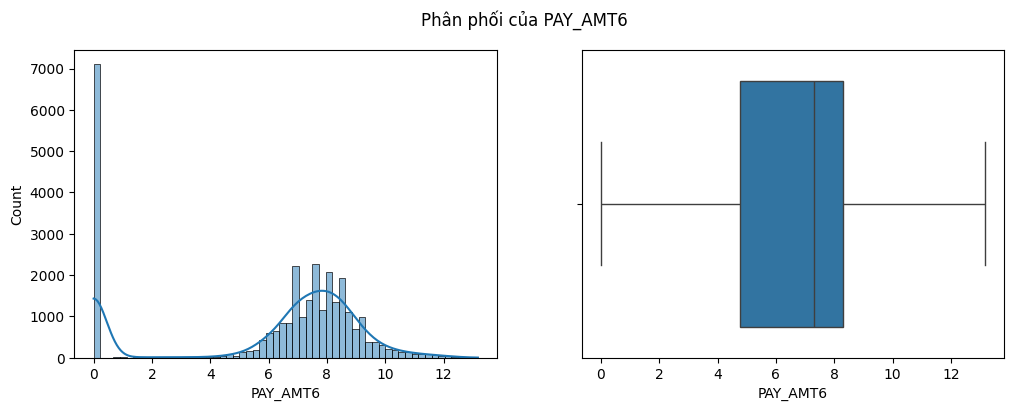

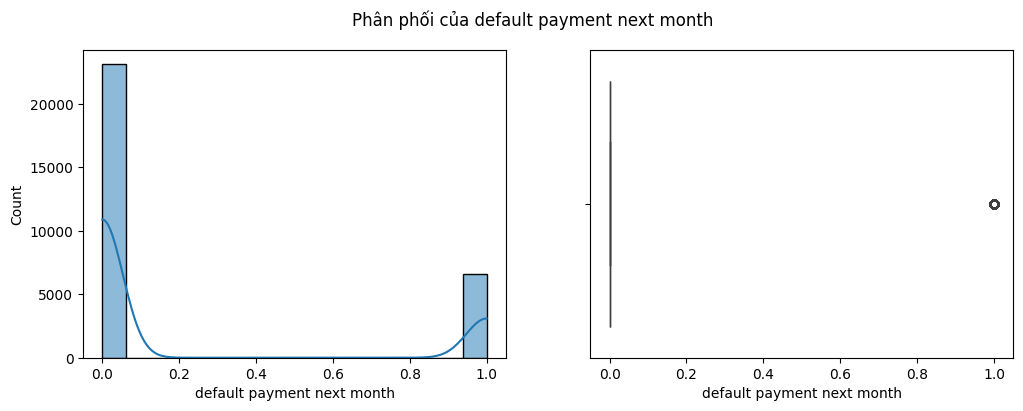

In [ ]:
# Hàm vẽ kết hợp histogram + boxplot
def plot_dist_box(df_clean, var):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[var], kde=True, ax=ax1)
    sns.boxplot(x=df[var], ax=ax2)
    plt.suptitle(f'Phân phối của {var}')
    plt.show()

# Áp dụng cho các biến quan trọng
for col in cols_for_std:
    plot_dist_box(df_clean, col)

##**3.6 Phân tích mối quan hệ giữa các biến với biến mục tiêu**

In [ ]:
# Kiểm tra dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29685 non-null  object  
 1   LIMIT_BAL                   29685 non-null  int64   
 2   SEX                         29685 non-null  category
 3   EDUCATION                   29685 non-null  category
 4   MARRIAGE                    29685 non-null  category
 5   AGE                         29685 non-null  int64   
 6   PAY_1                       29685 non-null  category
 7   PAY_2                       29685 non-null  category
 8   PAY_3                       29685 non-null  category
 9   PAY_4                       29685 non-null  category
 10  PAY_5                       29685 non-null  category
 11  PAY_6                       29685 non-null  category
 12  BILL_AMT1                   29685 non-null  int64   
 13  BILL_AMT2            

###**3.6.1 Ma trận tương quan**

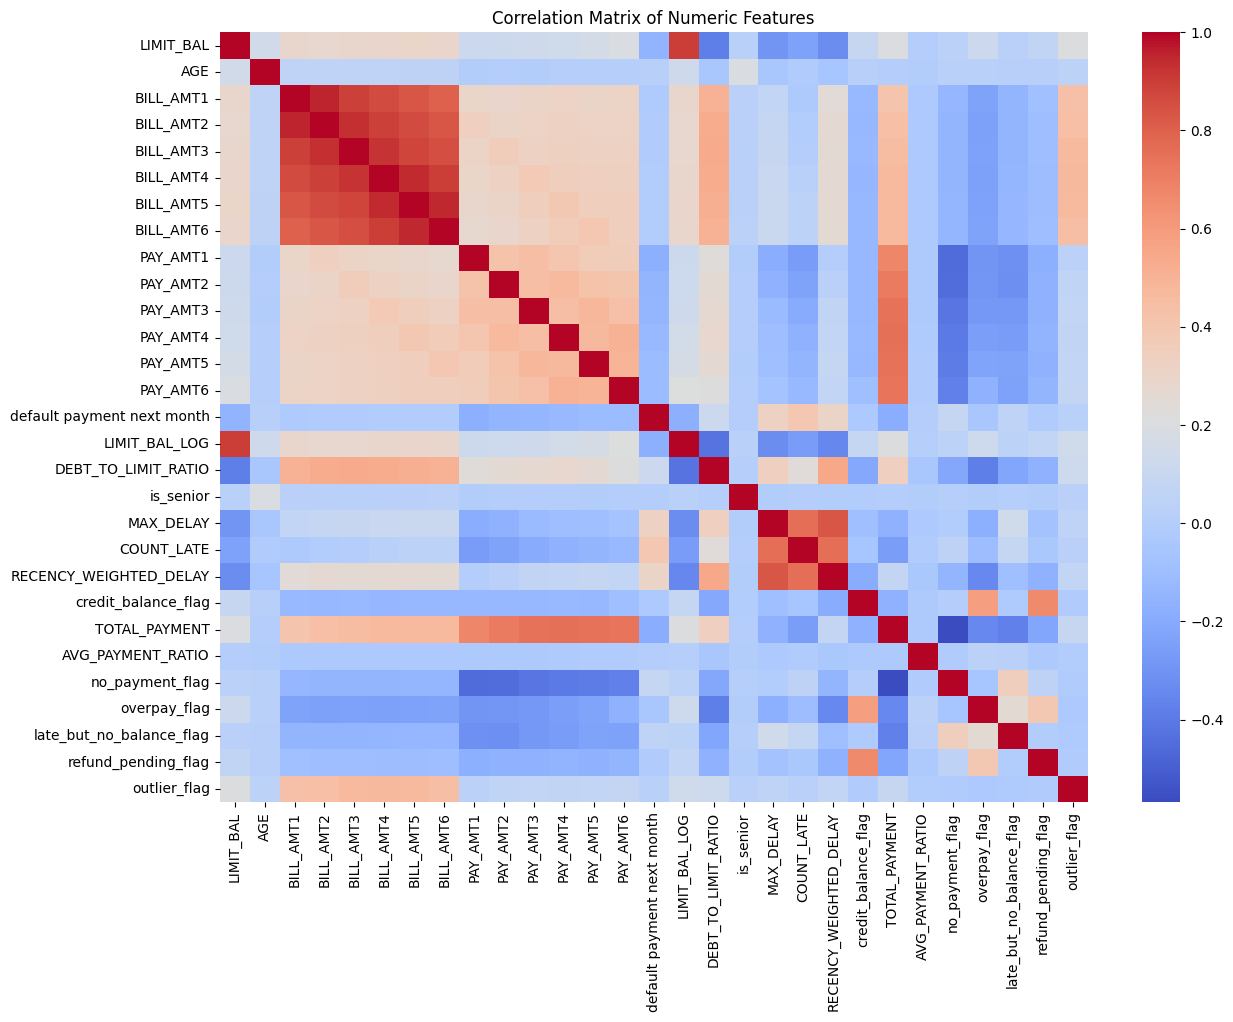

In [ ]:
# Trực quan hóa ma trận tương quan cho các đặc trưng kiểu số

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

<Axes: >

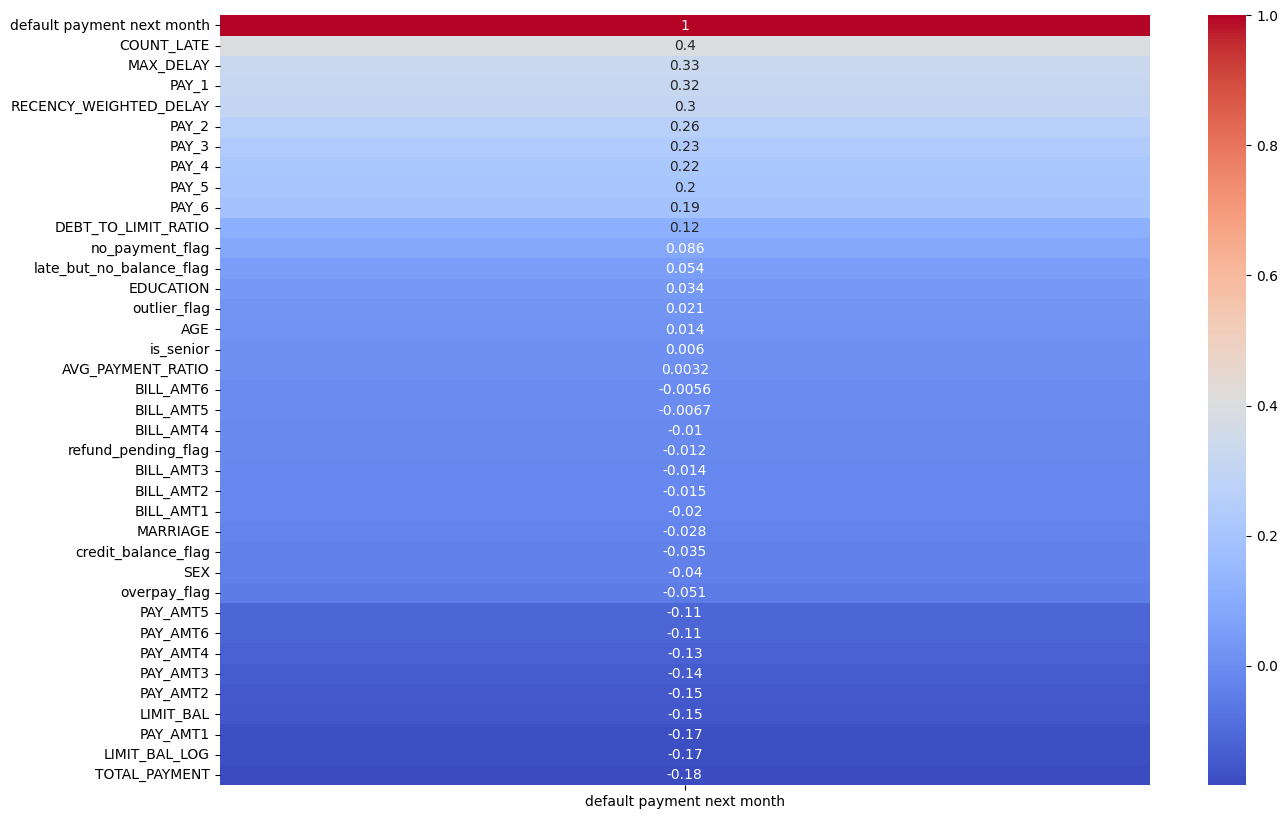

In [ ]:
# Heatmap tương quan với target
# Loại bỏ cột 'ID' trước khi tính ma trận tương quan
df_numeric = df.drop(columns=['ID'], errors='ignore')

corr_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix[['default payment next month']].sort_values(by='default payment next month', ascending=False),
            annot=True, cmap='coolwarm')

### **3.6.2 Liên hệ giữa biến số và khả năng vỡ nợ**


Liên hệ giữa các biến số và khả năng vỡ nợ

Correlation with 'default payment next month' (for numeric variables):
default payment next month    1.000000
COUNT_LATE                    0.395742
MAX_DELAY                     0.326989
RECENCY_WEIGHTED_DELAY        0.304163
DEBT_TO_LIMIT_RATIO           0.115586
no_payment_flag               0.085965
late_but_no_balance_flag      0.054358
outlier_flag                  0.020676
AGE                           0.013698
is_senior                     0.006026
AVG_PAYMENT_RATIO             0.003237
BILL_AMT6                    -0.005561
BILL_AMT5                    -0.006687
BILL_AMT4                    -0.010236
refund_pending_flag          -0.012500
BILL_AMT3                    -0.014272
BILL_AMT2                    -0.014519
BILL_AMT1                    -0.019692
credit_balance_flag          -0.035199
overpay_flag                 -0.050925
PAY_AMT5                     -0.110091
PAY_AMT6                     -0.111812
PAY_AMT4                  

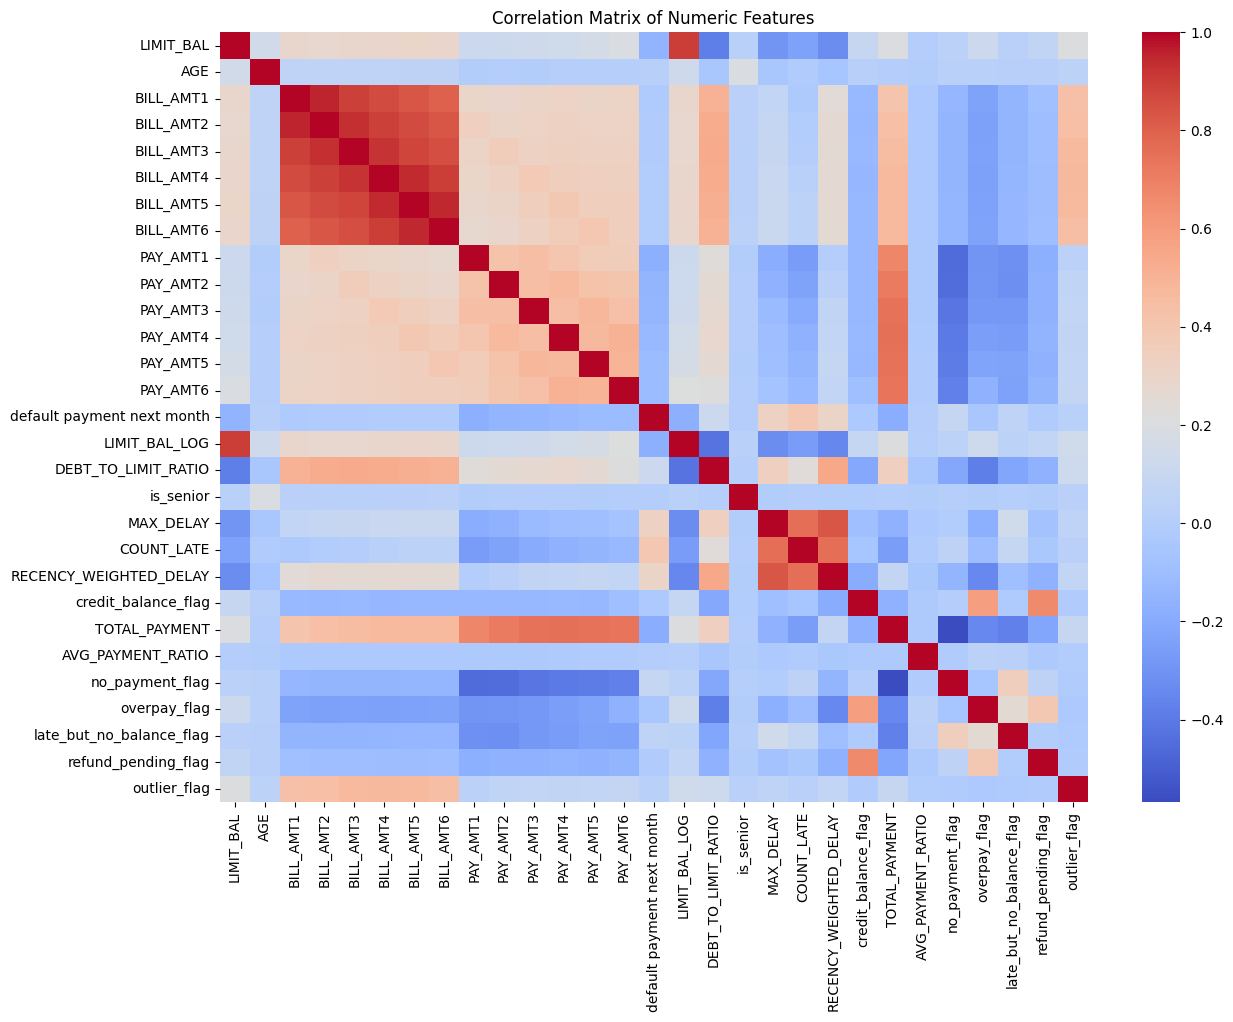


Boxplots of key numeric variables by default status:


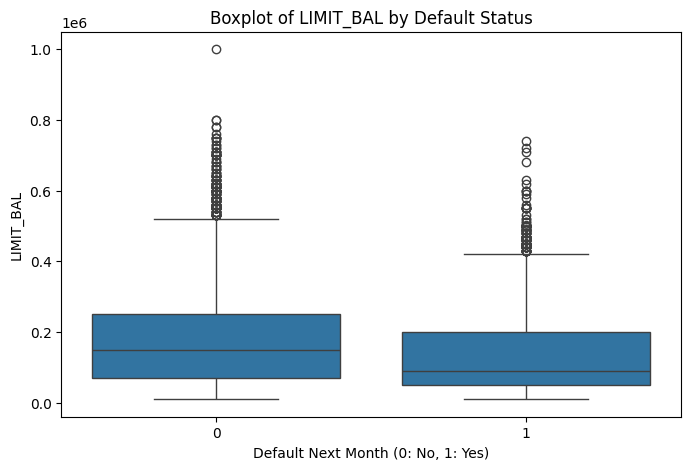

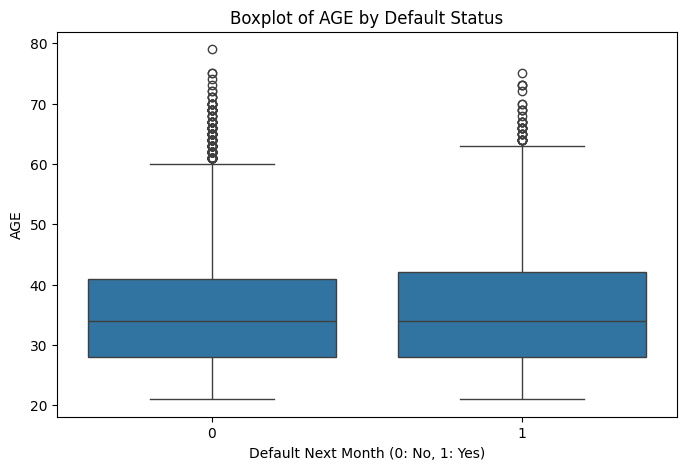

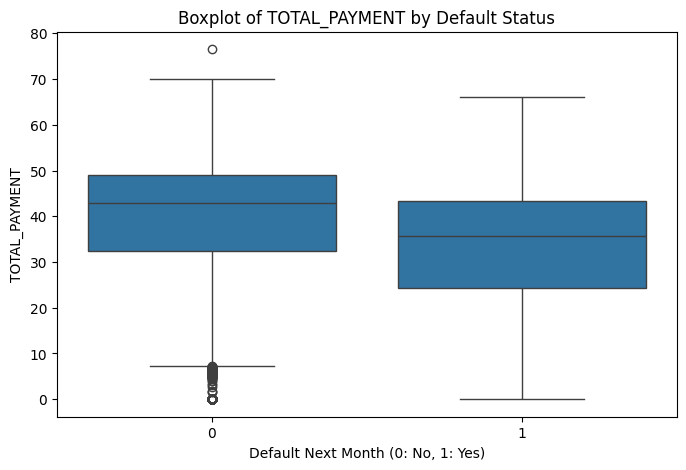

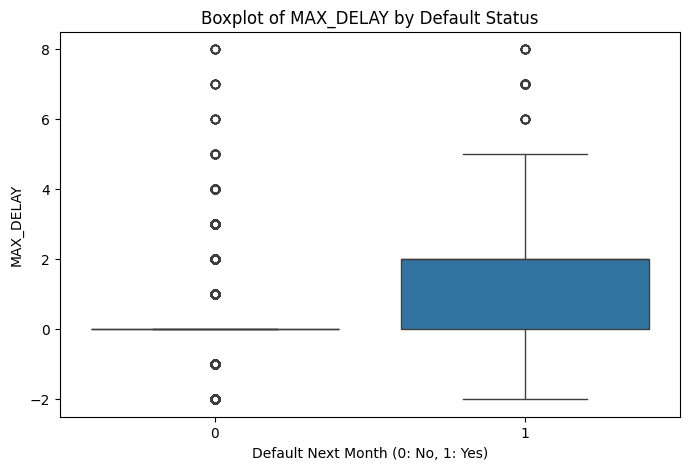

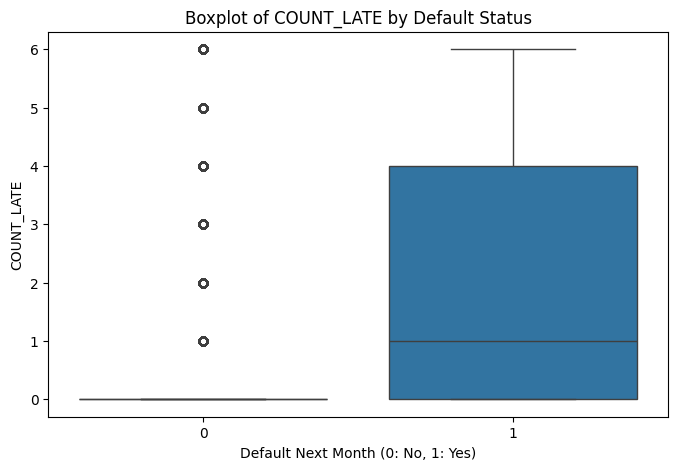

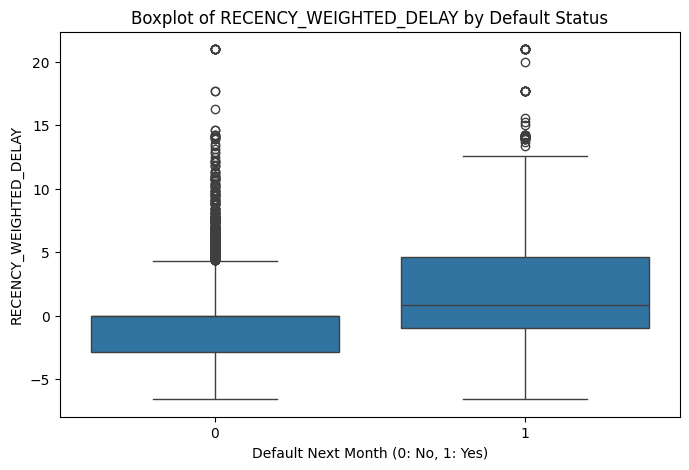

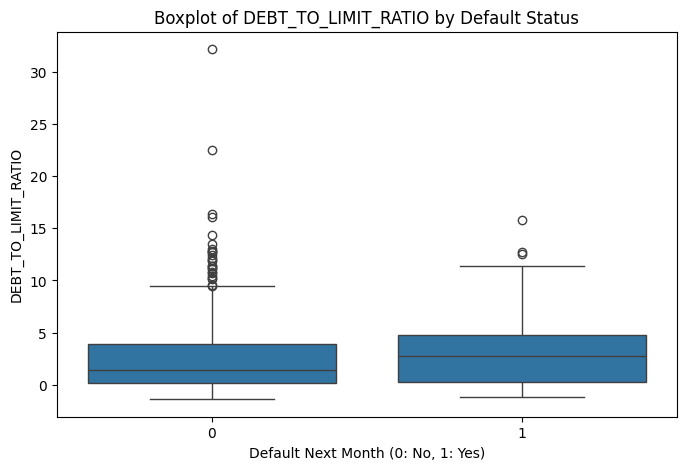


Default Rates based on engineered features:

Tỷ lệ vỡ nợ theo nhóm DEBT_TO_LIMIT_RATIO:


default payment next month      0     1    All  Default Rate (%)
DEBT_RATIO_GROUP                                                
<=0                           150    51    201             12.69
0-0.5                        8273  1940  10213              9.50
0.5-1                        1909   315   2224              7.08
>1                          12791  4256  17047             12.48
All                         23123  6562  29685             11.05


Tỷ lệ vỡ nợ theo nhóm MAX_DELAY:


default payment next month      0     1    All  Default Rate (%)
MAX_DELAY_GROUP                                                 
<=0                          4373   744   5117              7.27
1                           13128  1640  14768              5.55
2                            1207   388   1595             12.16
3                            3983  3051   7034             21.69
>3                            432   739   1171             31.55
All                         23123  6562  29685             11.05


Tỷ lệ vỡ nợ theo nhóm COUNT_LATE:


default payment next month      0     1    All  Default Rate (%)
COUNT_LATE_GROUP                                                
0 Months                    17501  2384  19885              5.99
1 Month                      2988  1234   4222             14.61
2-3 Months                   1707  1299   3006             21.61
>3 Months                     927  1645   2572             31.98
All                         23123  6562  29685             11.05

In [ ]:
# Mối liên hệ giữa biến numerical với biến mục tiêu
# prompt: Liên hệ giữa các biến số và khả năng vỡ nợ
# biến tạo thêm với biến mục tiêu

print("\nLiên hệ giữa các biến số và khả năng vỡ nợ")

# 1. Tương quan với biến mục tiêu (cho biến số)
print("\nCorrelation with 'default payment next month' (for numeric variables):")
correlation_with_default = df.corr(numeric_only=True)['default payment next month'].sort_values(ascending=False)
print(correlation_with_default)

# Trực quan hóa ma trận tương quan cho các đặc trưng số
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 2. Phân tích Boxplot cho biến số liên tục theo biến mục tiêu
print("\nBoxplots of key numeric variables by default status:")
numeric_vars_to_plot = ['LIMIT_BAL', 'AGE', 'TOTAL_PAYMENT', 'MAX_DELAY', 'COUNT_LATE', 'RECENCY_WEIGHTED_DELAY', 'DEBT_TO_LIMIT_RATIO']

for var in numeric_vars_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='default payment next month', y=var, data=df)
    plt.title(f'Boxplot of {var} by Default Status')
    plt.xlabel('Default Next Month (0: No, 1: Yes)')
    plt.ylabel(var)
    plt.show()

# 3. Phân tích dựa trên các biến nhân tạo
print("\nDefault Rates based on engineered features:")

# DEBT_TO_LIMIT_RATIO groups
df['DEBT_RATIO_GROUP'] = pd.cut(df['DEBT_TO_LIMIT_RATIO'],
                                bins=[-np.inf, 0, 0.5, 1, np.inf],
                                labels=['<=0', '0-0.5', '0.5-1', '>1'],
                                right=False)
print("\nTỷ lệ vỡ nợ theo nhóm DEBT_TO_LIMIT_RATIO:")
ct_debt_ratio = pd.crosstab(df['DEBT_RATIO_GROUP'], df['default payment next month'], margins=True)
ct_debt_ratio['Default Rate (%)'] = (ct_debt_ratio[1] / ct_debt_ratio.sum(axis=1) * 100).round(2)
display(ct_debt_ratio)

# MAX_DELAY groups
df['MAX_DELAY_GROUP'] = pd.cut(df['MAX_DELAY'],
                               bins=[-np.inf, 0, 1, 2, 3, np.inf],
                               labels=['<=0', '1', '2', '3', '>3'],
                               right=False)
print("\nTỷ lệ vỡ nợ theo nhóm MAX_DELAY:")
ct_max_delay = pd.crosstab(df['MAX_DELAY_GROUP'], df['default payment next month'], margins=True)
ct_max_delay['Default Rate (%)'] = (ct_max_delay[1] / ct_max_delay.sum(axis=1) * 100).round(2)
display(ct_max_delay)

# COUNT_LATE groups
df['COUNT_LATE_GROUP'] = pd.cut(df['COUNT_LATE'],
                                bins=[-np.inf, 0.5, 1.5, 3.5, np.inf],
                                labels=['0 Months', '1 Month', '2-3 Months', '>3 Months'],
                                right=True) # Sử dụng tham số right=True để biểu diễn khoảng chuẩn đúng
print("\nTỷ lệ vỡ nợ theo nhóm COUNT_LATE:")
ct_count_late = pd.crosstab(df['COUNT_LATE_GROUP'], df['default payment next month'], margins=True)
ct_count_late['Default Rate (%)'] = (ct_count_late[1] / ct_count_late.sum(axis=1) * 100).round(2)
display(ct_count_late)


**Nhận xét:**
1. DEBT_TO_LIMIT_RATIO
Nhóm 0.5–1 có tỷ lệ vỡ nợ thấp nhất (7.08%), cho thấy đây là mức sử dụng hợp lý tín dụng.

Nhóm <=0 (âm hoặc không sử dụng hạn mức) và >1 (xài quá hạn mức) có tỷ lệ cao hơn ~12.5%, phản ánh hành vi tín dụng bất thường hoặc rủi ro.

2. MAX_DELAY
Tỷ lệ vỡ nợ tăng rõ rệt theo mức độ trễ hạn:

Trễ 1 kỳ: chỉ 5.55% (thấp nhất).

Trễ 3 kỳ: lên đến 21.69%.

Trễ >3 kỳ: cực cao, 31.55%.

Đây là một trong những đặc trưng quan trọng nhất dự báo khả năng vỡ nợ.

3. COUNT_LATE
Không trễ tháng nào: chỉ 5.99% vỡ nợ.

Trễ 1 tháng: 14.61%.

Trễ 2–3 tháng: 21.61%.

Trễ >3 tháng: 31.98%.

Tỷ lệ tăng rất nhanh, cho thấy số lần trễ là chỉ báo rất mạnh.


### **3.6.3 Liên hệ biến phân loại với khả năng vỡ nợ**

/tmp/ipython-input-3897276607.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3897276607.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3897276607.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3897276607.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3897276607.py:71: Fut

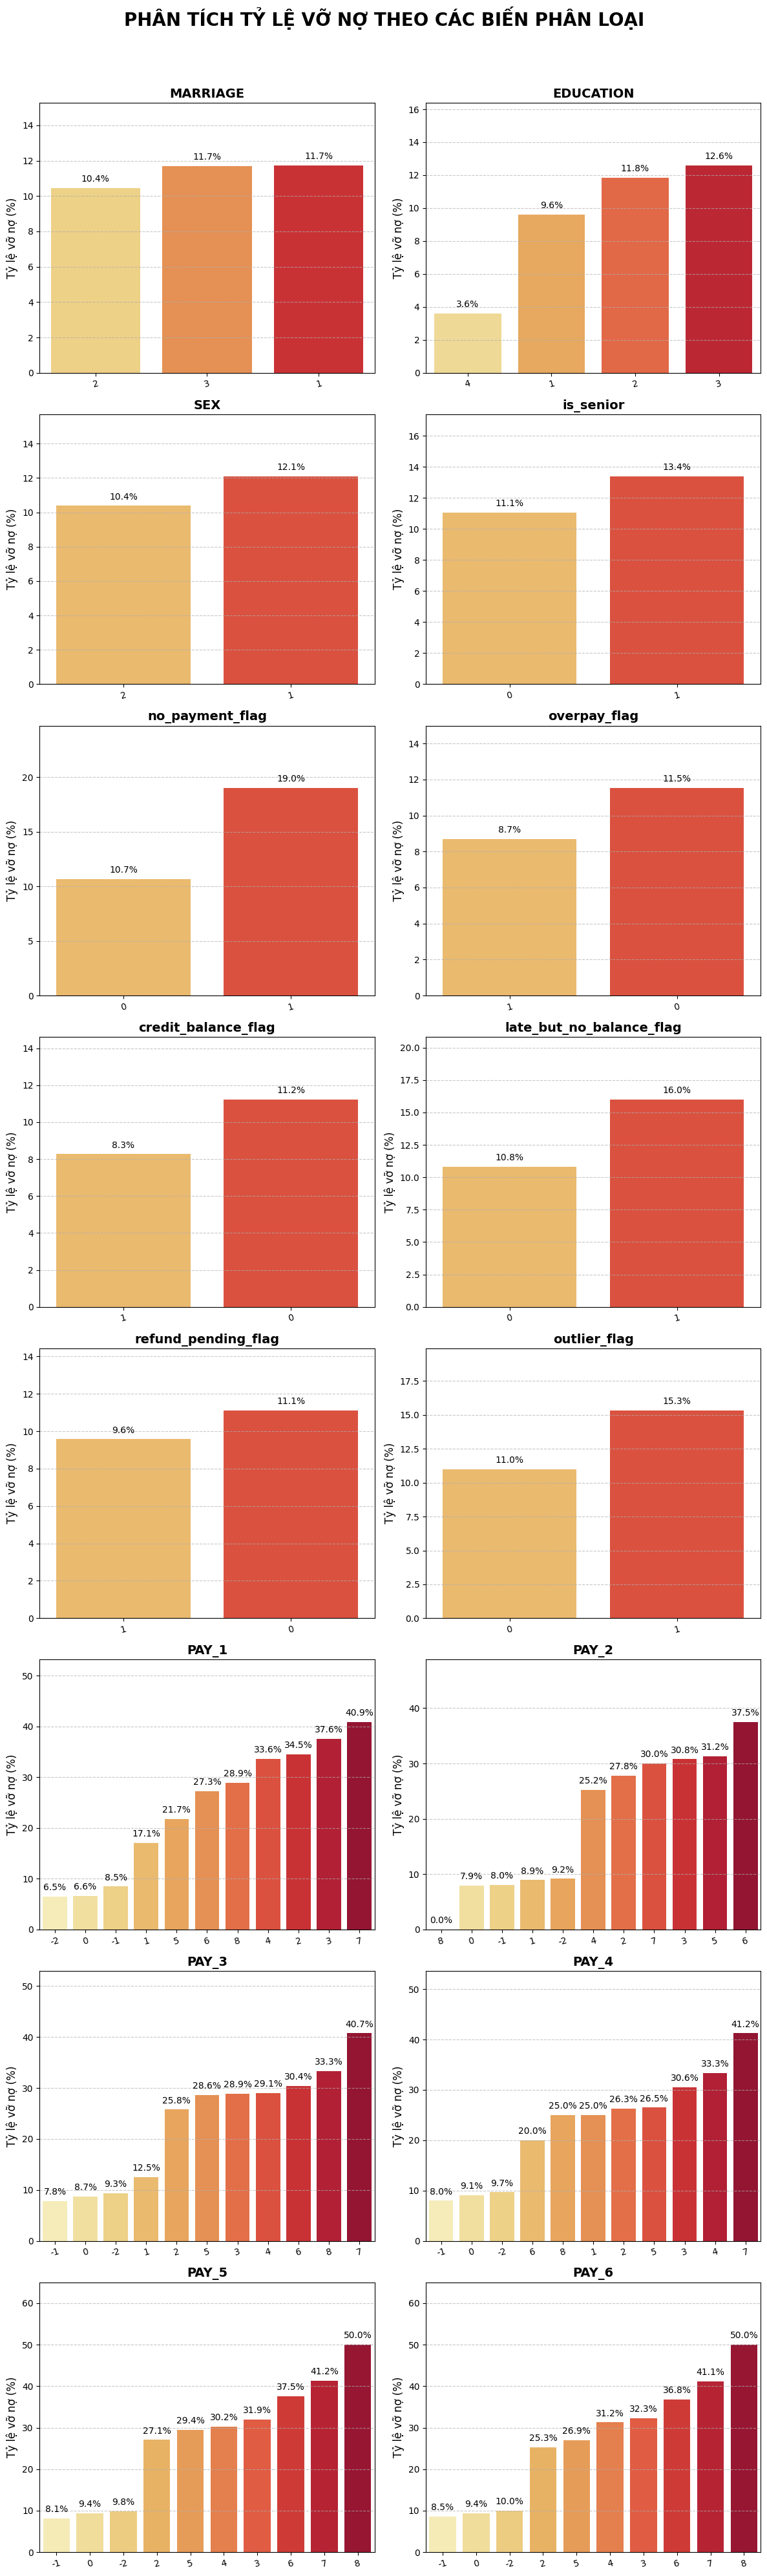


BẢNG TỔNG HỢP TỶ LỆ VỠ NỢ CHI TIẾT

▶ Tỷ lệ vỡ nợ theo MARRIAGE:


default payment next month      0     1    All  Default Rate (%)
MARRIAGE                                                        
1                           10333  3170  13503             11.74
2                           12505  3305  15810             10.45
3                             285    87    372             11.69
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '2'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo EDUCATION:


default payment next month      0     1    All  Default Rate (%)
EDUCATION                                                       
1                            8459  2015  10474              9.62
2                           10596  3288  13884             11.84
3                            3641  1226   4867             12.60
4                             427    33    460              3.59
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '3'
   - AN TOÀN: '4'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo SEX:


default payment next month      0     1    All  Default Rate (%)
SEX                                                             
1                            8930  2845  11775             12.08
2                           14193  3717  17910             10.38
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '2'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo is_senior:


default payment next month      0     1    All  Default Rate (%)
is_senior                                                       
0                           23060  6539  29599             11.05
1                              63    23     86             13.37
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '0'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo no_payment_flag:


default payment next month      0     1    All  Default Rate (%)
no_payment_flag                                                 
0                           22245  6023  28268             10.65
1                             878   539   1417             19.02
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '0'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo overpay_flag:


default payment next month      0     1    All  Default Rate (%)
overpay_flag                                                    
0                           19031  5701  24732             11.53
1                            4092   861   4953              8.69
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '0'
   - AN TOÀN: '1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo credit_balance_flag:


default payment next month      0     1    All  Default Rate (%)
credit_balance_flag                                             
0                           21524  6245  27769             11.24
1                            1599   317   1916              8.27
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '0'
   - AN TOÀN: '1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo late_but_no_balance_flag:


default payment next month      0     1    All  Default Rate (%)
late_but_no_balance_flag                                        
0                           22132  6095  28227             10.80
1                             991   467   1458             16.02
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '0'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo refund_pending_flag:


default payment next month      0     1    All  Default Rate (%)
refund_pending_flag                                             
0                           22413  6394  28807             11.10
1                             710   168    878              9.57
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '0'
   - AN TOÀN: '1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo outlier_flag:


default payment next month      0     1    All  Default Rate (%)
outlier_flag                                                    
0                           22917  6471  29388             11.01
1                             206    91    297             15.32
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '1'
   - AN TOÀN: '0'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_1:


default payment next month      0     1    All  Default Rate (%)
PAY_1                                                           
-2                           2256   340   2596              6.55
-1                           4689   956   5645              8.47
0                           12893  1959  14852              6.60
1                            2360  1221   3581             17.05
2                             799  1773   2572             34.47
3                              77   234    311             37.62
4                              21    43     64             33.59
5                              13    10     23             21.74
6                               5     6     11             27.27
7                               2     9     11             40.91
8                               8    11     19             28.95
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '7'
   - AN TOÀN: '-2'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_2:


default payment next month      0     1    All  Default Rate (%)
PAY_2                                                           
-2                           3059   687   3746              9.17
-1                           5030   959   5989              8.01
0                           13095  2468  15563              7.93
1                              23     5     28              8.93
2                            1721  2157   3878             27.81
3                             125   200    325             30.77
4                              49    50     99             25.25
5                               9    15     24             31.25
6                               3     9     12             37.50
7                               8    12     20             30.00
8                               1     0      1              0.00
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '6'
   - AN TOÀN: '8'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_3:


default payment next month      0     1    All  Default Rate (%)
PAY_3                                                           
-2                           3293   753   4046              9.31
-1                           4950   919   5869              7.83
0                           12889  2710  15599              8.69
1                               3     1      4             12.50
2                            1833  1949   3782             25.77
3                             100   137    237             28.90
4                              31    43     74             29.05
5                               9    12     21             28.57
6                               9    14     23             30.43
7                               5    22     27             40.74
8                               1     2      3             33.33
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '7'
   - AN TOÀN: '-1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_4:


default payment next month      0     1    All  Default Rate (%)
PAY_4                                                           
-2                           3477   832   4309              9.65
-1                           4727   897   5624              7.97
0                           13314  2971  16285              9.12
1                               1     1      2             25.00
2                            1482  1639   3121             26.26
3                              70   110    180             30.56
4                              22    44     66             33.33
5                              16    18     34             26.47
6                               3     2      5             20.00
7                              10    47     57             41.23
8                               1     1      2             25.00
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '7'
   - AN TOÀN: '-1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_5:


default payment next month      0     1    All  Default Rate (%)
PAY_5                                                           
-2                           3616   887   4503              9.85
-1                           4596   892   5488              8.13
0                           13603  3151  16754              9.40
2                            1194  1409   2603             27.06
3                              64   113    177             31.92
4                              32    49     81             30.25
5                               7    10     17             29.41
6                               1     3      4             37.50
7                              10    47     57             41.23
8                               0     1      1             50.00
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '8'
   - AN TOÀN: '-1'
----------------------------------------------------------------------

▶ Tỷ lệ vỡ nợ theo PAY_6:


default payment next month      0     1    All  Default Rate (%)
PAY_6                                                           
-2                           3877   972   4849             10.02
-1                           4715   971   5686              8.54
0                           13073  3020  16093              9.38
2                            1357  1392   2749             25.32
3                              64   117    181             32.32
4                              18    30     48             31.25
5                               6     7     13             26.92
6                               5    14     19             36.84
7                               8    37     45             41.11
8                               0     2      2             50.00
All                         23123  6562  29685             11.05

   - RỦI RO CAO: '8'
   - AN TOÀN: '-1'
----------------------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Hàm nhận xét tự động: xuất ra insight từ bảng tỷ lệ vỡ nợ
def auto_default_comment(ct, varname):
    # Xác định nhóm có tỷ lệ vỡ nợ cao nhất và thấp nhất
    # Loại bỏ dòng 'All' trước khi tìm max/min
    rates = ct['Default Rate (%)'].drop('All', errors='ignore')

    if rates.empty:
        return "Không có dữ liệu để nhận xét.", "Không có dữ liệu để nhận xét."

    max_group = rates.idxmax()
    min_group = rates.idxmin()

    return max_group, min_group

# ========== TỶ LỆ VỠ NỢ THEO BIẾN PHÂN LOẠI ==========

cat_vars = ['MARRIAGE', 'EDUCATION', 'SEX', 'is_senior',
            'no_payment_flag', 'overpay_flag', 'credit_balance_flag',
            'late_but_no_balance_flag', 'refund_pending_flag', 'outlier_flag',
            'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


# Tính toán kích thước lưới subplot
n_vars = len(cat_vars)
ncols = 2 # Số cột bạn muốn
nrows = math.ceil(n_vars / ncols) # Số hàng cần thiết

# Thiết lập layout cho các biểu đồ
plt.figure(figsize=(12, nrows * 5)) # Điều chỉnh kích thước figure cho phù hợp
plt.suptitle('PHÂN TÍCH TỶ LỆ VỠ NỢ THEO CÁC BIẾN PHÂN LOẠI',
             fontsize=20, fontweight='bold', y=0.995) # Điều chỉnh y cho title

# Tạo dictionary để lưu kết quả nhận xét
insights = {}

# Vòng lặp qua từng biến
for i, var in enumerate(cat_vars, 1):
    # Tạo subplot cho trực quan hóa
    plt.subplot(nrows, ncols, i)

    # Tạo bảng tỷ lệ vỡ nợ
    ct = pd.crosstab(df[var], df['default payment next month'], margins=True)
    # Đảm bảo không chia cho 0
    ct['Default Rate (%)'] = (ct[1] / ct.sum(axis=1).replace(0, np.nan) * 100).round(2)


    # Tạo bảng không có dòng 'All' cho biểu đồ
    plot_data = ct.drop('All', errors='ignore')

    # Kiểm tra nếu plot_data rỗng
    if plot_data.empty:
        print(f"Không có dữ liệu để vẽ cho biến: {var}")
        plt.title(f'{var} (Không có dữ liệu)', fontsize=14, fontweight='bold')
        plt.xticks([])
        plt.yticks([])
        continue


    # Tạo palette màu theo tỷ lệ vỡ nợ
    # Sắp xếp plot_data theo tỷ lệ vỡ nợ để palette tương ứng
    plot_data_sorted = plot_data.sort_values('Default Rate (%)')
    palette = sns.color_palette("YlOrRd", len(plot_data_sorted))


    # Vẽ biểu đồ
    ax = sns.barplot(
        x=plot_data_sorted.index.astype(str), # Sử dụng index đã sắp xếp
        y=plot_data_sorted['Default Rate (%)'], # Sử dụng dữ liệu đã sắp xếp
        palette=palette
    )

    # Thêm tỷ lệ phần trăm lên mỗi cột
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height): # Chỉ thêm chú thích nếu height không phải NaN
            ax.annotate(f'{height:.1f}%',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=10)

    # Định dạng biểu đồ
    plt.title(f'{var}', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ vỡ nợ (%)', fontsize=12)
    plt.xlabel('')
    plt.xticks(rotation=15)
    # Điều chỉnh ylim chỉ khi có dữ liệu hợp lệ
    if not plot_data['Default Rate (%)'].empty:
        plt.ylim(0, plot_data['Default Rate (%)'].max() * 1.3)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Nhận xét tự động và lưu kết quả
    insights[var] = auto_default_comment(ct, var)

plt.tight_layout(rect=[0, 0, 1, 0.98])  # Điều chỉnh layout để chừa chỗ cho title
plt.show()

# ========== HIỂN THỊ BẢNG SỐ LIỆU CHI TIẾT ==========
print("\n" + "="*80)
print("BẢNG TỔNG HỢP TỶ LỆ VỠ NỢ CHI TIẾT")
print("="*80)

for var in cat_vars:
    print(f"\n▶ Tỷ lệ vỡ nợ theo {var}:")
    ct = pd.crosstab(df[var], df['default payment next month'], margins=True)
    # Đảm bảo không chia cho 0
    ct['Default Rate (%)'] = (ct[1] / ct.sum(axis=1).replace(0, np.nan) * 100).round(2)
    display(ct)

    # Hiển thị thông tin insight tương ứng
    if var in insights:
        max_group, min_group = insights[var]
        print(f"   - RỦI RO CAO: '{max_group}'")
        print(f"   - AN TOÀN: '{min_group}'")
    else:
        print("   - Không có nhận xét do thiếu dữ liệu.")
    print("-"*70)

In [ ]:
# Phát hiện ngoại lai ở PAY_2
df[df['PAY_2'] == 8]


ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_1 PAY_2 PAY_3  \
8843  d095dfd9-b019      40000   2         3        1   24     1     8     7   

     PAY_4  ... TOTAL_PAYMENT AVG_PAYMENT_RATIO  no_payment_flag  \
8843     6  ...           0.0               0.0                1   

      overpay_flag  late_but_no_balance_flag  refund_pending_flag  \
8843             0                         0                    0   

      outlier_flag  DEBT_RATIO_GROUP  MAX_DELAY_GROUP  COUNT_LATE_GROUP  
8843             0                >1               >3         >3 Months  

[1 rows x 42 columns]

In [ ]:
#Xóa dòng này vì lỗi logic, không trả nợ nhưng biến default payment next month là 0
df=df.drop(df[df['PAY_2'] == 8].index)

**Nhận xét:**
1. Tỷ lệ vỡ nợ theo MARRIAGE_grouped:
   - Nhóm '1' (rủi ro cao) có tỷ lệ vỡ nợ 11.74%, cao hơn trung bình toàn tập (11.05%).
   - Nhóm '2' (an toàn) có tỷ lệ vỡ nợ thấp hơn trung bình (10.45%).

2. Tỷ lệ vỡ nợ theo EDUCATION:
   - Nhóm '3' có tỷ lệ cao nhất (12.60%) => RỦI RO CAO.
   - Nhóm '4' có tỷ lệ thấp nhất (3.59%) => AN TOÀN rõ rệt.

3. Tỷ lệ vỡ nợ theo SEX:
   - Giới tính '1' (nam) có tỷ lệ vỡ nợ cao hơn nữ (12.08% > 10.38%).

4. is_senior (người cao tuổi):
   - Người cao tuổi (1) có tỷ lệ vỡ nợ cao (13.37%) dù số lượng ít.

5. no_payment_flag (không trả khoản nào):
   - Có cờ này => rủi ro cao (19.02% vs 10.65%).

6. overpay_flag (trả dư nợ):
   - Trả dư có tỷ lệ vỡ nợ thấp hơn rõ rệt (8.69%) => AN TOÀN.

7. credit_balance_flag (còn dư tín dụng):
   - Có dư tín dụng (flag = 1) => an toàn hơn (8.27%).

8. late_but_no_balance_flag (trễ nhưng không nợ):
   - Có flag này => rủi ro cao (16.02%).

9. refund_pending_flag:
   - Có hoàn tiền đang chờ xử lý => tỷ lệ vỡ nợ thấp hơn trung bình (9.57%).

10. outlier_flag (do Isolation Forest đánh dấu):
   - Những điểm bị đánh dấu là outlier có tỷ lệ vỡ nợ cao (15.32%).

🔎 Kết luận:
Một số đặc trưng phân biệt rủi ro tốt: `no_payment_flag`, `late_but_no_balance_flag`, `EDUCATION`, `overpay_flag`.

11. Tỷ lệ vỡ nợ theo PAY_1 đến PAY_6 (mức độ trễ hạn thanh toán trong 6 tháng gần nhất):

Nhìn chung, càng trễ hạn nhiều, tỷ lệ vỡ nợ càng tăng mạnh. Những nhóm có chỉ số PAY từ 2 trở lên đều có tỷ lệ vỡ nợ vượt xa trung bình 11.05%.

Các mức rủi ro cao nhất thường rơi vào PAY = 7 hoặc 8 với tỷ lệ vỡ nợ dao động từ ~40% đến 50%, thể hiện rõ ràng tình trạng nợ xấu nghiêm trọng.

Ngược lại, các nhóm PAY = -2, -1, hoặc 0 (không trễ hạn hoặc trả đúng hạn) có tỷ lệ vỡ nợ thấp (dưới 10%), là nhóm an toàn.


In [ ]:
df.to_csv('/content/drive/MyDrive/MiniProject/df_da_xu_ly.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MiniProject/df_da_xu_ly.csv')


#**🤖 4.A Xây dựng và huấn luyện mô hình**



In [ ]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24      2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2      85698822-43f5      90000    2          2         2   34      0      0   
3      0737c11b-be42      50000    2          2         1   37      0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
...              ...        ...  ...        ...       ...  ...    ...    ...   
29679  ecff42d0-bdc6     220000    1          3         1   39      0      0   
29680  99d1fa0e-222b     150000    1          3         2   43     -1     -1   
29681  95cdd3e7-4f24      30000    1          2         2   37      4      3   
29682  00d03f02-04cd      80000    1          3         1   41      1     -1   
29683  15d69f9f-5ad3      50000    1          2         1   46      0      0   

       PAY_3  PAY_4  ...  TOTAL_PAYMENT  AVG_PAYMENT_RATIO  no_payment_flag  \
0         -1     -1  ...       6.536692           0.000848                0   
1          0      0  ...      28.327667           0.001659                0   
2          0      0  ...      43.883352           0.000432                0   
3          0      0  ...      43.191308           0.000187                0   
4         -1      0  ...      49.485760           0.000453                0   
...      ...    ...  ...            ...                ...              ...   
29679      0      0  ...      50.917858           0.000070                0   
29680     -1     -1  ...      29.657039           0.001400                0   
29681      2     -1  ...      33.982803           0.000482                0   
29682      0      0  ...      52.507262           0.000197                0   
29683      0      0  ...      43.128133           0.000187                0   

       overpay_flag  late_but_no_balance_flag  refund_pending_flag  \
0                 0                         0                    0   
1                 0                         0                    0   
2                 0                         0                    0   
3                 0                         0                    0   
4                 0                         0                    0   
...             ...                       ...                  ...   
29679             0                         0                    0   
29680             0                         0                    0   
29681             0                         0                    0   
29682             1                         0                    0   
29683             0                         0                    0   

       outlier_flag  DEBT_RATIO_GROUP  MAX_DELAY_GROUP  COUNT_LATE_GROUP  
0                 0             0-0.5                3        2-3 Months  
1                 0             0-0.5                3        2-3 Months  
2                 0                >1                1          0 Months  
3                 0                >1                1          0 Months  
4                 0                >1                1          0 Months  
...             ...               ...              ...               ...  
29679             0                >1                1          0 Months  
29680             0             0-0.5                1          0 Months  
29681             0                >1               >3        2-3 Months  
29682             0                >1                2           1 Month  
29683             0                >1                1          0 Months  

[29684 rows x 42 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Chọn bộ feature đưa vào mô hình
features = [
    'no_payment_flag',
    'late_but_no_balance_flag',
    'overpay_flag',
    'credit_balance_flag',
    'EDUCATION',
    'COUNT_LATE',
    'MAX_DELAY',
    'PAY_1',
    'TOTAL_PAYMENT',
    'LIMIT_BAL_LOG',
    'RECENCY_WEIGHTED_DELAY'
] #Bộ feature này được lựa chọn dựa trên độ tương quan với default và kết quả của kiểm định chi bình phương

target = 'default payment next month'

# Đặt tên
X = df[features]
y = df[target]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##**1. Logistic Regression**

In [ ]:
# Import thư viện cần thiết
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Độ chính xác (Accuracy): 0.7465

Báo cáo đánh giá:
              precision    recall  f1-score   support

 Không vỡ nợ       0.88      0.78      0.83      4625
       Vỡ nợ       0.45      0.62      0.52      1312

    accuracy                           0.75      5937
   macro avg       0.66      0.70      0.67      5937
weighted avg       0.78      0.75      0.76      5937



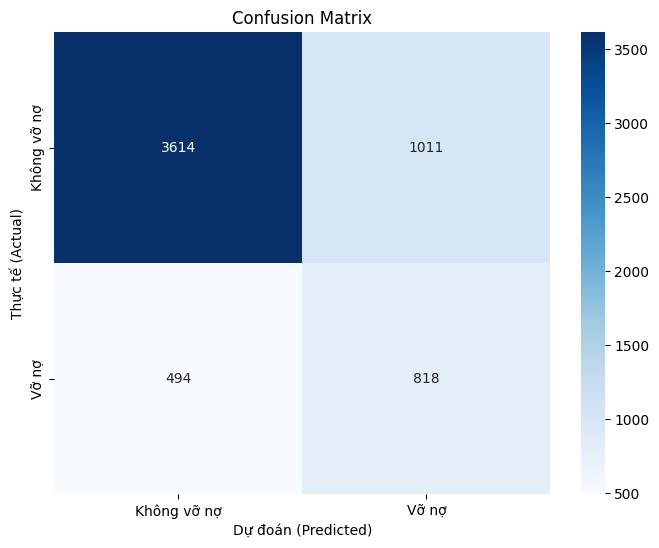

In [ ]:
# Xây dựng pipeline Logistic Regression
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, class_weight= 'balanced')
)

# Định nghĩa không gian tham số (để tìm tổ hợp tốt - tối ưu hiệu suất mô hình)
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear']
}

# Thiết lập GridSearchCV
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Huấn luyện mô hình với GridSearch
grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# Đánh giá trên tập test
y_pred = best_model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f}")

# Báo cáo đánh giá chi tiết với tên lớp
print("\nBáo cáo đánh giá:")
print(classification_report(y_test, y_pred, target_names=['Không vỡ nợ', 'Vỡ nợ']))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Không vỡ nợ", "Vỡ nợ"],
            yticklabels=["Không vỡ nợ", "Vỡ nợ"])
plt.xlabel("Dự đoán (Predicted)")
plt.ylabel("Thực tế (Actual)")
plt.title("Confusion Matrix")
plt.show()

**Nhận xét mô hình:**

🔹 Precision
- Không vỡ nợ: 88% → phần lớn các cảnh báo "không vỡ nợ" là đúng.
- Vỡ nợ: 45% → tức là hơn 50% cảnh báo vỡ nợ là sai, có thể gây quá tải hệ thống kiểm soát rủi ro.

🔹 Recall (khả năng phát hiện đúng ca thực sự)
- Không vỡ nợ: 78%
- Vỡ nợ: 62% → phát hiện được ~64% khách hàng thực sự vỡ nợ, bỏ sót hơn 1/3 → rủi ro khá cao.

🔹 F1-Score (cân bằng giữa Precision và Recall)
- Không vỡ nợ: 0.83
- Vỡ nợ: 0.52 → hiệu suất chưa thực sự tốt ở nhóm vỡ nợ.

🔹 Macro F1-score: 0.67 → thể hiện mức độ trung bình của 2 lớp, chưa thực sự cân bằng.
🔹 Weighted F1-score: 0.76 → bị ảnh hưởng bởi lớp "Không vỡ nợ" (có số lượng lớn hơn).



##**2. Random Forest**

In [ ]:
# Kích hoạt chế độ hiển thị biểu đồ
%matplotlib inline

# Import thư viện matplotlib
import matplotlib as mpl

# Thiết lập độ phân giải của hình vẽ (DPI = dots per inch) để hình ảnh sắc nét hơn
mpl.rcParams['figure.dpi'] = 400

In [ ]:
# Khởi tạo mô hình Random Forest Classifier với các tham số tùy chỉnh
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(
    n_estimators=10,                # Số lượng cây quyết định trong rừng (forest)
    criterion='gini',              # Hàm đánh giá độ phân chia: chỉ số Gini
    max_depth=3,                   # Chiều sâu tối đa của mỗi cây (hạn chế overfitting)
    min_samples_split=2,          # Số lượng mẫu tối thiểu để chia một node
    min_samples_leaf=1,           # Số lượng mẫu tối thiểu ở một lá (leaf)
    min_weight_fraction_leaf=0.0, # Tỷ lệ trọng số tối thiểu yêu cầu ở một lá (ít dùng, mặc định là 0)
    max_features='sqrt',          # Số đặc trưng được chọn khi tìm split tốt nhất ('sqrt' = căn bậc hai của số đặc trưng)
    max_leaf_nodes=None,          # Không giới hạn số lượng lá (nếu cần có thể đặt giới hạn)
    min_impurity_decrease=0.0,    # Một node chỉ được tách nếu mức giảm impurity lớn hơn giá trị này
    bootstrap=True,               # Có dùng bootstrap sampling để huấn luyện mỗi cây hay không
    oob_score=False,              # Có dùng dữ liệu "Out-of-Bag" để đánh giá mô hình hay không
    n_jobs=None,                  # Số lượng lõi CPU dùng cho huấn luyện (None = 1 lõi, -1 = tất cả lõi)
    random_state=None,            # Không cố định seed -> kết quả mô hình có thể khác nhau mỗi lần chạy
    verbose=0,                    # Mức độ hiện thông tin trong quá trình huấn luyện (0 = im lặng)
    warm_start=False,             # False = luôn huấn luyện lại từ đầu khi gọi fit()
    class_weight='balanced'       # Tự động cân bằng trọng số giữa các lớp (rất hữu ích khi dữ liệu mất cân bằng)
)

In [ ]:
#Khởi tạo lưới tham số cho quá trình tìm mô hình tối ưu
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [ ]:
cv_rf_ex = GridSearchCV(
    rf,                         # Mô hình Random Forest cần tối ưu
    param_grid=rf_params_ex,    # Lưới tham số
    scoring='roc_auc',          # Dùng AUC (Area Under ROC Curve) để đánh giá hiệu suất
    n_jobs=None,                # Số luồng CPU dùng song song (None = chỉ 1 luồng)
    refit=True,                 # Sau khi tìm được mô hình tốt nhất, sẽ fit lại toàn bộ dữ liệu
    cv=4,                       # Số lần chia dữ liệu cross-validation = 4-fold
    verbose=1,                  # Mức độ hiển thị log (1 = in thông tin cơ bản)
    pre_dispatch='2*n_jobs',    # Số lượng tác vụ được gửi song song (dùng mặc định)
    error_score=np.nan,         # Nếu có lỗi trong quá trình train, sẽ trả về NaN thay vì dừng
    return_train_score=True     # Trả về cả điểm train để phân tích overfitting nếu cần
)


In [ ]:
#Huấn luyện mô hình Random Forest với GridSearchCV trên tập huấn luyện X_train và y_train.
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, n_estimators=10),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Chuyển kết quả huấn luyện GridSearchCV thành DataFrame
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [ ]:
cv_rf_ex_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.102416      0.018575         0.009013        0.001768   
1       0.151764      0.003146         0.010248        0.000068   
2       0.228766      0.005485         0.013244        0.001047   
3       0.304731      0.008675         0.015750        0.001672   
4       0.375600      0.004956         0.019161        0.002319   
5       0.446345      0.015023         0.020890        0.001058   
6       0.521916      0.003336         0.023899        0.001289   
7       0.851446      0.058426         0.034378        0.003020   
8       0.697764      0.081394         0.027521        0.000473   
9       0.738069      0.017779         0.031029        0.001471   

   param_n_estimators                 params  split0_test_score  \
0                  10   {'n_estimators': 10}           0.761725   
1                  20   {'n_estimators': 20}           0.764955   
2                  30   {'n_estimators': 30}           0.763943   
3                  40   {'n_estimators': 40}           0.764384   
4                  50   {'n_estimators': 50}           0.764225   
5                  60   {'n_estimators': 60}           0.764471   
6                  70   {'n_estimators': 70}           0.764402   
7                  80   {'n_estimators': 80}           0.764614   
8                  90   {'n_estimators': 90}           0.765098   
9                 100  {'n_estimators': 100}           0.764925   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.760797           0.755370           0.769803         0.761924   
1           0.763583           0.760890           0.766857         0.764071   
2           0.760481           0.760900           0.769463         0.763697   
3           0.763010           0.760075           0.771272         0.764685   
4           0.761405           0.759492           0.771668         0.764197   
5           0.763607           0.760905           0.771191         0.765044   
6           0.763011           0.760863           0.771003         0.764820   
7           0.761810           0.761234           0.771538         0.764799   
8           0.761776           0.760068           0.771567         0.764627   
9           0.763745           0.760374           0.771738         0.765195   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005156               10            0.765086            0.767299   
1        0.002174                8            0.768409            0.770092   
2        0.003587                9            0.766611            0.767763   
3        0.004109                5            0.767345            0.767210   
4        0.004630                7            0.766917            0.767967   
5        0.003785                2            0.768090            0.767809   
6        0.003786                3            0.767989            0.768217   
7        0.004095                4            0.767615            0.768135   
8        0.004396                6            0.767945            0.768209   
9        0.004130                1            0.767969            0.768655   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.763977            0.761976          0.764584         0.001923  
1            0.767958            0.761380          0.766959         0.003318  
2            0.768848            0.763036          0.766564         0.002185  
3            0.768455            0.765065          0.767019         0.001227  
4            0.767443            0.764811          0.766785         0.001198  
5            0.768348            0.764495          0.767186         0.001565  
6            0.768767            0.764636          0.767402         0.001622  
7            0.768872            0.764694          0.767329         0.001586  
8            0.768866            0.764980          0.767500         0.001493  
9       

In [ ]:
# Lấy giá trị max của các cột trong data frame ngoại từ params
cv_rf_ex_results_df.drop(columns=['params']).max()

mean_fit_time           0.851446
std_fit_time            0.081394
mean_score_time         0.034378
std_score_time          0.003020
param_n_estimators    100.000000
split0_test_score       0.765098
split1_test_score       0.763745
split2_test_score       0.761234
split3_test_score       0.771738
mean_test_score         0.765195
std_test_score          0.005156
rank_test_score        10.000000
split0_train_score      0.768409
split1_train_score      0.770092
split2_train_score      0.768872
split3_train_score      0.765065
mean_train_score        0.767538
std_train_score         0.003318
dtype: float64

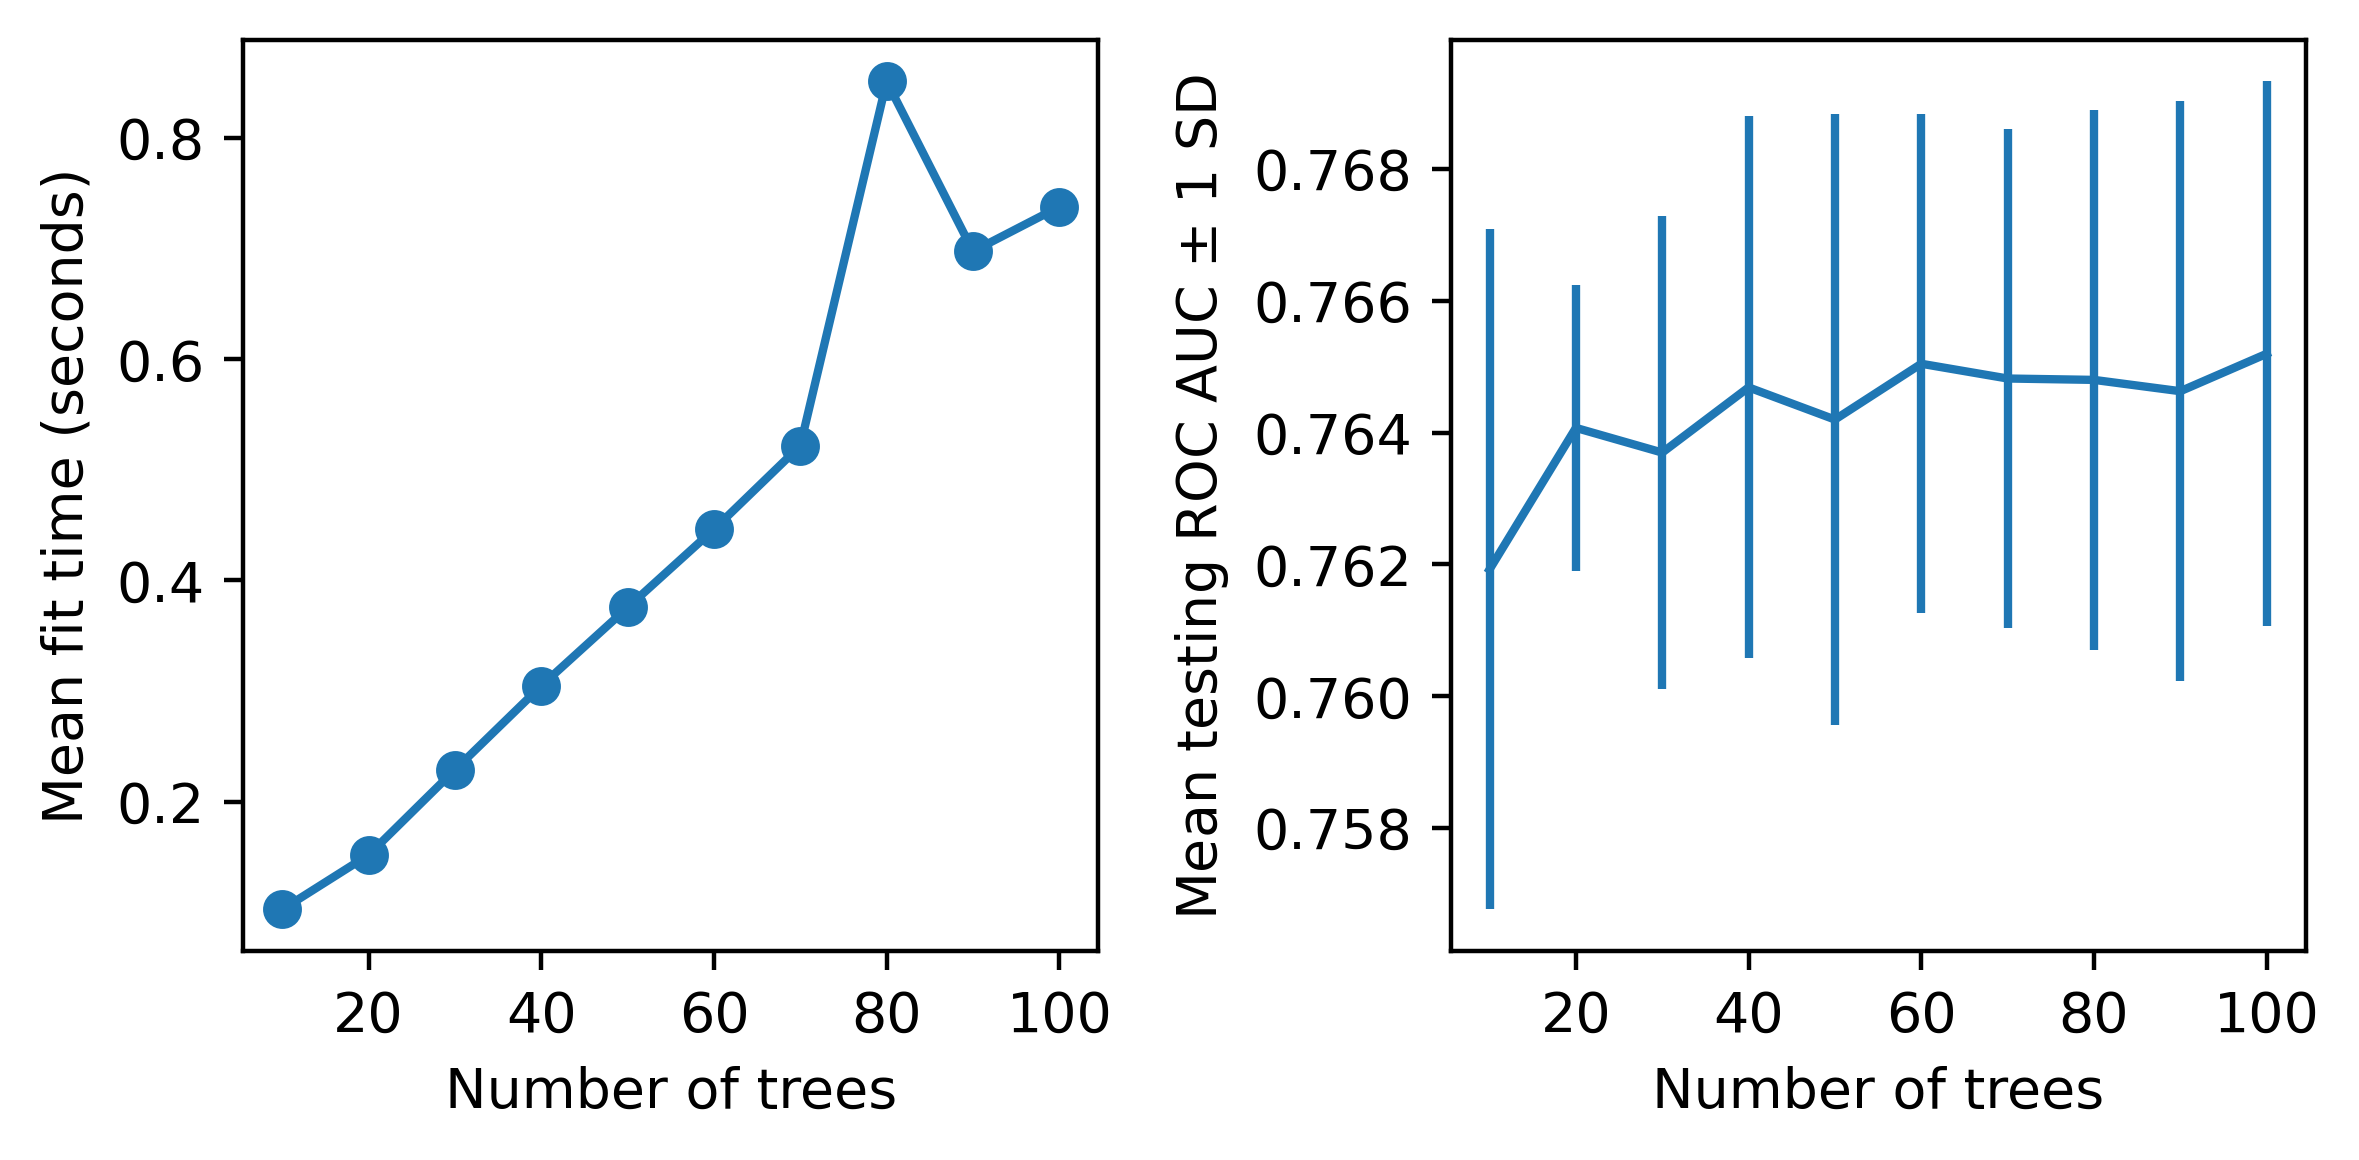

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

#Biểu đồ 1: Thời gian huấn luyện trung bình theo số lượng cây (n_estimators)
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

#Biểu đồ 2: AUC trung bình và độ lệch chuẩn theo số lượng cây
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [ ]:
# Lấy tham số tốt nhất tìm được trong quá trình GridSearchCV
cv_rf_ex.best_params_

{'n_estimators': 100}

In [ ]:
# Tạo DataFrame chứa tên các đặc trưng và mức độ quan trọng (feature importance)

feat_imp_df = pd.DataFrame({
    'Feature name':X.columns,
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

In [ ]:
# Sắp xếp mức độ quan trọng giảm dần
feat_imp_df.sort_values('Importance', ascending=False)

Feature name  Importance
10    RECENCY_WEIGHTED_DELAY    0.263803
6                  MAX_DELAY    0.248976
5                 COUNT_LATE    0.219414
7                      PAY_1    0.157159
8              TOTAL_PAYMENT    0.073327
9              LIMIT_BAL_LOG    0.016624
0            no_payment_flag    0.008009
1   late_but_no_balance_flag    0.005217
2               overpay_flag    0.004314
4                  EDUCATION    0.001966
3        credit_balance_flag    0.001193

In [ ]:
# Tạo một lưới điểm trong không gian 2 chiều với tọa độ từ 0 đến 4 theo cả hai chiều x và y

xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [ ]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

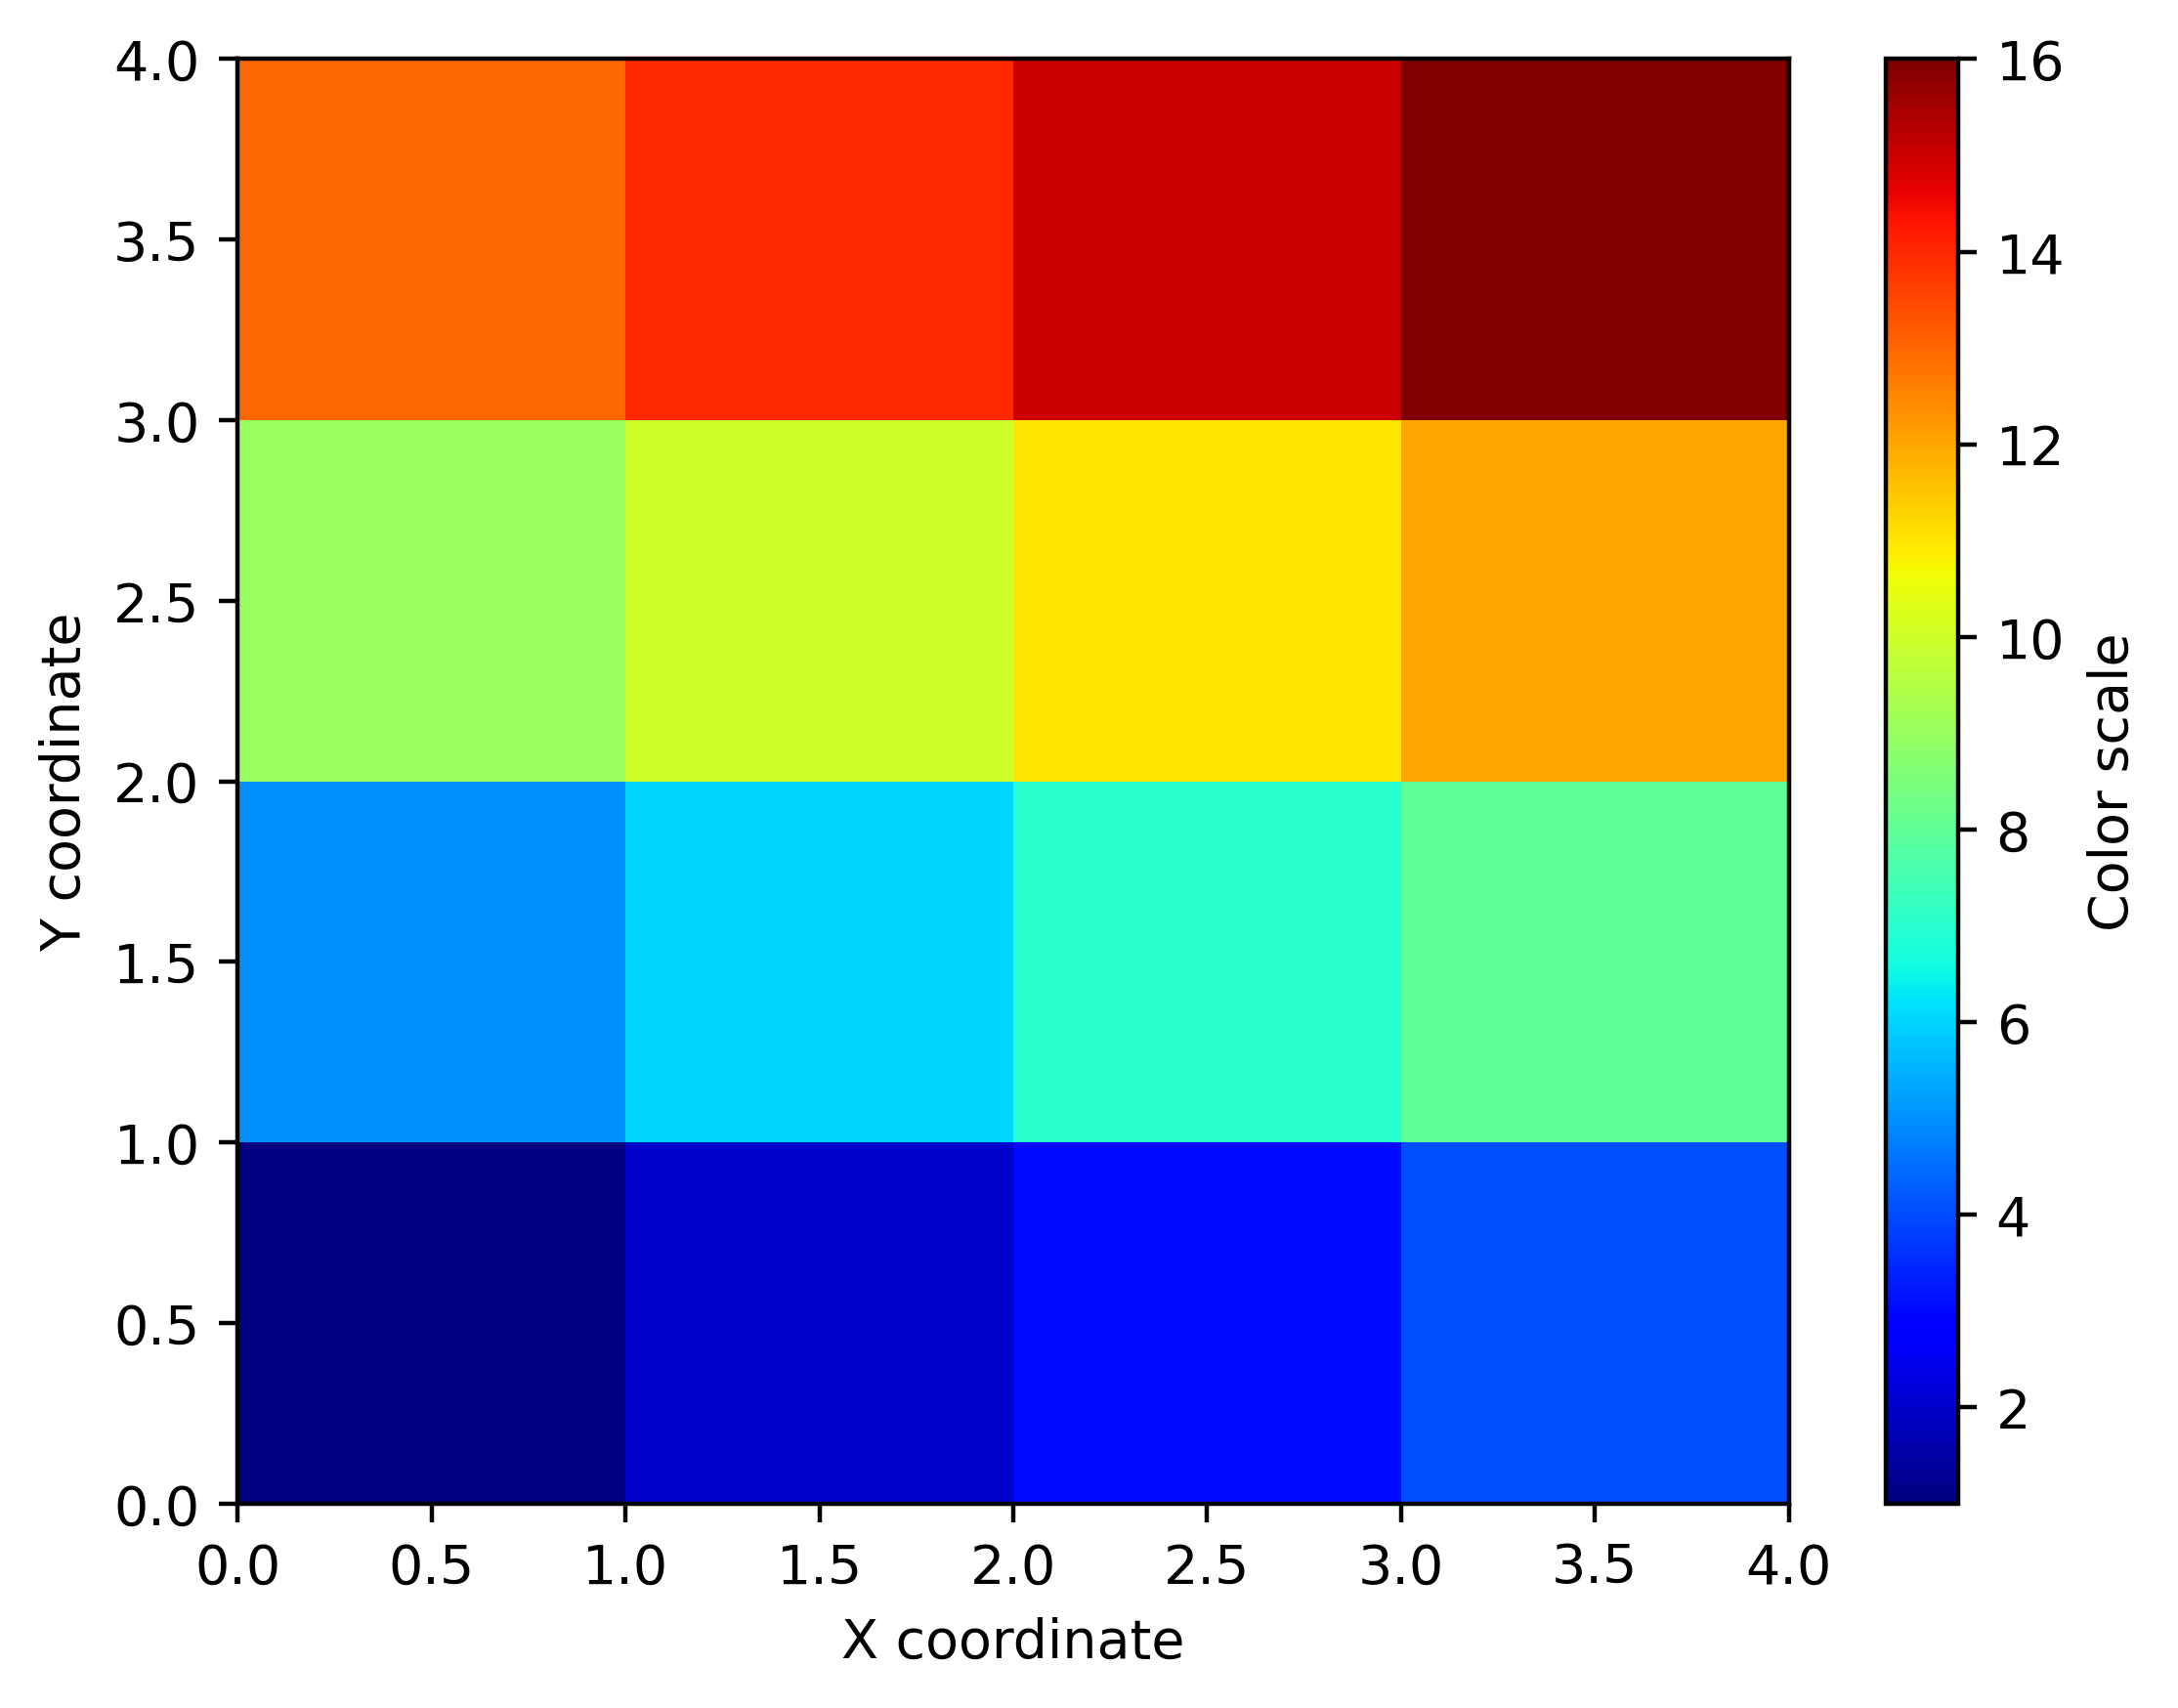

In [ ]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

Cross-Validation Grid Search with Random Forest

In [ ]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [ ]:
# Tạo đối tượng GridSearchCV để tìm kiếm tham số tối ưu cho mô hình Random Forest
cv_rf = GridSearchCV(
    rf,                      # Mô hình Random Forest ban đầu
    param_grid=rf_params,    # Lưới tham số cần thử nghiệm (dictionary)
    scoring='roc_auc',       # Tiêu chí đánh giá là ROC AUC (thích hợp cho bài toán phân lớp nhị phân)
    n_jobs=-1,               # Sử dụng tất cả các CPU khả dụng để tăng tốc quá trình huấn luyện
    refit=True,              # Tự động huấn luyện lại mô hình tốt nhất trên toàn bộ dữ liệu khi tìm xong tham số
    cv=4,                    # Sử dụng 4-fold cross-validation để đánh giá mô hình
    verbose=2,               # Hiển thị chi tiết tiến trình tìm kiếm tham số
    error_score=np.nan,      # Nếu có lỗi xảy ra khi huấn luyện một mô hình con, trả về NaN thay vì lỗi
    return_train_score=True  # Trả về điểm số trên tập train để so sánh với điểm trên tập validation
)


In [ ]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, n_estimators=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [ ]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.131932      0.004590         0.010927        0.000224   
1        0.564119      0.011637         0.025993        0.001620   
2        1.887043      0.171850         0.082384        0.012363   
3        2.431768      0.204427         0.087143        0.011330   
4        0.177954      0.015819         0.012365        0.000124   
5        0.797083      0.023132         0.032817        0.000577   
6        1.649054      0.022194         0.080601        0.023272   
7        4.091960      0.976344         0.111005        0.001380   
8        0.229125      0.015930         0.014698        0.000710   
9        1.046494      0.016889         0.042587        0.001119   
10       2.779738      0.698223         0.101204        0.035036   
11       4.327102      0.258389         0.151732        0.004981   
12       0.267278      0.011619         0.016886        0.000166   
13       1.897353      0.399472         0.102276        0.017027   
14       2.787248      0.257521         0.105710        0.008609   
15       5.884036      0.673415         0.226851        0.033401   

    param_max_depth  param_n_estimators  \
0                 3                  10   
1                 3                  50   
2                 3                 100   
3                 3                 200   
4                 6                  10   
5                 6                  50   
6                 6                 100   
7                 6                 200   
8                 9                  10   
9                 9                  50   
10                9                 100   
11                9                 200   
12               12                  10   
13               12                  50   
14               12                 100   
15               12                 200   

                                    params  split0_test_score  \
0     {'max_depth': 3, 'n_estimators': 10}           0.764035   
1     {'max_depth': 3, 'n_estimators': 50}           0.762554   
2    {'max_depth': 3, 'n_estimators': 100}           0.764585   
3    {'max_depth': 3, 'n_estimators': 200}           0.764996   
4     {'max_depth': 6, 'n_estimators': 10}           0.770159   
5     {'max_depth': 6, 'n_estimators': 50}           0.771731   
6    {'max_depth': 6, 'n_estimators': 100}           0.771692   
7    {'max_depth': 6, 'n_estimators': 200}           0.772743   
8     {'max_depth': 9, 'n_estimators': 10}           0.767047   
9     {'max_depth': 9, 'n_estimators': 50}           0.772244   
10   {'max_depth': 9, 'n_estimators': 100}           0.772693   
11   {'max_depth': 9, 'n_estimators': 200}           0.773131   
12   {'max_depth': 12, 'n_estimators': 10}           0.749600   
13   {'max_depth': 12, 'n_estimators': 50}           0.764054   
14  {'max_depth': 12, 'n_estimators': 100}           0.765850   
15  {'max_depth': 12, 'n_estimators': 200}           0.765813   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.758856           0.760303           0.771192         0.763597   
1            0.762599           0.760359           0.769497         0.763753   
2            0.763068           0.760659           0.771694         0.765002   
3            0.762079           0.760906           0.771230         0.764803   
4            0.766146           0.765168           0.774377         0.768962   
5            0.767574           0.766740           0.778856         0.771225   
6            0.767345           0.768100           0.778587         0.771431   
7            0.767040           0.767359           0.779110         0.771563   
8            0.761816           0.758543           0.767184         0.763648   
9            0.766573           0.764652           0.777276         0.770186   
10           0.768230           0.765583           0.777843         0.771088   
11           0.768194           0.766579         

In [ ]:
cv_rf_results_df.drop(columns=['params']).max()

mean_fit_time           5.884036
std_fit_time            0.976344
mean_score_time         0.226851
std_score_time          0.035036
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.773131
split1_test_score       0.768230
split2_test_score       0.768100
split3_test_score       0.779110
mean_test_score         0.771588
std_test_score          0.005578
rank_test_score        16.000000
split0_train_score      0.894392
split1_train_score      0.890890
split2_train_score      0.890986
split3_train_score      0.888956
mean_train_score        0.890769
std_train_score         0.003335
dtype: float64

In [ ]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

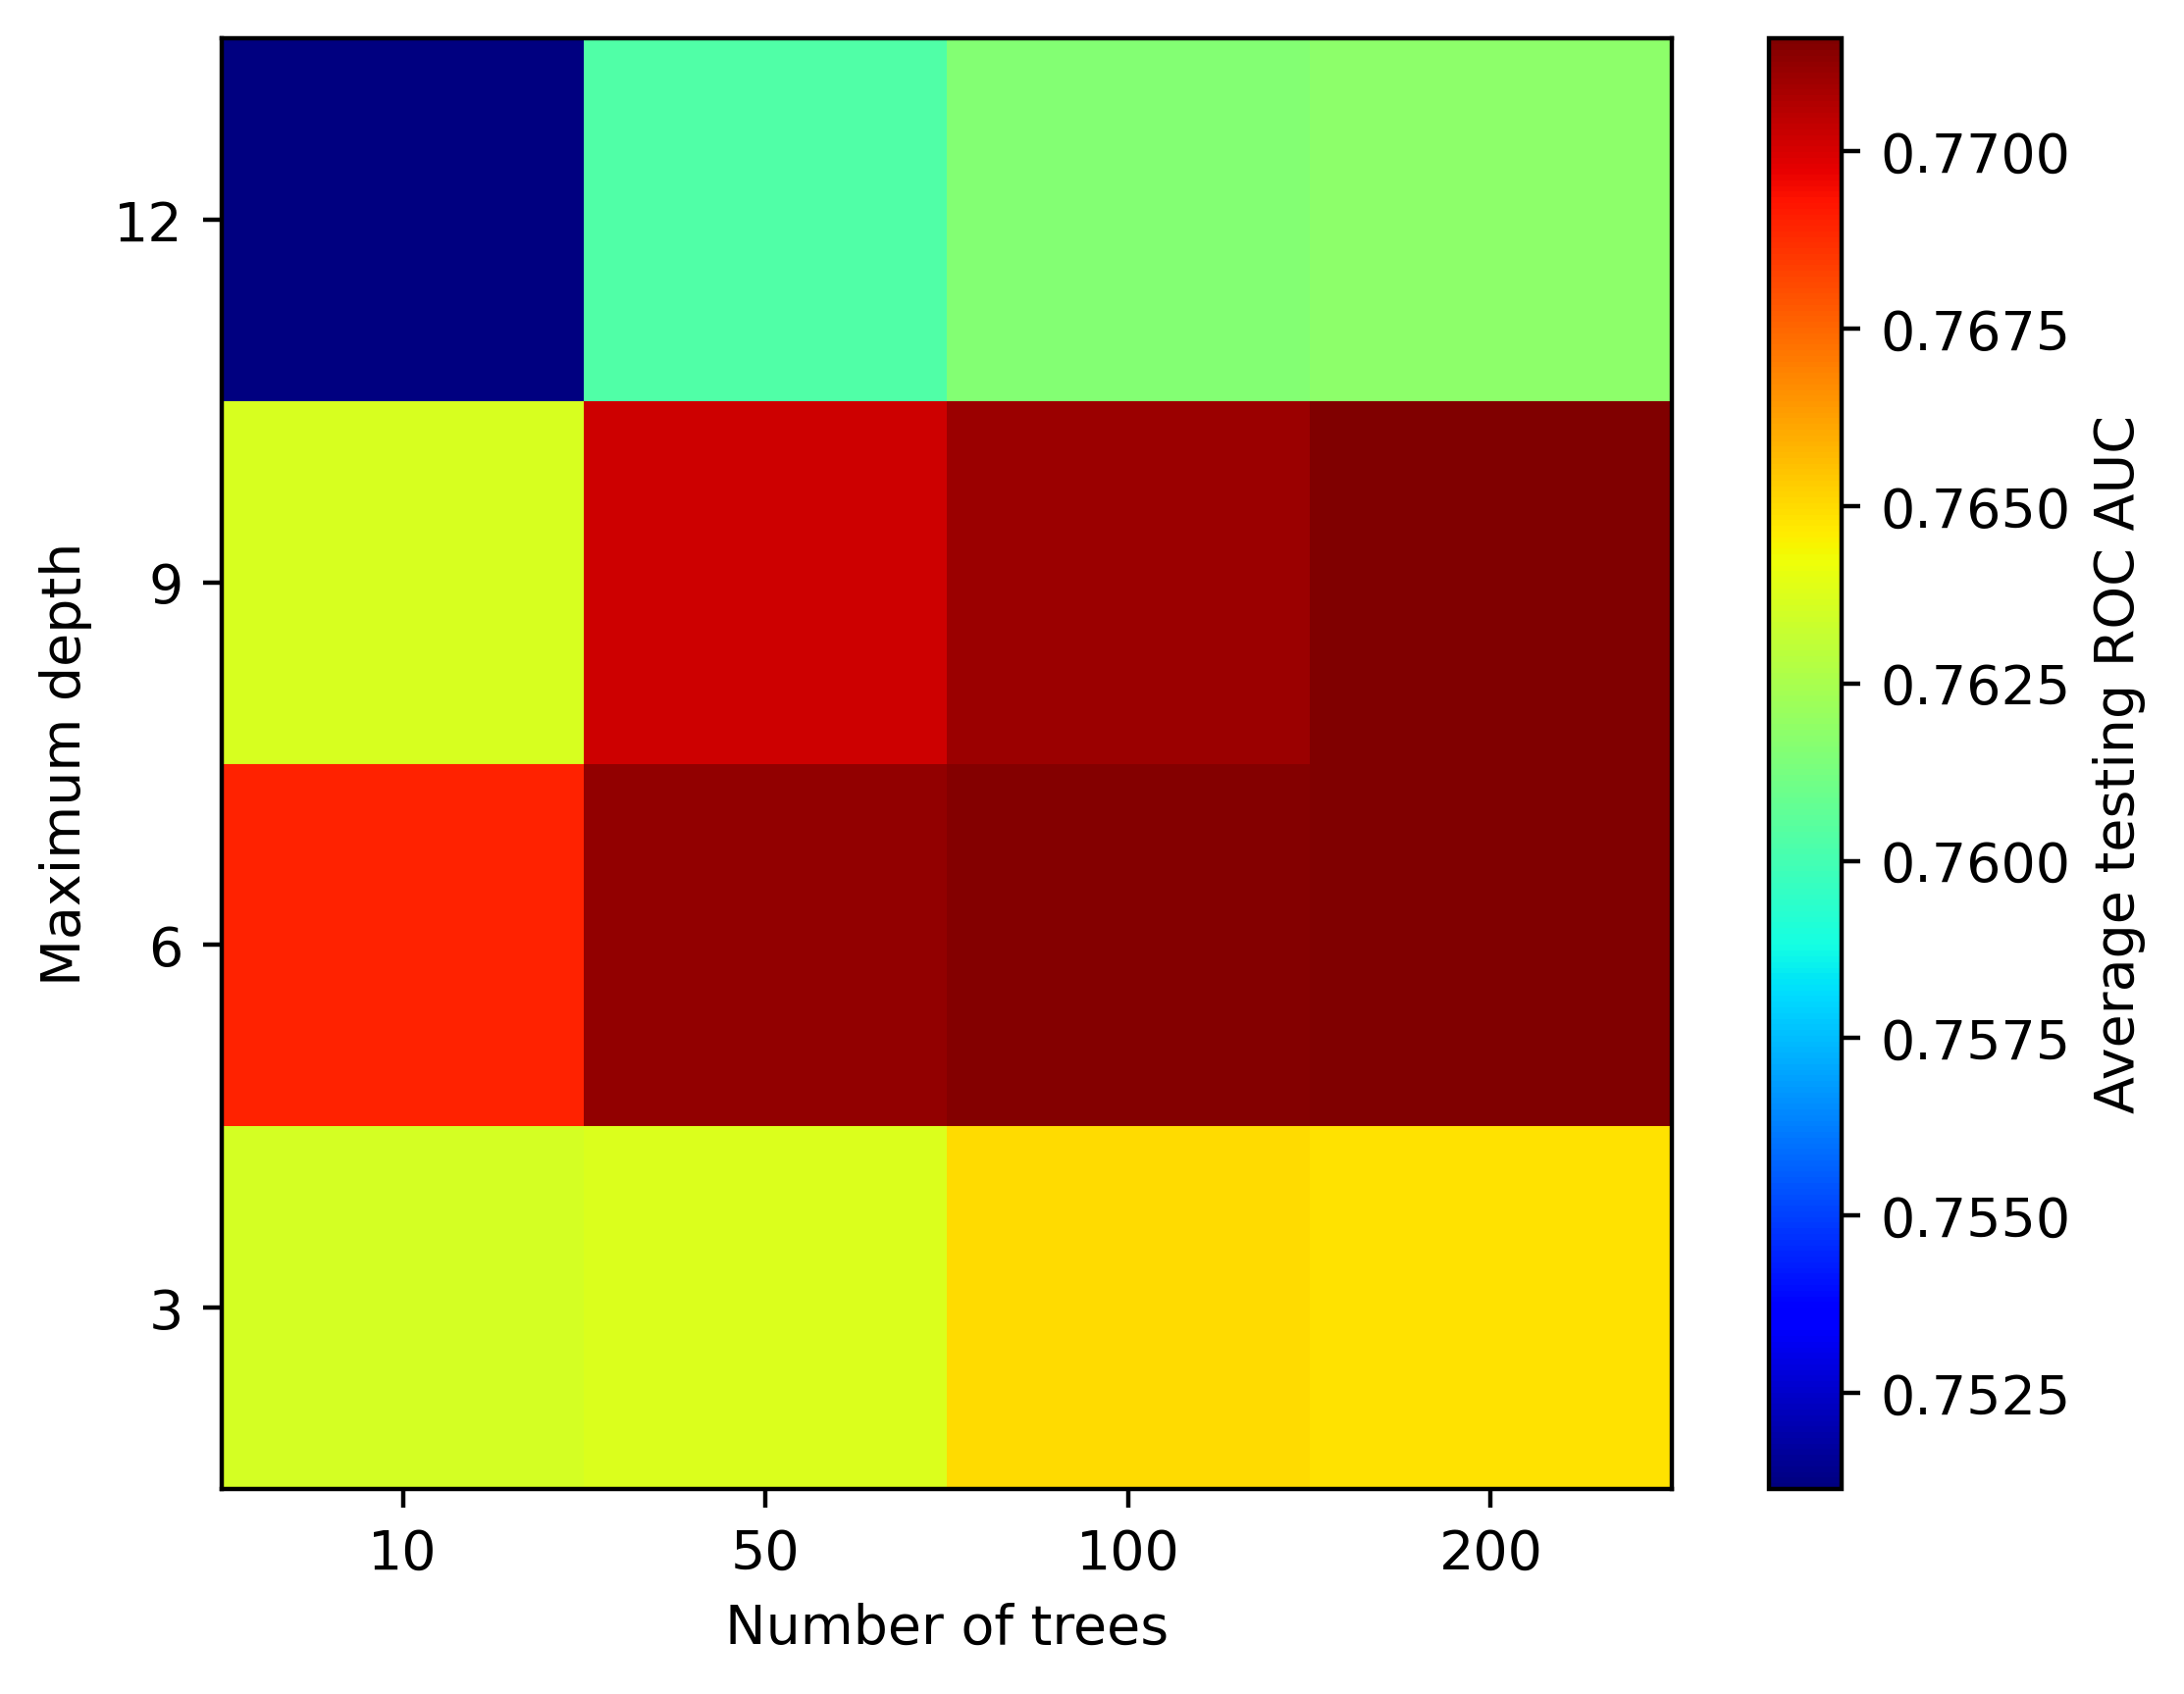

In [ ]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

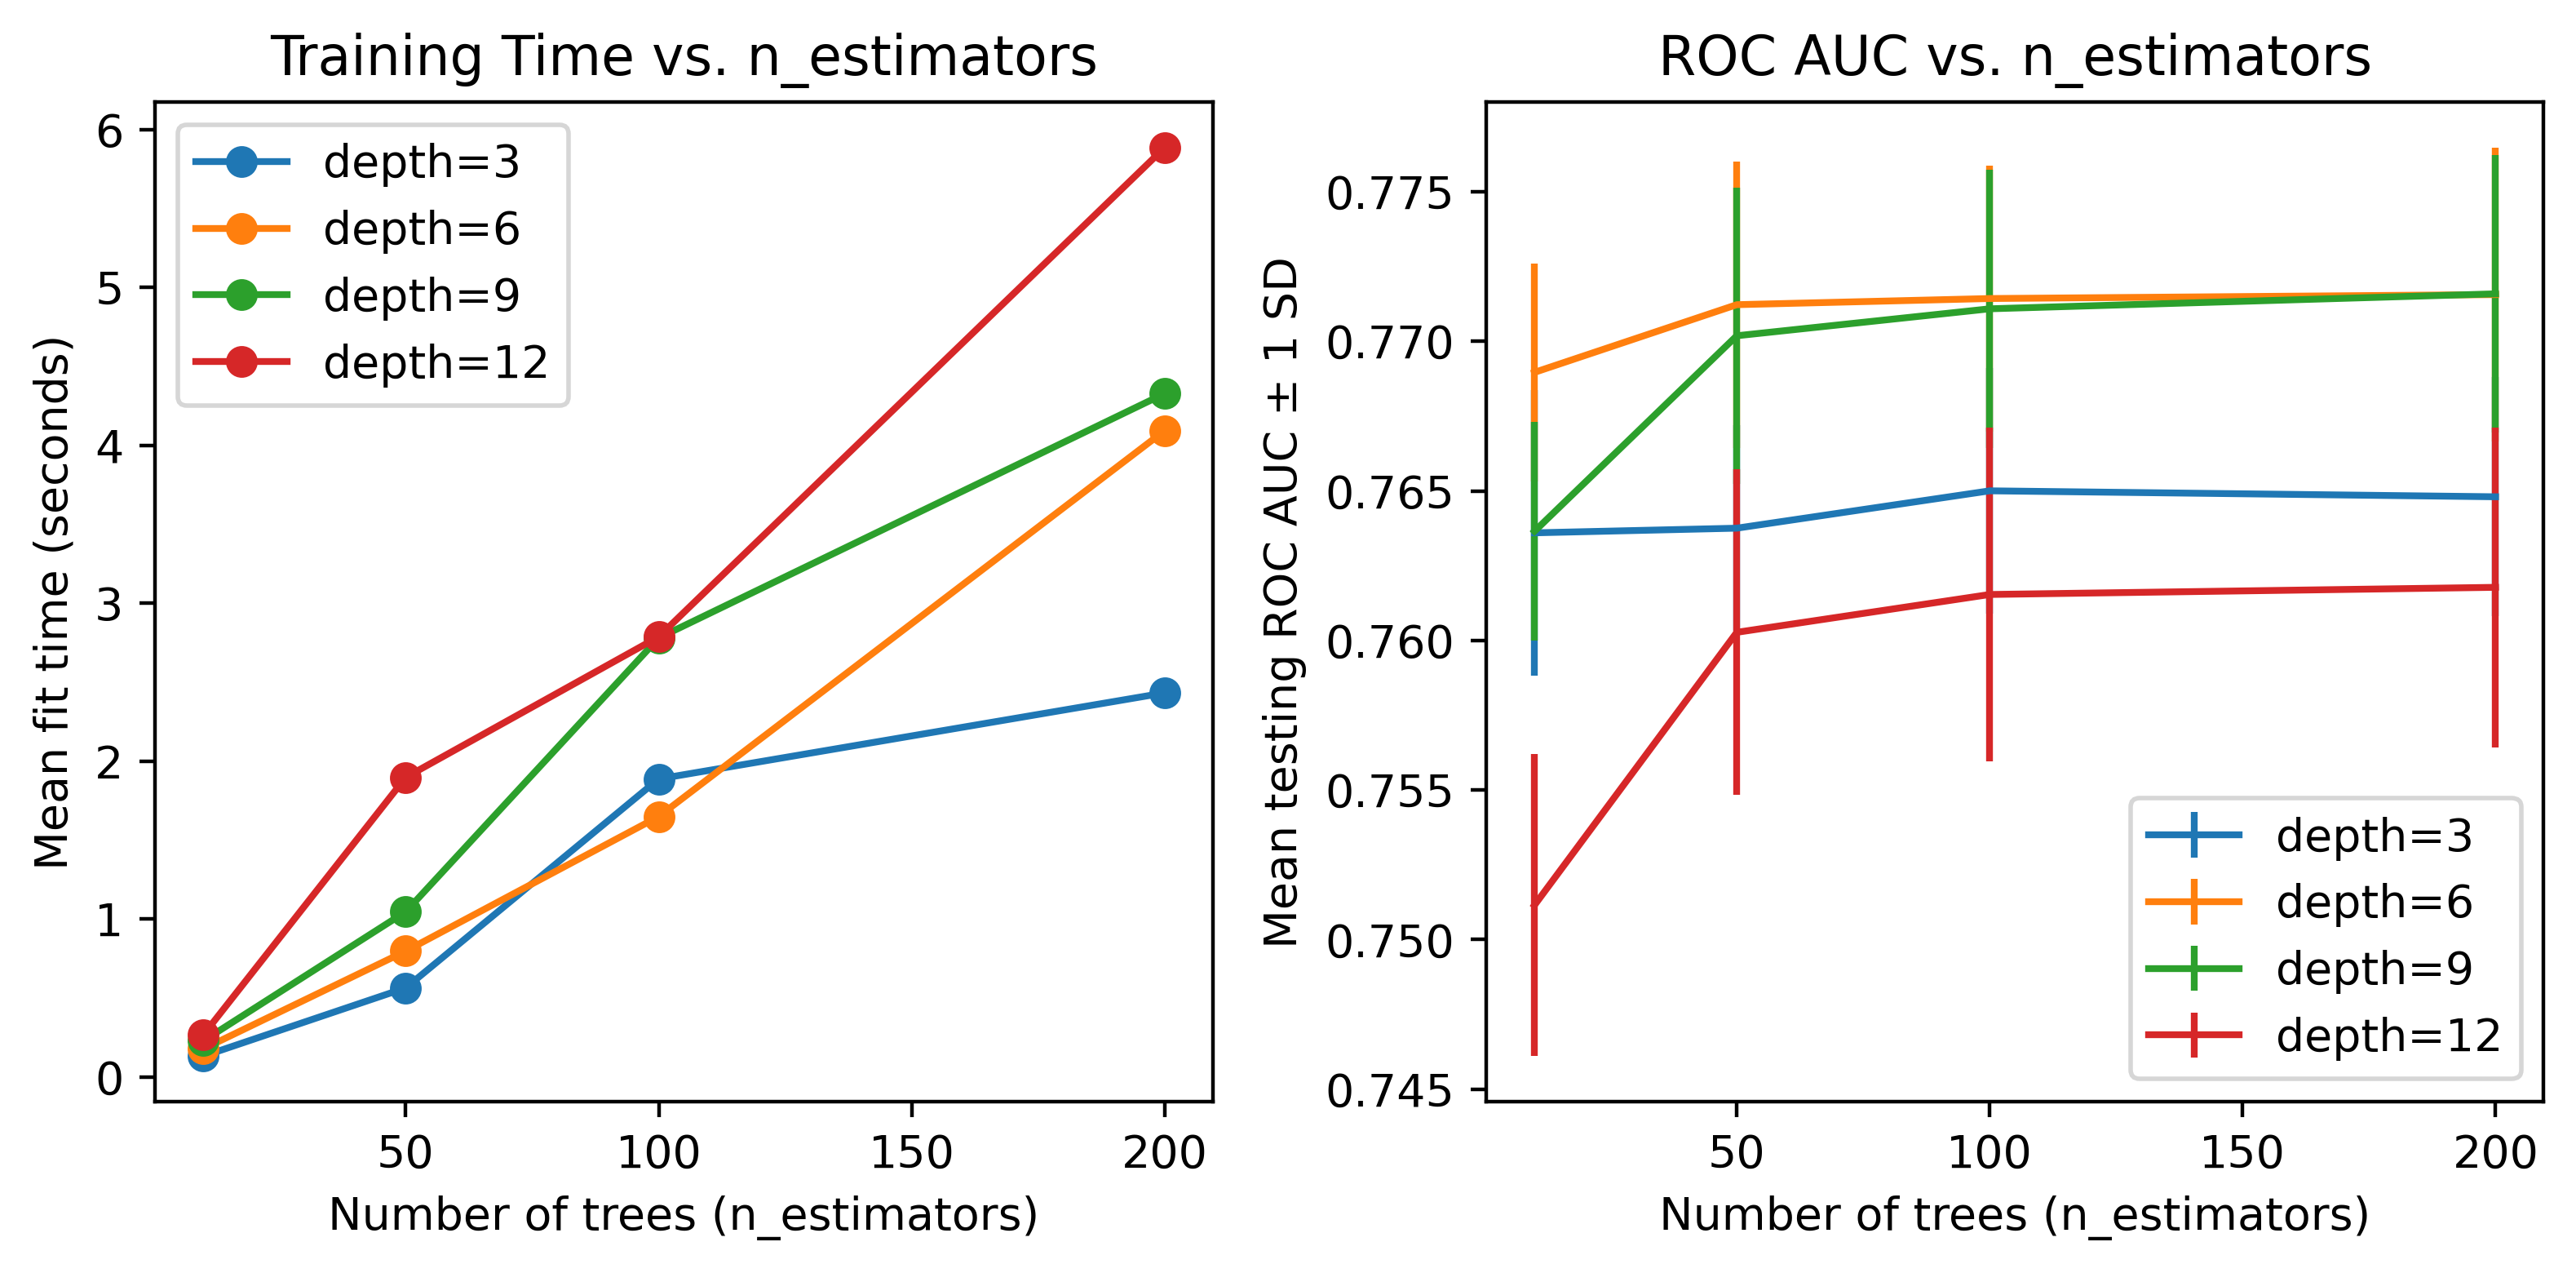

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Vì bạn có nhiều max_depth, cần vẽ riêng từng đường
for depth in sorted(cv_rf_results_df['param_max_depth'].unique()):
    subset = cv_rf_results_df[cv_rf_results_df['param_max_depth'] == depth]
    axs[0].plot(subset['param_n_estimators'], subset['mean_fit_time'], '-o', label=f'depth={depth}')
    axs[1].errorbar(subset['param_n_estimators'], subset['mean_test_score'],
                    yerr=subset['std_test_score'], label=f'depth={depth}')

# Trục trái: thời gian huấn luyện
axs[0].set_xlabel('Number of trees (n_estimators)')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].legend()
axs[0].set_title("Training Time vs. n_estimators")

# Trục phải: ROC AUC + độ lệch chuẩn
axs[1].set_xlabel('Number of trees (n_estimators)')
axs[1].set_ylabel('Mean testing ROC AUC ± 1 SD')
axs[1].legend()
axs[1].set_title("ROC AUC vs. n_estimators")

plt.tight_layout()
plt.show()

In [ ]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [ ]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features,
    'Importance':cv_rf.best_estimator_.feature_importances_
})

In [ ]:
feat_imp_df_act.sort_values('Importance', ascending=False)

Feature name  Importance
10    RECENCY_WEIGHTED_DELAY    0.227550
6                  MAX_DELAY    0.168335
7                      PAY_1    0.168220
5                 COUNT_LATE    0.157417
8              TOTAL_PAYMENT    0.136991
9              LIMIT_BAL_LOG    0.081975
4                  EDUCATION    0.023088
0            no_payment_flag    0.014567
2               overpay_flag    0.010430
1   late_but_no_balance_flag    0.006165
3        credit_balance_flag    0.005262


Độ chính xác (Accuracy): 0.7780

Báo cáo đánh giá:
              precision    recall  f1-score   support

 Không vỡ nợ       0.88      0.83      0.85      4625
       Vỡ nợ       0.50      0.59      0.54      1312

    accuracy                           0.78      5937
   macro avg       0.69      0.71      0.70      5937
weighted avg       0.79      0.78      0.78      5937



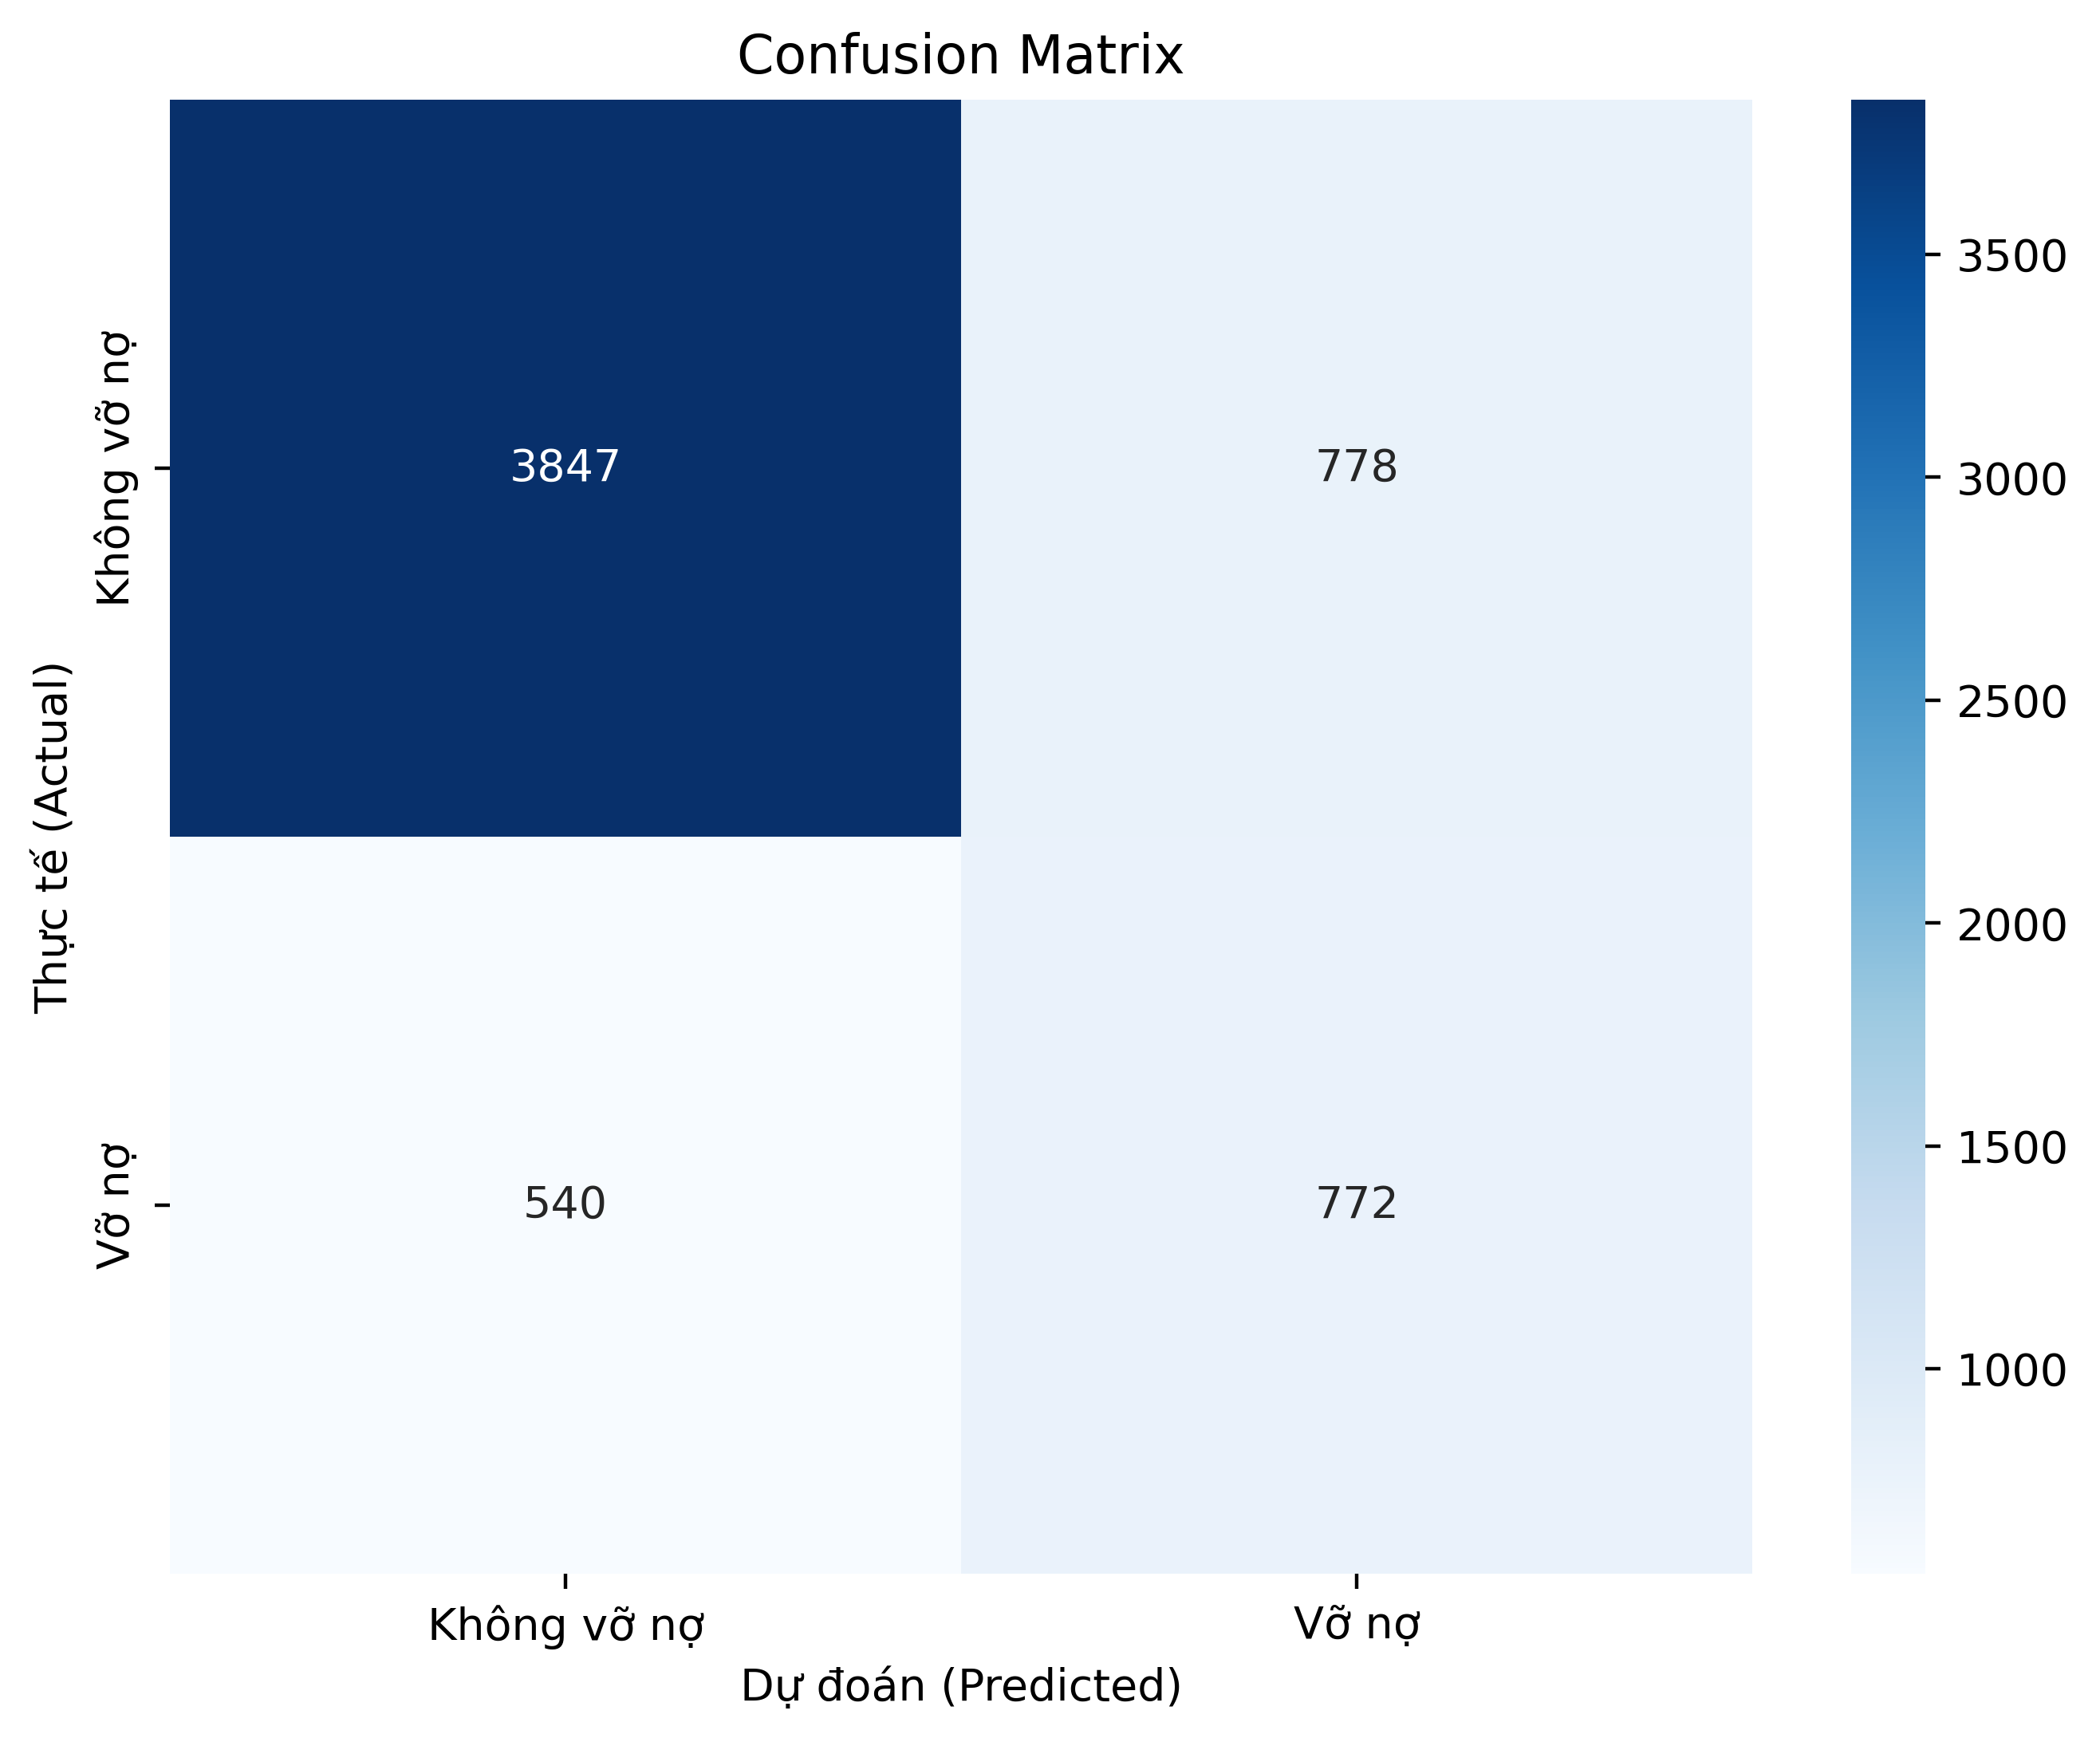

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy mô hình Random Forest tốt nhất từ GridSearchCV
best_rf = cv_rf.best_estimator_

# Dự đoán nhãn
y_pred = best_rf.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f}")

# Báo cáo đánh giá chi tiết với tên lớp
print("\nBáo cáo đánh giá:")
print(classification_report(y_test, y_pred, target_names=['Không vỡ nợ', 'Vỡ nợ']))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Không vỡ nợ", "Vỡ nợ"],
            yticklabels=["Không vỡ nợ", "Vỡ nợ"])
plt.xlabel("Dự đoán (Predicted)")
plt.ylabel("Thực tế (Actual)")
plt.title("Confusion Matrix")
plt.show()

** Nhận xét mô hình: **

🔹 Precision
- Không vỡ nợ: 88% → phần lớn các cảnh báo "không vỡ nợ" là đúng.
- Vỡ nợ: 48% → tức là gần 50% cảnh báo vỡ nợ là sai, có thể gây quá tải hệ thống kiểm soát rủi ro.

🔹 Recall (khả năng phát hiện đúng ca thực sự)
- Không vỡ nợ: 82%
- Vỡ nợ: 61% → phát hiện được ~62% khách hàng thực sự vỡ nợ, bỏ sót gần 40% → rủi ro vẫn còn khá cao.

🔹 F1-Score (cân bằng giữa Precision và Recall)
- Không vỡ nợ: 0.85
- Vỡ nợ: 0.54 → hiệu suất chưa thực sự tốt ở nhóm vỡ nợ, cần cải thiện thêm.

🔹 Macro F1-score: 0.69 → thể hiện mức độ trung bình của 2 lớp, chưa thực sự cân bằng.
🔹 Weighted F1-score: 0.78 → bị ảnh hưởng bởi lớp "Không vỡ nợ" (số lượng lớn hơn).
"""

#🔬**4.B Cải thiện mô hình** (cải thiện dữ liệu đầu vào)
- Chọn lại các biến mới
- Chuẩn hoá các biến số (Dùng standardScaler) về dạng phân phối chuẩn tắc.
- Mã hoá (One-hot-encoding) cho biến phân loại
- Xử lý mất cân bằng dữ liệu bằng SMOTE sinh thêm dữ liệu mới cho lớp thiểu số bằng cách nội suy giữa các điểm dữ liệu hiện có.


In [ ]:
# Import thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve

In [ ]:

# ========= Chuẩn bị dữ liệu ============
features = [
    'no_payment_flag',
    'late_but_no_balance_flag',
    'EDUCATION',
    'COUNT_LATE',
    'MAX_DELAY',
    'PAY_1','PAY_2',
    'TOTAL_PAYMENT',
    'LIMIT_BAL_LOG',
    'RECENCY_WEIGHTED_DELAY',
    'SEX',
    'AGE',
    'MARRIAGE',
    'overpay_flag',
    'DEBT_TO_LIMIT_RATIO',
    'BILL_AMT5'
]

target = 'default payment next month'

X = df[features]
y = df[target]
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = [col for col in features if col not in categorical_features]

# Tiền xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Áp dụng SMOTE sau khi tiền xử lý
X_processed = preprocessor.fit_transform(X)


# Lấy tên các features sau khi mã hóa
# Đầu tiên, lấy tên các cột số
numeric_feature_names = numerical_features

# Tiếp theo, lấy tên các cột phân loại sau khi OneHotEncoder
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_features)

# Kết hợp tên các cột lại
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# In ra tất cả các features sau khi encoder
print("Features after preprocessing:")
print(all_feature_names)


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_processed, y)

# Chia tập train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# ======== Hàm đánh giá mô hình ================
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{'='*50}")
    print(f"ĐÁNH GIÁ MÔ HÌNH: {model_name}")
    print('='*50)
    print(classification_report(y_test, y_pred, target_names=['Không vỡ nợ', 'Vỡ nợ']))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Không vỡ nợ', 'Vỡ nợ'],
                yticklabels=['Không vỡ nợ', 'Vỡ nợ'])
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # AUC + ROC
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    print(f"AUC Score: {auc_score:.4f}")

    # Các chỉ số chi tiết
    metrics_df = pd.DataFrame({
        'Chỉ số': ['Độ chính xác (Accuracy)', 'Độ chính xác (Precision)',
                  'Độ bao phủ (Recall)', 'F1-Score', 'AUC-ROC'],
        'Giá trị': [
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            auc_score
        ],
        'Mô hình': model_name
    })

    return {
        'model_name': model_name,
        'metrics': metrics_df,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score,
        'y_pred_prob': y_pred_prob,
        'y_pred': y_pred
    }

results = []

Features after preprocessing:
['no_payment_flag', 'late_but_no_balance_flag', 'COUNT_LATE', 'MAX_DELAY', 'PAY_1', 'PAY_2', 'TOTAL_PAYMENT', 'LIMIT_BAL_LOG', 'RECENCY_WEIGHTED_DELAY', 'AGE', 'overpay_flag', 'DEBT_TO_LIMIT_RATIO', 'BILL_AMT5', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']


##**1. XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:30:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



ĐÁNH GIÁ MÔ HÌNH: XGBoost
              precision    recall  f1-score   support

 Không vỡ nợ       0.79      0.90      0.84      4676
       Vỡ nợ       0.88      0.76      0.82      4573

    accuracy                           0.83      9249
   macro avg       0.84      0.83      0.83      9249
weighted avg       0.84      0.83      0.83      9249



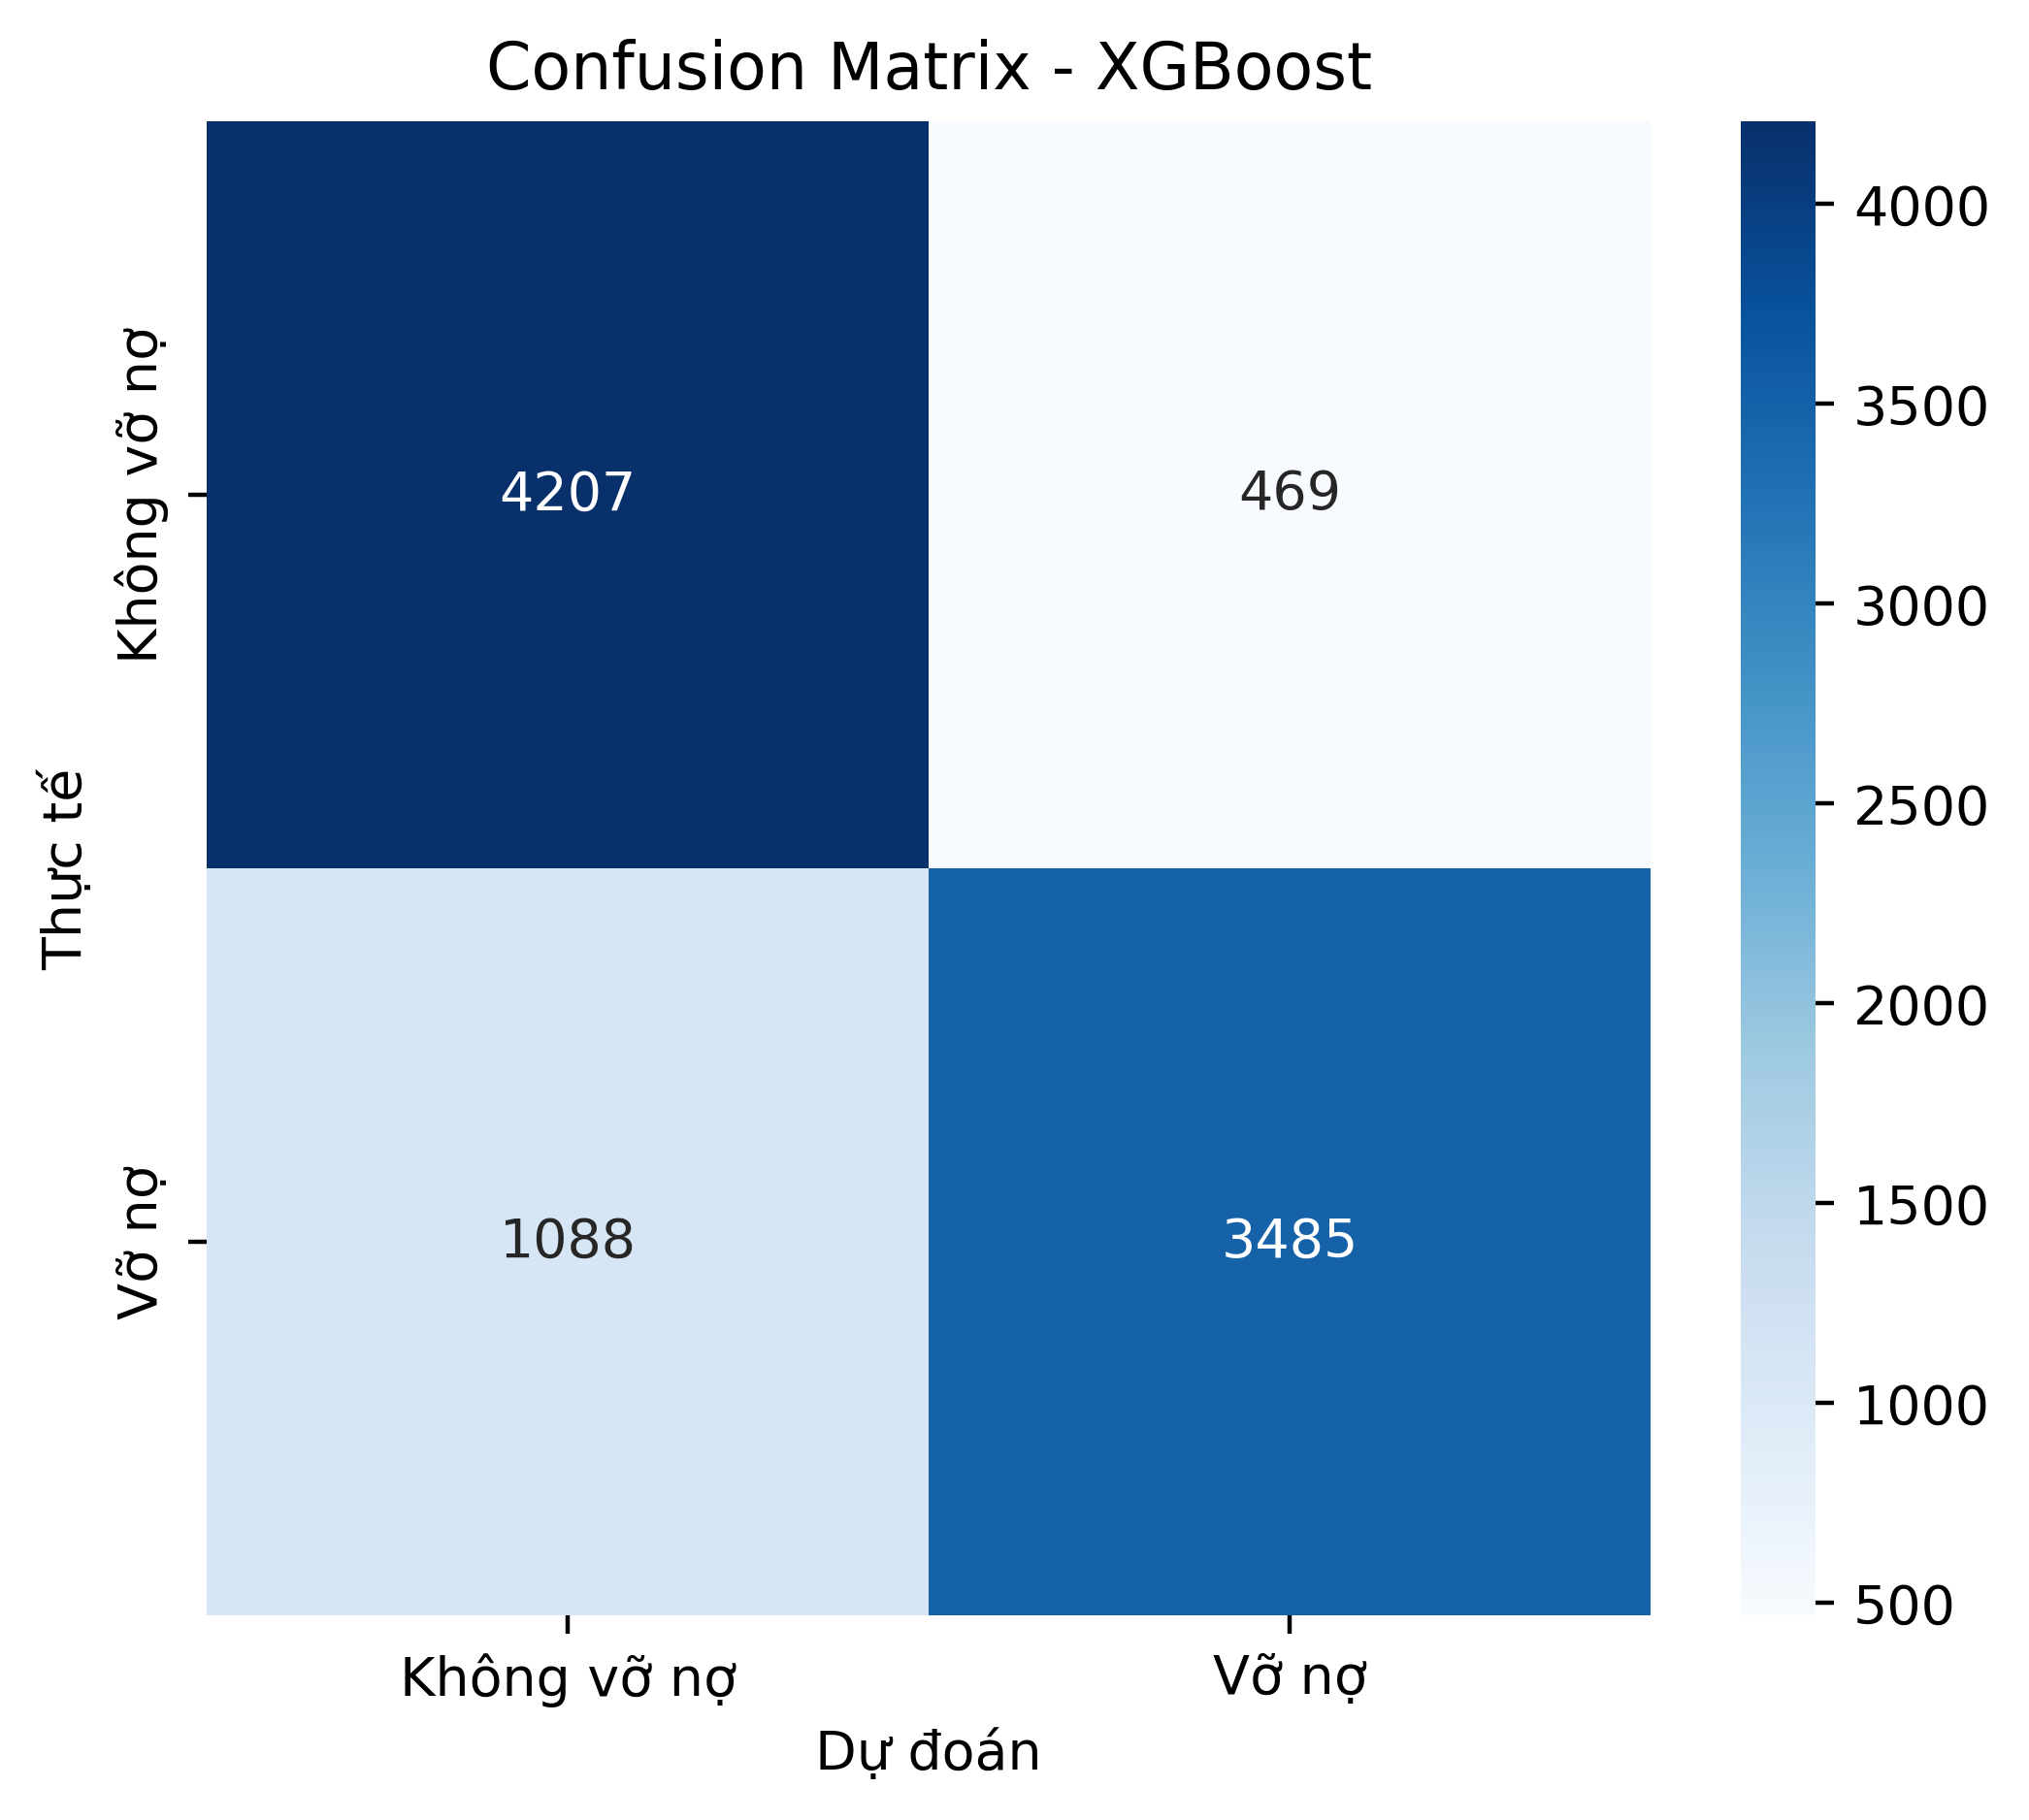

AUC Score: 0.9005


In [ ]:
# XG BOOST
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100
)

# Huấn luyện mô hình (nếu chưa train)
xgb_model.fit(X_train, y_train)

# Đánh giá
xgb_result = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
xgb_result['model'] = xgb_model
results.append(xgb_result)



##**2. Logistic regression**


ĐÁNH GIÁ MÔ HÌNH: Logistic Regression
              precision    recall  f1-score   support

 Không vỡ nợ       0.67      0.78      0.72      4676
       Vỡ nợ       0.73      0.61      0.67      4573

    accuracy                           0.70      9249
   macro avg       0.70      0.70      0.70      9249
weighted avg       0.70      0.70      0.70      9249



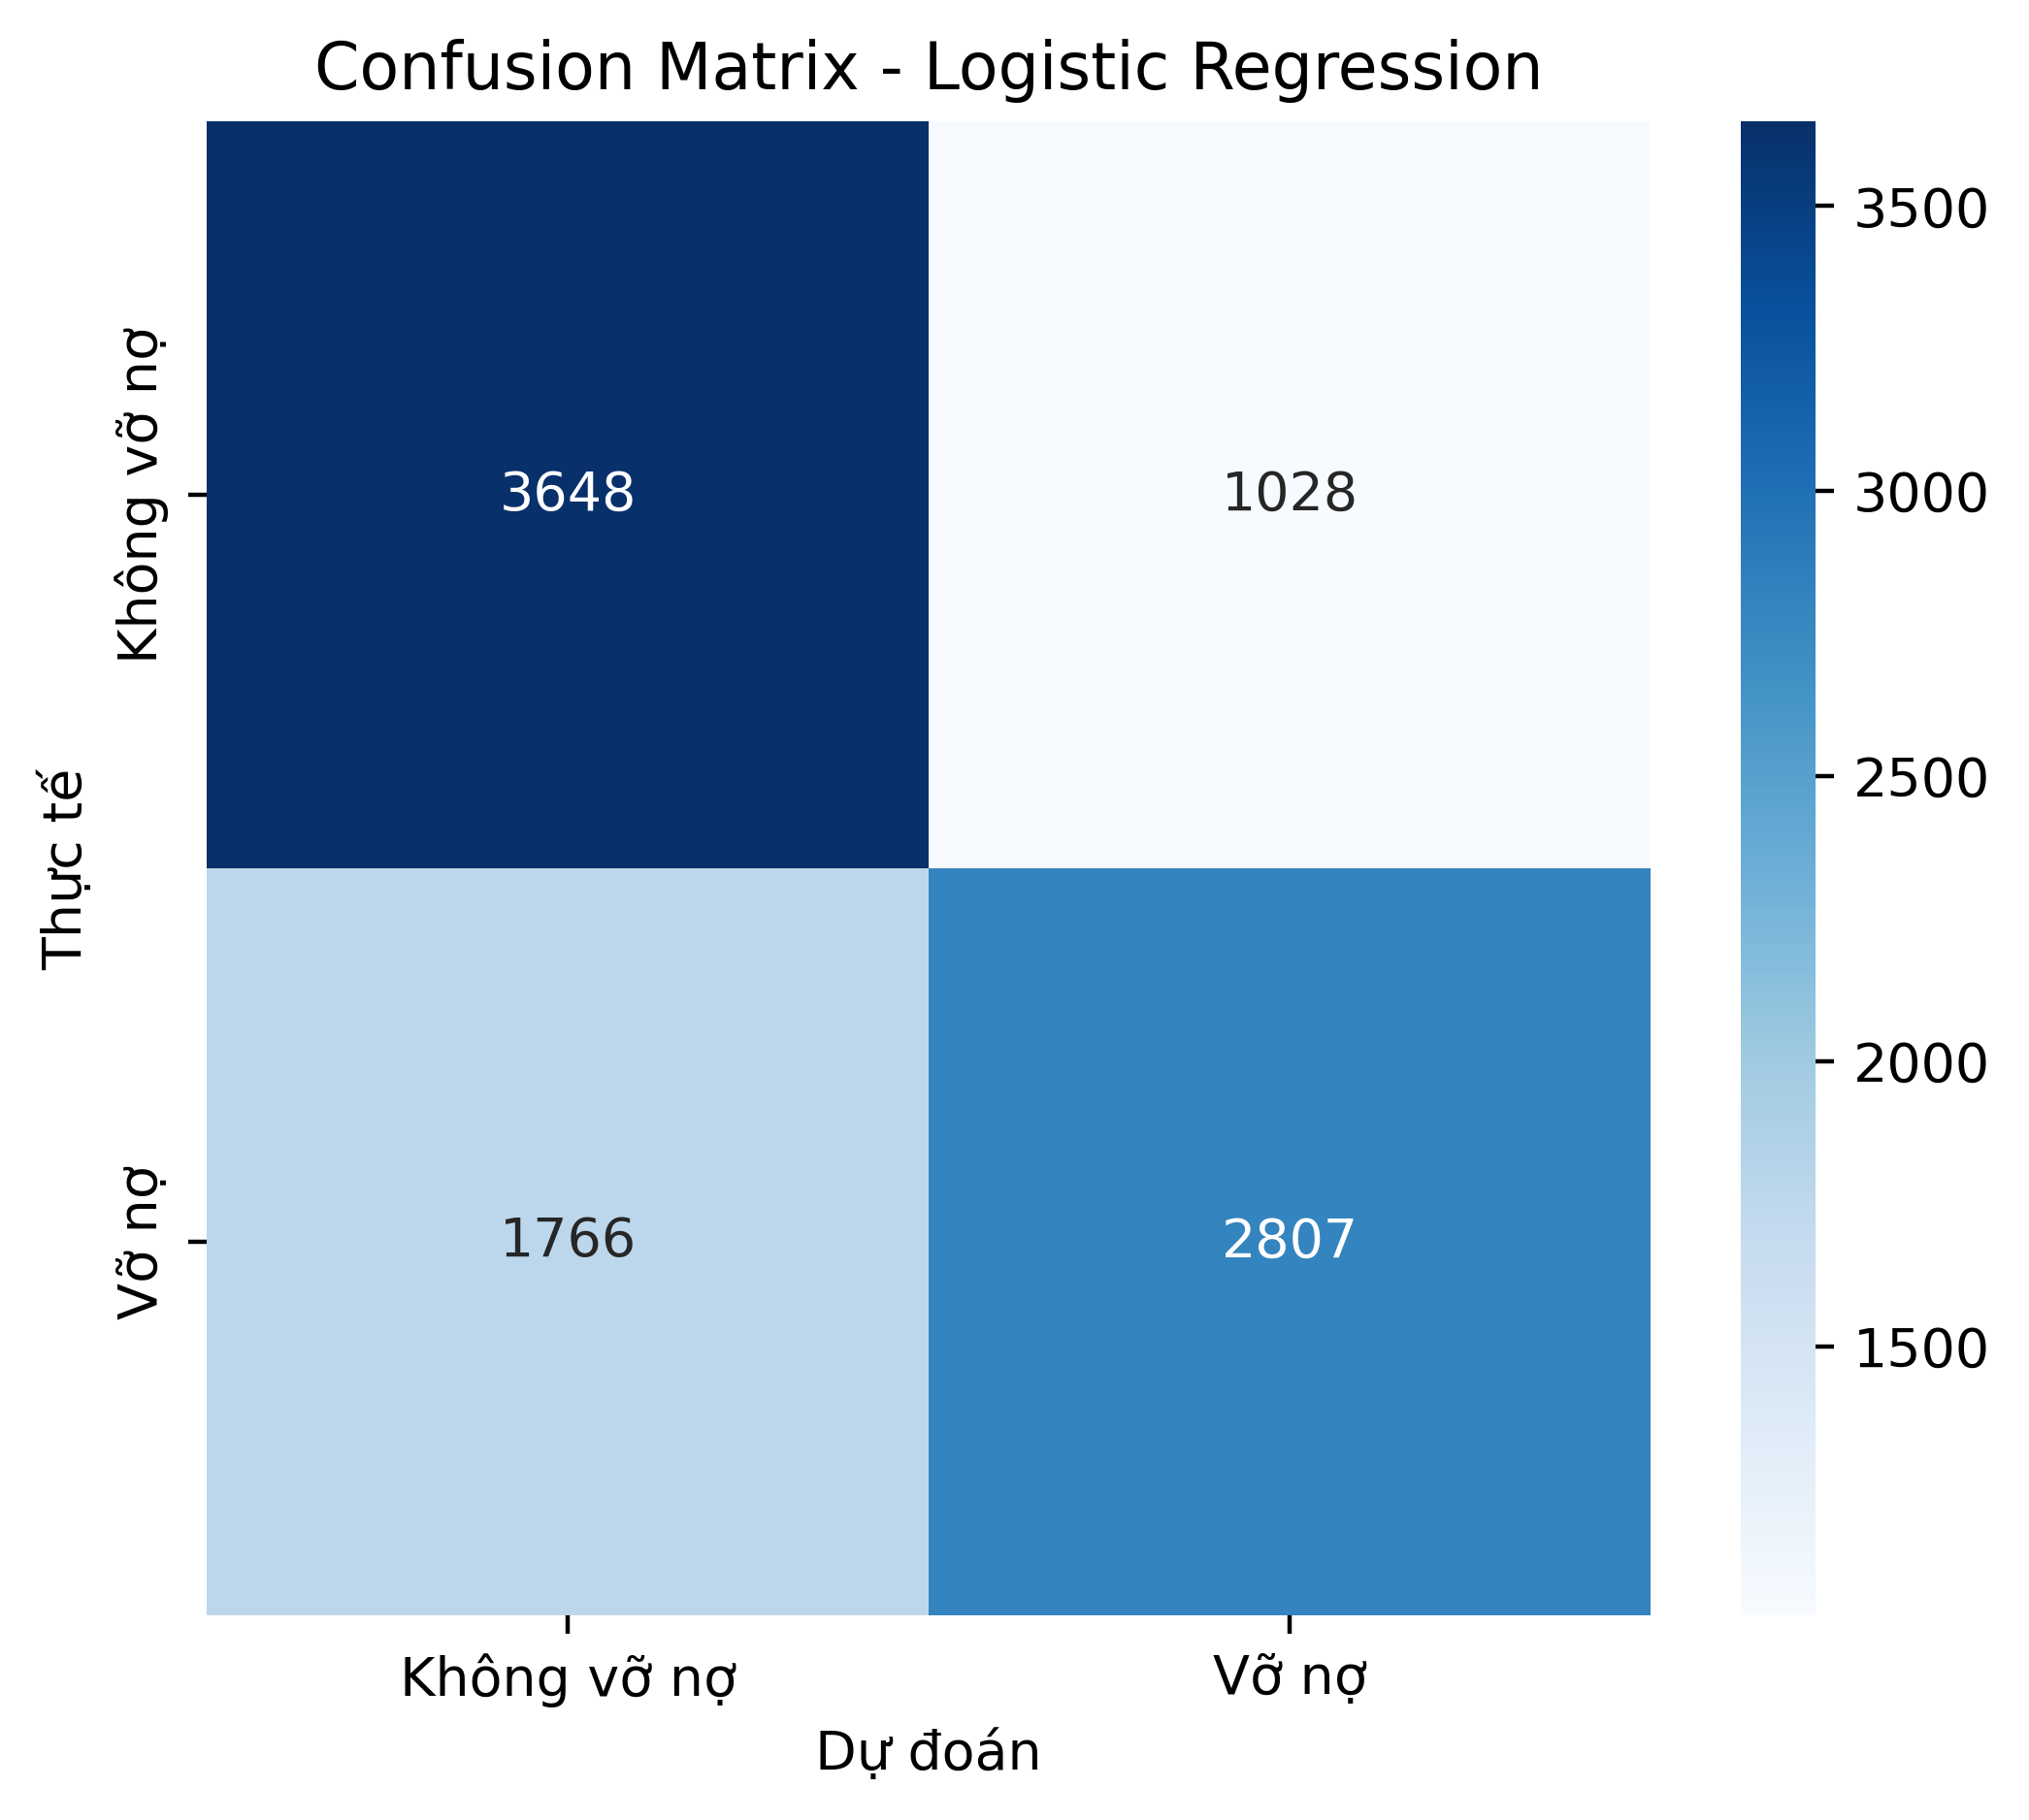

AUC Score: 0.7641


In [ ]:
# Logistic regression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)

# Huấn luyện mô hình
lr_model.fit(X_train, y_train)

# Đánh giá
lr_result = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
lr_result['model'] = lr_model
results.append(lr_result)

##**3. Random forest**


ĐÁNH GIÁ MÔ HÌNH: Random Forest
              precision    recall  f1-score   support

 Không vỡ nợ       0.72      0.85      0.78      4676
       Vỡ nợ       0.81      0.67      0.73      4573

    accuracy                           0.76      9249
   macro avg       0.77      0.76      0.76      9249
weighted avg       0.77      0.76      0.76      9249



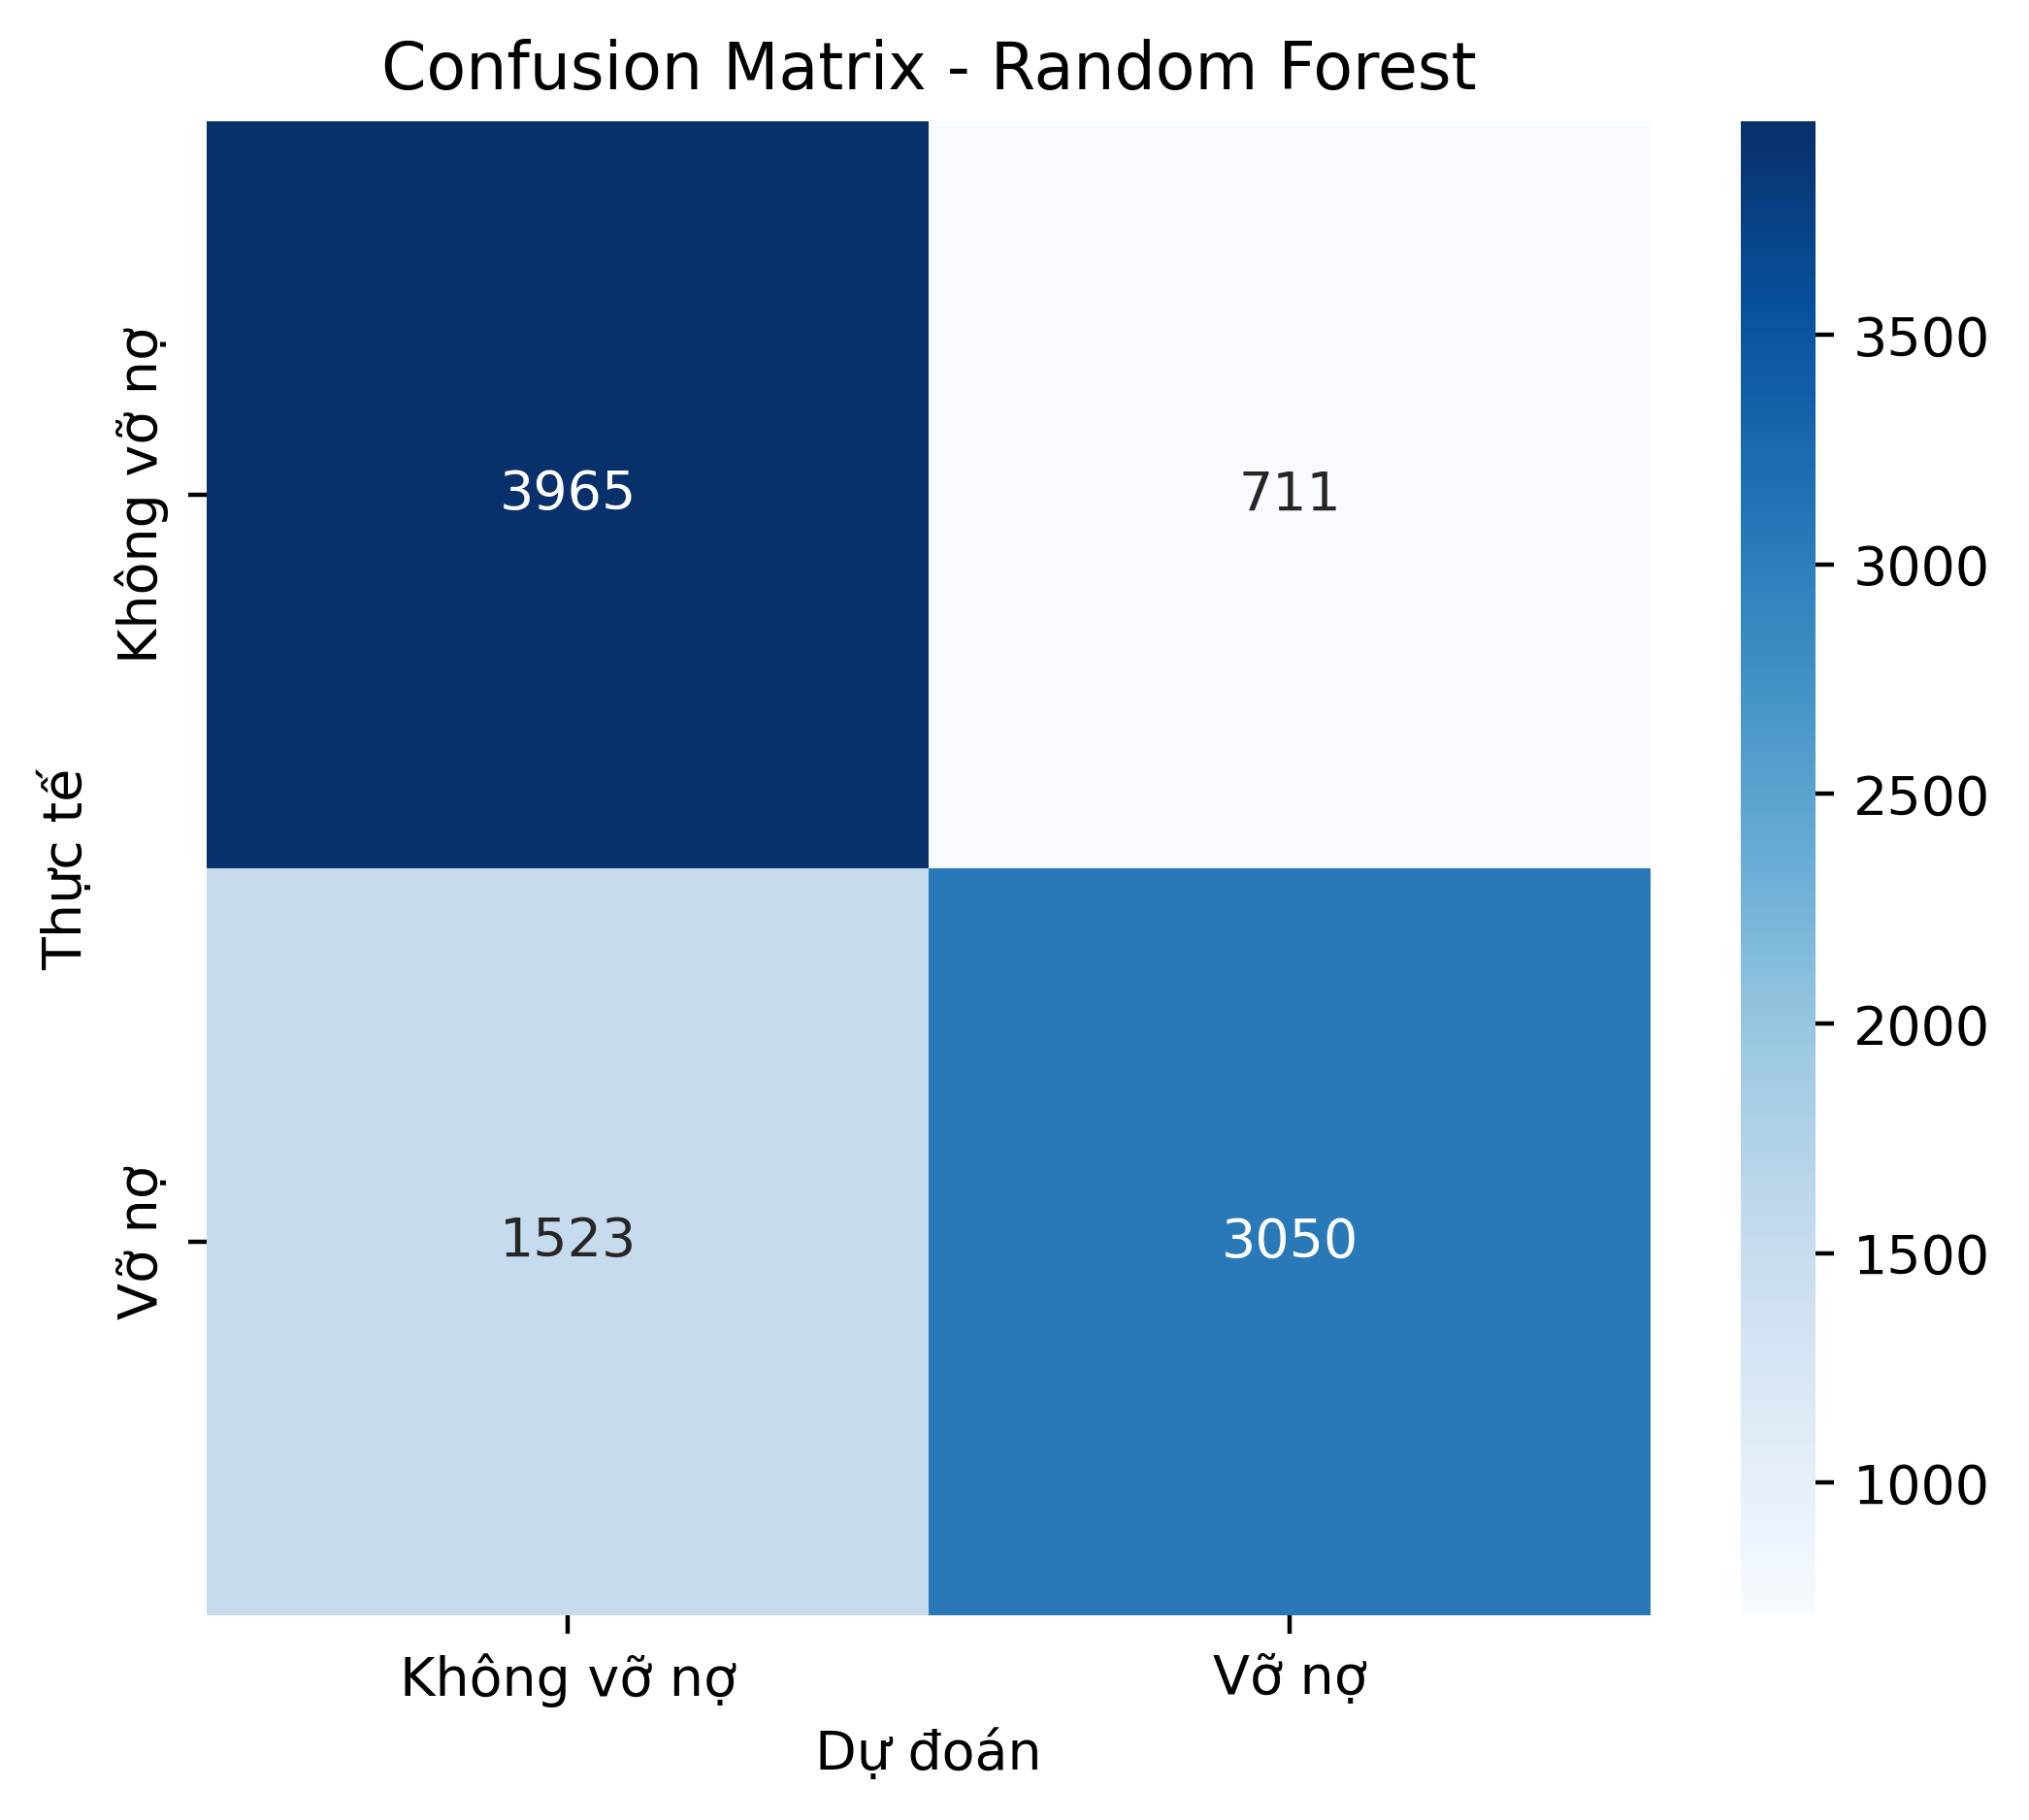

AUC Score: 0.8433


In [ ]:
# RandomForest
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    min_samples_split=10,
    n_jobs=-1
)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Đánh giá
rf_result = evaluate_model(rf_model, X_test, y_test, "Random Forest")
rf_result['model'] = rf_model
results.append(rf_result)

# **📊 5. Đánh giá mô hình**


## 🧪 Đánh giá mô hình

Trong phần này, tiến hành đánh giá và so sánh hiệu suất của ba mô hình học máy: **Logistic Regression**, **Random Forest**, và **XGBoost**. Mục tiêu là xác định mô hình nào hoạt động hiệu quả nhất trong việc dự đoán khả năng khách hàng vỡ nợ trong tháng tới.

Việc đánh giá dựa trên nhiều chỉ số khác nhau như **AUC-ROC, Precision, Recall, F1-Score, Accuracy**, cũng như thông qua các trực quan hóa như: **đường cong ROC, biểu đồ hiệu chuẩn, phân phối điểm số dự đoán**, và **ma trận nhầm lẫn**. Ngoài ra, bảng tổng hợp giúp so sánh định lượng hiệu suất giữa các mô hình.

Kết quả đánh giá sẽ hỗ trợ lựa chọn mô hình phù hợp nhất để triển khai hoặc tiếp tục tinh chỉnh trong giai đoạn tiếp theo.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.calibration import calibration_curve

def visualize_evaluation(results, X_test, y_test):
    # Lọc bỏ các phần tử không hợp lệ
    valid_results = [r for r in results if isinstance(r, dict) and 'metrics' in r and 'model_name' in r]

    if len(valid_results) == 0:
        print("Không có mô hình hợp lệ để hiển thị.")
        return

    # Tạo figure
    plt.figure(figsize=(18, 14))

    # 1. Biểu đồ so sánh các chỉ số
    plt.subplot(2, 2, 1)
    all_metrics = pd.concat([r['metrics'] for r in valid_results])
    sns.barplot(x='Chỉ số', y='Giá trị', hue='Mô hình', data=all_metrics)
    plt.title('So sánh các chỉ số đánh giá')
    plt.ylim(0.5, 1.0)
    plt.xticks(rotation=15)

    # 2. Đường cong ROC
    plt.subplot(2, 2, 2)
    for res in valid_results:
        plt.plot(res['fpr'], res['tpr'], label=f"{res['model_name']} (AUC = {res['auc']:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # 3. Biểu đồ phân phối điểm số
    plt.subplot(2, 2, 3)
    for res in valid_results:
        sns.kdeplot(res['y_pred_prob'], label=res['model_name'], fill=True)
    plt.xlabel('Xác suất dự đoán vỡ nợ')
    plt.ylabel('Mật độ')
    plt.title('Phân phối điểm số dự đoán')
    plt.legend()

    # 4. Biểu đồ hiệu chuẩn
    plt.subplot(2, 2, 4)
    for res in valid_results:
        prob_true, prob_pred = calibration_curve(y_test, res['y_pred_prob'], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=res['model_name'])
    plt.plot([0, 1], [0, 1], 'k:', label='Lý tưởng')
    plt.xlabel('Xác suất dự đoán trung bình')
    plt.ylabel('Tỷ lệ dương tính thực tế')
    plt.title('Biểu đồ hiệu chuẩn')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 5. Ma trận hỗn hợp so sánh
    plt.figure(figsize=(16, 5))
    for i, res in enumerate(valid_results):
        plt.subplot(1, len(valid_results), i + 1)
        cm = confusion_matrix(y_test, res['model'].predict(X_test))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Không vỡ nợ', 'Vỡ nợ'],
                    yticklabels=['Không vỡ nợ', 'Vỡ nợ'])
        plt.title(f'Confusion Matrix - {res["model_name"]}')
        plt.xlabel('Dự đoán')
        plt.ylabel('Thực tế')
    plt.tight_layout()
    plt.show()

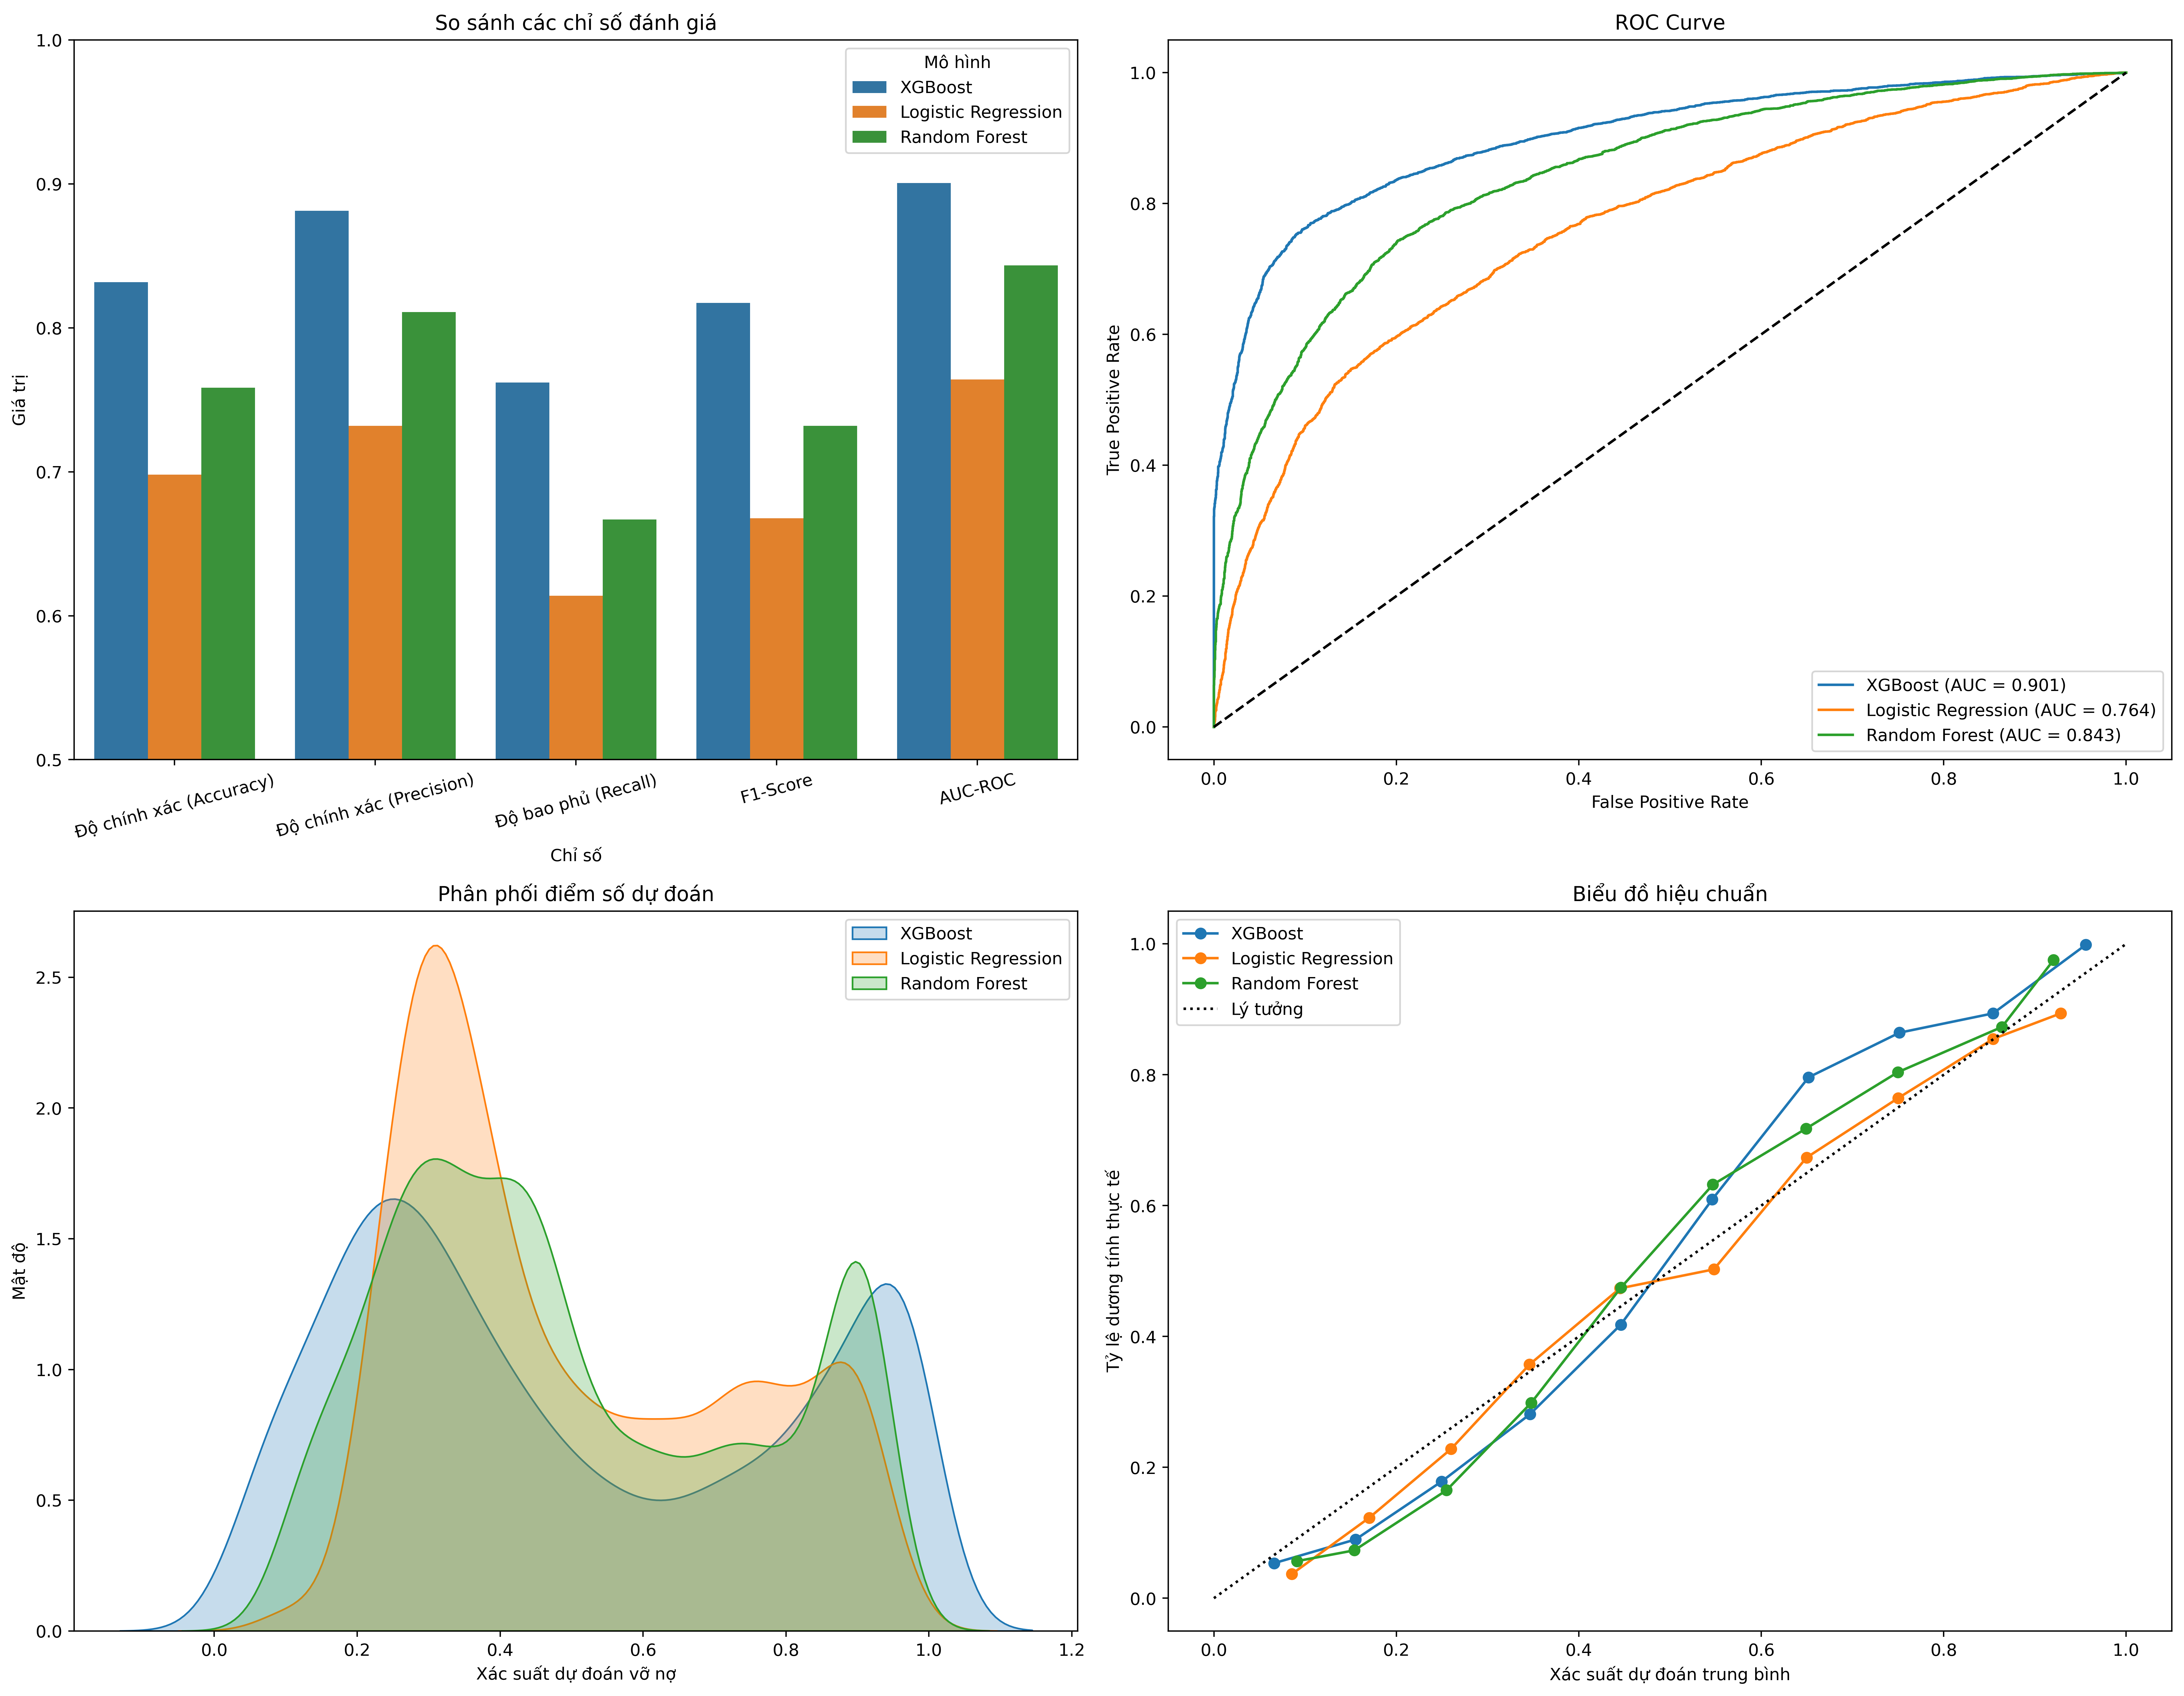

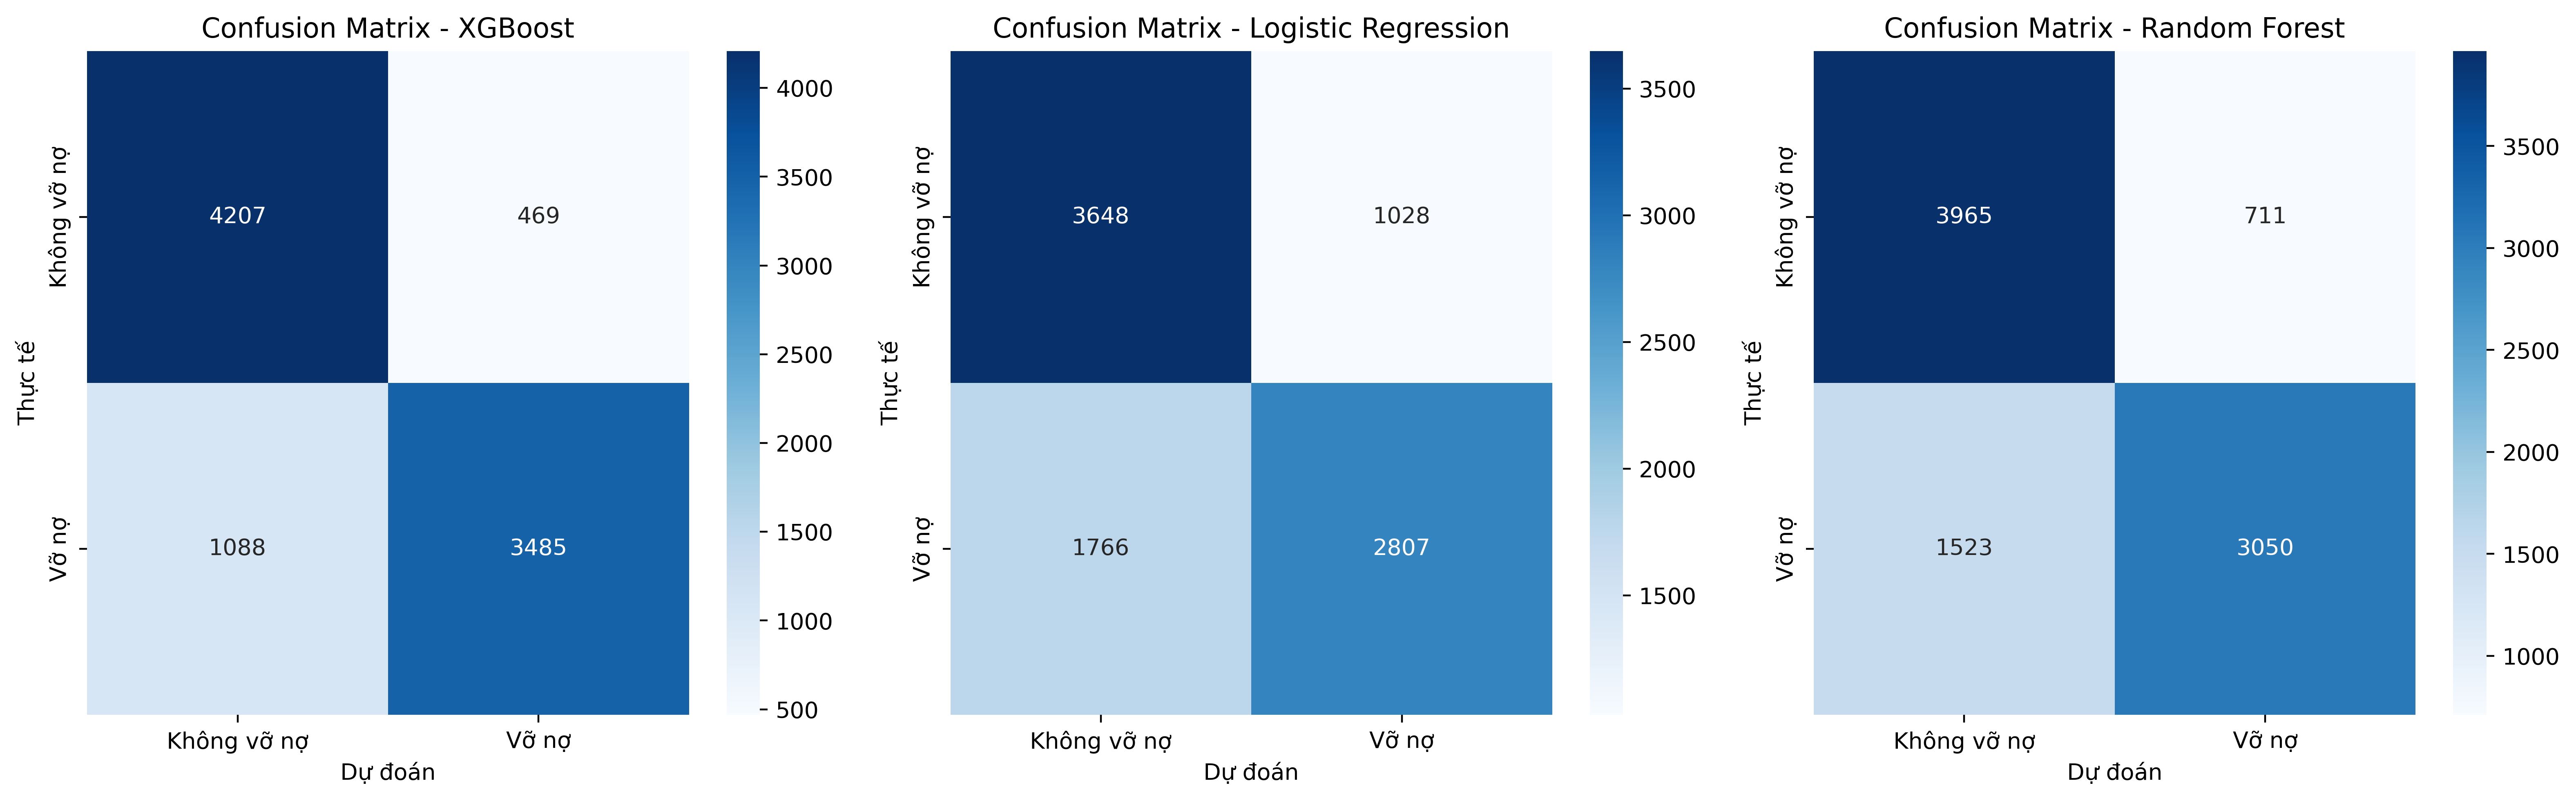


Bảng so sánh chi tiết các mô hình:
Mô hình                   Logistic Regression  Random Forest  XGBoost
Chỉ số                                                               
AUC-ROC                                0.7641         0.8433   0.9005
F1-Score                               0.6677         0.7319   0.8174
Độ bao phủ (Recall)                    0.6138         0.6670   0.7621
Độ chính xác (Accuracy)                0.6979         0.7585   0.8317
Độ chính xác (Precision)               0.7319         0.8110   0.8814


In [ ]:
# Đánh giá tất cả mô hình
# Trực quan hóa kết quả
visualize_evaluation(results, X_test, y_test)

# Hiển thị bảng so sánh chi tiết
comparison_table = pd.concat([r['metrics'] for r in results])
pivot_table = comparison_table.pivot(index='Chỉ số', columns='Mô hình', values='Giá trị')
print("\nBảng so sánh chi tiết các mô hình:")
print(pivot_table.round(4))

## 📝	 **Nhận xét tổng quan mô hình**

---

### 🔍 **1. Tổng quan hiệu suất**

- ✅ **XGBoost** thể hiện sự **vượt trội rõ rệt** trên tất cả các chỉ số đánh giá.
- 🟨 **Random Forest** đạt hiệu suất **tốt**, vượt Logistic Regression nhưng vẫn **thấp hơn XGBoost**.
- 🔻 **Logistic Regression** có kết quả **thấp nhất** trong ba mô hình, cho thấy khả năng phân loại còn hạn chế.

---

### 📈 **2. Phân tích từng chỉ số**

🔹 **AUC-ROC** (0.9005 vs 0.8433 vs 0.7641)  
- **XGBoost** đạt **AUC ~0.9** → khả năng phân biệt tốt giữa hai lớp.  
- **Random Forest**: 0.8433 → phân loại khá.  
- **Logistic Regression**: 0.7641 → chỉ ở mức chấp nhận được.

🔹 **Precision** (0.8814 vs 0.8110 vs 0.7319)  
- **XGBoost**: 88.14% → tỷ lệ cảnh báo sai thấp.  
- **Logistic Regression** thấp nhất → dễ gây ra nhiều cảnh báo sai.

🔹 **Recall (Độ bao phủ)** (0.7621 vs 0.6670 vs 0.6138)  
- **XGBoost** phát hiện được 76.21% các ca vỡ nợ thực tế.  
- **RF và Logistic Regression** bỏ sót >30% → rủi ro tiềm ẩn cao.

🔹 **F1-Score** (0.8174 vs 0.7319 vs 0.6677)  
- **XGBoost** cân bằng tốt giữa Precision và Recall.  
- **Logistic Regression** kém cân bằng.

🔹 **Accuracy (Độ chính xác tổng thể)** (0.8317 vs 0.7585 vs 0.6979)  
- **XGBoost**: 83.17% → cao hơn **7.3%** so với RF và **13.4%** so với Logistic.

---

### ⚖️ **3. Ưu điểm & Hạn chế**

| Mô hình             | ✅ Ưu điểm                                   | ⚠️ Hạn chế                              |
|---------------------|---------------------------------------------|----------------------------------------|
| **XGBoost**         | - Hiệu suất tổng thể cao                    | - Mô hình phức tạp, khó giải thích     |
|                     | - Precision & Recall đều cao                |                                        |
| **Random Forest**   | - Precision khá tốt (**81.10%**)            | - Recall chưa cao                      |
|                     | - Dễ giải thích hơn XGBoost                 | - Hiệu suất tổng thể thấp hơn XGBoost  |
| **Logistic Reg.**   | - Đơn giản, nhanh, dễ triển khai            | - Hiệu suất thấp, bỏ sót nhiều ca vỡ nợ|

---

### ⚠️ **Lưu ý quan trọng**

- 🔸 **Recall** của XGBoost vẫn bỏ sót khoảng **23.79%** ca vỡ nợ → nên xem xét kết hợp các biện pháp bổ sung như phân tích thủ công hoặc điều chỉnh **threshold**.
- 🔸 **Precision** 88.14% vẫn có khoảng **11.86% cảnh báo sai** → có thể tối ưu thêm bằng cách **tinh chỉnh ngưỡng phân loại** phù hợp với mục tiêu kinh doanh.

---

### ✅ **Kết luận**

> **XGBoost** là mô hình tối ưu nhất cho bài toán dự đoán vỡ nợ, với khả năng **phát hiện các ca vỡ nợ hiệu quả** (Recall cao) và đồng thời **giảm thiểu cảnh báo sai** (Precision cao).


In [ ]:
from xgboost import XGBClassifier, plot_importance
num_features = numerical_features

# Lấy tên cột one-hot đã encode
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)

# Gộp lại thành tên đầy đủ
feature_names = list(num_features) + list(cat_features)

# Gán lại tên cho booster (quan trọng để hiện đúng tên khi vẽ)
xgb_model.get_booster().feature_names = feature_names
# ========== In bảng độ quan trọng ==========
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 đặc trưng quan trọng nhất:")
print(importance_df.head(15))


Top 15 đặc trưng quan trọng nhất:
                   Feature  Importance
14                   SEX_2    0.180862
8   RECENCY_WEIGHTED_DELAY    0.177147
4                    PAY_1    0.079999
19              MARRIAGE_1    0.053085
9                      AGE    0.052619
7            LIMIT_BAL_LOG    0.042957
2               COUNT_LATE    0.039961
17             EDUCATION_3    0.039644
0          no_payment_flag    0.038191
16             EDUCATION_2    0.038070
18             EDUCATION_4    0.035484
6            TOTAL_PAYMENT    0.034258
3                MAX_DELAY    0.029151
5                    PAY_2    0.026795
13                   SEX_1    0.025777


#**6. Kết luận và mở rộng**

## **6.1 Kết luận**

### 📌 6.1.1. Mục tiêu ban đầu và yếu tố quyết định thành công

**🎯 Mục tiêu ban đầu:**  
Dự đoán liệu một khách hàng vay tín dụng có khả năng **vỡ nợ** hay không (biến mục tiêu: `default.payment.next.month`).

---

**✅ Yếu tố quyết định thành công:**

🔝 **Top đặc trưng quan trọng nhất** (theo mô hình XGBoost):

1. **SEX** – Giới tính (nam/nữ) có ảnh hưởng lớn nhất đến khả năng vỡ nợ  
2. **RECENCY_WEIGHTED_DELAY** – Trễ hạn gần đây có trọng số cao  
3. **PAY_1** – Trạng thái thanh toán của tháng gần nhất(Tháng 9)
4. **MARRIAGE** – Tình trạng hôn nhân   
5. **AGE** – Tuổi tác ảnh hưởng đến rủi ro tín dụng  
6. **LIMIT_BAL_LOG** – Hạn mức tín dụng (log scale)  
7. **COUNT_LATE** – Số lần trễ hạn  
8. **EDUCATION** – Trình độ học vấn  
9. **no_payment_flag** – Cờ không có thanh toán trong kỳ  
12. **TOTAL_PAYMENT** – Tổng số tiền thanh toán  
13. **MAX_DELAY** – Trễ hạn dài nhất trong lịch sử  
14. **PAY_2** – Tình trạng thanh toán tháng thứ 2 sau đó (Tháng 8)
---

⚖️ **Kỹ thuật xử lý mất cân bằng dữ liệu**:  
Việc áp dụng **SMOTE** giúp mô hình học tốt hơn ở lớp thiểu số (vỡ nợ), **tăng Recall và AUC** đáng kể so với khi không xử lý.



### 📊 6.1.2. Nhận xét và ý nghĩa của kết quả hiện tại

- **Mô hình XGBoost** là mô hình tốt nhất, với **độ chính xác (Accuracy)** đạt **83.17%**, **Recall** đạt **76.21%** và **Precision** đạt **88.14%**. Các chỉ số này **vượt trội rõ rệt** so với Logistic Regression và Random Forest trong cùng điều kiện đánh giá.

- Việc **Precision** cao (88.14%) cho thấy **đa số các cảnh báo vỡ nợ là chính xác**, giúp giảm thiểu **cảnh báo sai** – điều rất quan trọng trong hệ thống tín dụng.

- **Recall** cao (76.21%) chứng tỏ mô hình **phát hiện tốt** các trường hợp vỡ nợ thực tế, hạn chế bỏ sót khách hàng rủi ro.

- Kết quả này phản ánh khả năng của **XGBoost trong việc học được các quan hệ phi tuyến, tương tác phức tạp giữa các biến**, đặc biệt hiệu quả trong các bài toán tài chính có dữ liệu không tuyến tính và mất cân bằng.

- **Sự cân bằng giữa Precision và Recall** cũng giúp tổ chức tín dụng **tối ưu hóa chi phí xử lý**, vừa giảm cảnh báo giả, vừa nâng cao độ bao phủ rủi ro – một yếu tố then chốt trong quản lý tín dụng.



### ⚠️ 6.1.3. Hạn chế

- **Mặc dù mô hình XGBoost đạt hiệu suất cao**, vẫn còn **~23.79%** các trường hợp vỡ nợ bị bỏ sót (tương ứng với **Recall = 76.21%**). Điều này có thể dẫn đến **rủi ro tài chính**, cho thấy mô hình **chưa thể thay thế hoàn toàn quy trình thẩm định truyền thống** hoặc các biện pháp kiểm soát rủi ro bổ sung.

- **XGBoost là mô hình phức tạp và khó giải thích**, điều này có thể gây **khó khăn khi thuyết phục các bên liên quan**, đặc biệt là các bộ phận nghiệp vụ, pháp lý hoặc quản lý không chuyên về kỹ thuật.

- **Chưa thực hiện kiểm định độ ổn định (cross-validation hoặc kiểm thử trên nhiều tập dữ liệu)** → Kết quả hiện tại **có thể chưa đảm bảo tính tổng quát**, đặc biệt nếu triển khai thực tế với dữ liệu mới hoặc môi trường thay đổi.



 ### 🧮 6.1.4. Ý nghĩa đối với chiến lược kinh doanh

- Kết quả mô hình cung cấp cơ sở dữ liệu vững chắc để xây dựng hệ thống cảnh báo tự động, giúp ngân hàng hoặc tổ chức tài chính đưa ra quyết định tín dụng nhanh chóng và chính xác hơn.

- Việc biết trước các đặc trưng quan trọng cũng giúp tối ưu quy trình thu thập dữ liệu, tập trung nâng cao chất lượng và độ tin cậy của các thông tin đầu vào.

## **6.2 Mở rộng**


### A. Cải thiện dữ liệu
- Thu thập thêm dữ liệu đa dạng hơn, tập trung vào:
    + Thêm dữ liệu về vỡ nợ để giảm mất cân bằng.
    + Hành vi thanh toán chi tiết hơn
    + Lịch sử tín dụng và các giao dịch tài chính
    + Thông tin cá nhân bổ sung như nghề nghiệp, thu nhập, v.v.
- Mục tiêu: Tăng tính dự đoán và khả năng phân biệt của mô hình.


### B. Thử nghiệm và so sánh mô hình
- Thử nghiệm các mô hình nâng cao phù hợp với dữ liệu mất cân bằng
- Khai thác các mô hình deep learning nếu có dữ liệu lớn và phức tạp (đã cải thiện dữ liệu)






### C. Tối ưu tham số mô hình
- Áp dụng các kỹ thuật tuning hiện đại như Bayesian Optimization, Random Search.
- Mục tiêu tìm cấu hình tham số tối ưu, nâng cao hiệu suất mô hình.




### D. Điều chỉnh ngưỡng phân loại
- Cân nhắc điều chỉnh threshold để đạt được sự cân bằng giữa Recall và Precision.
- Tùy chỉnh theo mục tiêu kinh doanh, ưu tiên nhóm nào hơn.



### E. Kỹ thuật kết hợp mô hình (Ensemble)
- Áp dụng ensemble hoặc stacking để kết hợp ưu điểm của nhiều mô hình.
- Nâng cao khả năng dự đoán tổng thể và ổn định hơn.



### F. Đánh giá mô hình nâng cao
- Kiểm thử mô hình trên tập dữ liệu mới (out-of-time validation).
- Đánh giá khả năng tổng quát hóa và độ ổn định của mô hình khi áp dụng thực tế.



### G. Ứng dụng mô hình vào quy trình nghiệp vụ
- Xây dựng hệ thống cảnh báo tự động dựa trên mô hình.
- Kết hợp với các bước xử lý rủi ro trong doanh nghiệp để giảm thiểu tỷ lệ vỡ nợ thực tế.